# <center><b> MGP2: Site Energy Usage Intensity Project <b></center>

---
<a name = Section0></a>
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Information**](#Section41)
  - **4.2** [**Data Description**](#Section42)
  - **4.3** [**Exploratory Data Analysis on pre-processed data**](#Section43)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Data Pre-profiling**](#Section51)<br>
  - **5.2** [**Handling of Missing Data**](#Section52)<br>
  - **5.3** [**Handling of Redundant Data**](#Section53)<br>
  - **5.4** [**Handling of Inconsisten Data**](#Section54)<br>
  - **5.5** [**Handling of Outliers**](#Section55)<br>
  
**6.** [**Exploratory Data Analysis**](#Section6)<br>
  
**7.** [**Data Post-Processing**](#Section7)<br>
  - **7.1** [**Data Encoding**](#Section71)<br> 
  - **7.2** [**Data Preparation**](#Section72)<br>
  - **7.3** [**Data Scaling**](#Section73)<br>

**8.** [**Model Development & Evaluation using Machine Learning**](#Section8)<br>
  - **8.1** [**Baseline Model Evaluation**](#Section81)<br> 
  

**9.** [**Model Evaluation using Hyperparameter Tuning**](#Section9)<br>

**10.** [**Explainable AI**](#Section10)<br>
  - **10.1** [**Importing Libraries for  Explainable AI**](#Section101)
 

---
<a name = Section1></a>
# **1. Introduction**
---


🧾**Description:** According to a report issued by the International Energy Agency (IEA), the lifecycle of buildings from construction to demolition were responsible for 37% of global energy-related and process-related CO2 emissions in 2020. Yet it is possible to drastically reduce the energy consumption of buildings by a combination of easy-to-implement fixes and state-of-the-art strategies. 

The dataset consists of building characteristics, weather data for the location of the building, as well as the energy usage for the building and the given year, measured as Site Energy Usage Intensity (Site EUI). Each row in the data corresponds to a single building observed in a given year.


---
<a name = Section1></a>
# **2. Problem Statement**
---


Problem Statement: You are provided with two datasets: 
- (1) the train_dataset where the observed values of the Site EUI for each row are provided and
- (2) the x_test dataset the observed values of the Site EUI for each row are removed and provided separately in y_test.

Your task is to predict the Site EUI for each row (using the complete training dataset), given the characteristics of the building and the weather data for the location of the building.

- Use the test sets for validation and testing. 

- The target variable is site_eui and the evaluation metric is RMSE score.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**                                                   
---

In [2]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport     
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
from collections import Counter  
import seaborn as sns
import warnings                                                     
warnings.filterwarnings("ignore")
import datetime
plt.show();
from platform import python_version
import sklearn
from sklearn import metrics
from tqdm import tqdm
import gc
from sklearn.metrics import roc_curve, auc
import urllib
from urllib.request import urlopen
import urllib.request as ur

In [3]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV ,train_test_split            
from sklearn.metrics import classification_report, plot_confusion_matrix                   
import pydotplus                                                    
from IPython.display import Image                                   
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel                      
from yellowbrick.model_selection import FeatureImportances  
from imblearn.over_sampling import SMOTE
from feature_engine.selection import SelectBySingleFeaturePerformance
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from catboost import CatBoostRegressor
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import optuna
import shap
import time
from sklearn import metrics

In [4]:
pd.set_option('display.max_columns', 70)
plt.rcParams['axes.spines.top']=False
plt.rcParams['axes.spines.right']=False
style.use('ggplot')
sns.set_palette('Set2')

<a name = Section31></a>
### **3.2 Version Check**

In [5]:
# Printing versions of Python and other packages  to ensure correct version is used for this project
print("python version", python_version())
print ("pandas version", pd.__version__)
print ("numpy version", np.__version__)
print ("seaborn version", sns.__version__)
print ("sklearn version", sklearn.__version__)
print ("Shap version", shap.__version__)

python version 3.8.8
pandas version 1.2.2
numpy version 1.20.1
seaborn version 0.11.1
sklearn version 1.0.2
Shap version 0.36.0


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


|Dataset| Records | Features | Dataset Size |
| :--: | :--: | :--: | :--: |
|**Site Energy Usage Intensity (Site EUI) data**| 75757 | 63 | 37 MB |

<br>


|Sr| Column name | Description ||Sr| Column name | Description |
|:--|:--|:--||:--|:--|:--|
|1|**id**| building id ||17|**Year_Factor**|anonymized year in which the weather and energy usage factors were observed|
|2|**State_Factor**| anonymized state in which the building is located||18|**building_class**| building classification|
|3|**facility_type**| building usage type||19|**floor_area**| floor area (in square feet) of the building|
|4|year_built| year in which the building was constructed||20|**energy_star_rating**| the energy star rating of the building
|5|**ELEVATION**| elevation of the building location||21|**january_min_temp**| minimum temperature in January (in Fahrenheit) at the location of the building|
|6|**january_avg_temp**|average temperature in January (in Fahrenheit) at the location of the building||22|**january_max_temp**| maximum temperature in January (in Fahrenheit) at the location of the building|
|7|**cooling_degree_days**|cooling degree day for a given day is the number of degrees where the daily average temperature exceeds 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.||23|**heating_degree_days**| heating degree day for a given day is the number of degrees where the daily average temperature falls under 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.|
|8|**precipitation_inches**| annual precipitation in inches at the location of the building||24|**snowfall_inches**| annual snowfall in inches at the location of the building|
|9|**snowdepth_inches**| annual snow depth in inches at the location of the building||25|**avg_temp**| average temperature over a year at the location of the building|
|10|**ays_below_30F**| total number of days below 30 degrees Fahrenheit at the location of the building||26|**ays_below_20F**| total number of days below 20 degrees Fahrenheit at the location of the building.|
|11|**days_below_10F**| total number of days below 10 degrees Fahrenheit at the location of the building||27|**days_below_0F**| total number of days below 0 degrees Fahrenheit at the location of the building|
|12|**days_above_80F**| total number of days above 80 degrees Fahrenheit at the location of the building||28|**days_above_90**| total number of days above 90 degrees Fahrenheit at the location of the building|
|13|**days_above_100F**| total number of days above 100 degrees Fahrenheit at the location of the building||29|**days_above_110F**| total number of days above 110 degrees Fahrenheit at the location of the building.|
|14|**direction_max_wind_speed**| wind direction for maximum wind speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.)||30|**direction_peak_wind_speed**|wind direction for peak wind gust speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).|
|15|**max_wind_speed**| maximum wind speed at the location of the building||31|**days_with_fog**| number of days with fog at the location of the building|
|16|**Target variable : site_eui**| Site Energy Usage Intensity is the amount of heat and electricity consumed by a building as reflected in utility bills|

In [6]:
# loading the data set
df = pd.read_csv("../dataset/train_dataset.csv")
df = df.replace([' ', '?', "", '-','|','#','@','!'], value=np.nan)
df.head()

Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   
2            1      State_1     Commercial   
3            1      State_1     Commercial   
4            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
0                11.0        2.4                36              50.5   
1                45.0        1.8                36              50.5   
2                97.0        1.8                36              50.5   
3                46.0        1.8                36              50.5   
4               100.0        2.4                36              50.5   

   january_max_temp  february_min_temp  february_avg_temp  february_max_temp  \
0                68                 35          50.589286                 73   
1                68                 35          50.589286                 73   
2                68                 35          50.589286                 73   
3                68                 35          50.589286                 73   
4                68                 35          50.589286                 73   

   march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
0              40       53.693548              80              41   
1              40       53.693548              80              41   
2              40       53.693548              80              41   
3              40       53.693548              80              41   
4              40       53.693548              80              41   

   april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  may_max_temp  \
0            55.5              78            46     56.854839            84   
1            55.5              78            46     56.854839            84   
2            55.5              78            46     56.854839            84   
3            55.5              78            46     56.854839            84   
4            55.5              78            46     56.854839            84   

   june_min_temp  june_avg_temp  june_max_temp  july_min_temp  july_avg_temp  \
0             50           60.5             90             52      62.725806   
1             50           60.5             90             52      62.725806   
2             50           60.5             90             52      62.725806   
3             50           60.5             90             52      62.725806   
4             50           60.5             90             52      62.725806   

   july_max_temp  august_min_temp  august_avg_temp  august_max_temp  \
0             84               52         62.16129               85   
1             84               52         62.16129               85   
2             84               52         62.16129               85   
3             84               52         62.16129               85   
4             84               52         62.16129               85   

   september_min_temp  september_avg_temp  september_max_temp  \
0                  52               64.65                  90   
1                  52               64.65                  90   
2                  52               64.65                  90   
3                  52               64.65                  90   
4                  52               64.65                  90   

   october_min_temp  october_avg_temp  october_max_temp  november_min_temp  \
0                47         63.016129                83                 43   
1                47         63.016

In [7]:
# loading the test data set
dftest = pd.read_csv("../dataset/x_test.csv")
dftest = dftest.replace([' ', '?', "", '-','|','#','@','!'], value=np.nan)
print(dftest.shape)
dftest.head()

(9705, 63)


Year_Factor State_Factor building_class                 facility_type  \
0            7      State_1     Commercial  Grocery_store_or_food_market   
1            7      State_1     Commercial  Grocery_store_or_food_market   
2            7      State_1     Commercial  Grocery_store_or_food_market   
3            7      State_1     Commercial  Grocery_store_or_food_market   
4            7      State_1     Commercial  Grocery_store_or_food_market   

   floor_area  year_built  energy_star_rating  ELEVATION  january_min_temp  \
0     28484.0      1994.0                37.0        2.4                38   
1     21906.0      1961.0                55.0       45.7                38   
2     16138.0      1950.0                 1.0       59.1                38   
3     97422.0      1971.0                34.0       35.4                38   
4     61242.0      1942.0                35.0        1.8                38   

   january_avg_temp  january_max_temp  february_min_temp  february_avg_temp  \
0         50.596774                64                 40          54.482143   
1         50.596774                64                 40          54.482143   
2         50.596774                64                 40          54.482143   
3         50.596774                64                 40          54.482143   
4         50.596774                64                 40          54.482143   

   february_max_temp  march_min_temp  march_avg_temp  march_max_temp  \
0                 66              42       56.935484              77   
1                 66              42       56.935484              77   
2                 66              42       56.935484              77   
3                 66              42       56.935484              77   
4                 66              42       56.935484              77   

   april_min_temp  april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  \
0              45           58.45              78            49     60.903226   
1              45           58.45              78            49     60.903226   
2              45           58.45              78            49     60.903226   
3              45           58.45              78            49     60.903226   
4              45           58.45              78            49     60.903226   

   may_max_temp  june_min_temp  june_avg_temp  june_max_temp  july_min_temp  \
0            87             51          63.15             97             53   
1            87             51          63.15             97             53   
2            87             51          63.15             97             53   
3            87             51          63.15             97             53   
4            87             51          63.15             97             53   

   july_avg_temp  july_max_temp  august_min_temp  august_avg_temp  \
0      64.258065             85               53        65.854839   
1      64.258065             85               53        65.854839   
2      64.258065             85               53        65.854839   
3      64.258065             85               53        65.854839   
4      64.258065             85               53        65.854839   

   august_max_temp  september_min_temp  september_avg_temp  \
0               88                  54           69.766667   
1               88                  54           69.766667   
2               88                  54           69.766667   
3               88                  54           69.766667   
4               88                  54           69.766667   

   september_max_temp  october_min_temp  october_avg_temp  october_max_temp  \
0                 104                48         64.193548                91   
1                 104                48         64.193548                91   
2                 104                48         64.193548                91   
3                 104                48         64.193548                91   
4                 104   

In [8]:
ynewtest = pd.read_csv("../dataset/y_test.csv")
print(ynewtest.shape)
ynewtest.head()

(9705, 2)


id    site_eui
0  75757  166.588554
1  75758  259.381565
2  75759  158.537090
3  75760  261.441520
4  75761  242.967711

In [9]:
df['facility_type'].value_counts()

Multifamily_Uncategorized                    39455
Office_Uncategorized                         12512
Education_Other_classroom                     3860
Lodging_Hotel                                 2098
2to4_Unit_Building                            1893
Commercial_Other                              1744
5plus_Unit_Building                           1273
Warehouse_Nonrefrigerated                     1255
Retail_Uncategorized                          1130
Education_College_or_university               1056
Nursing_Home                                   772
Education_Uncategorized                        709
Mixed_Use_Commercial_and_Residential           672
Lodging_Dormitory_or_fraternity_sorority       669
Warehouse_Distribution_or_Shipping_center      604
Warehouse_Selfstorage                          577
Grocery_store_or_food_market                   448
Office_Medical_non_diagnostic                  447
Health_Care_Inpatient                          409
Religious_worship              

<a name = Section41></a>
### **4.1 Data Information**

- In this section we will see the **information about the types of features**.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [11]:
df.shape

(75757, 64)

In [12]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                9705 non-null   int64  
 1   State_Factor               9705 non-null   object 
 2   building_class             9705 non-null   object 
 3   facility_type              9705 non-null   object 
 4   floor_area                 9705 non-null   float64
 5   year_built                 9613 non-null   float64
 6   energy_star_rating         7451 non-null   float64
 7   ELEVATION                  9705 non-null   float64
 8   january_min_temp           9705 non-null   int64  
 9   january_avg_temp           9705 non-null   float64
 10  january_max_temp           9705 non-null   int64  
 11  february_min_temp          9705 non-null   int64  
 12  february_avg_temp          9705 non-null   float64
 13  february_max_temp          9705 non-null   int64

**Observations:**

- Total **60** numerical columns and **3** categorical columns

<a name = Section42></a>
### 4.2 Data Description 

- In this section we will get **information about the data** and see some observations.          

In [13]:
df.describe().style.highlight_null(null_color = 'lime')

In [14]:
df.describe(include="object")

State_Factor building_class              facility_type
count         75757          75757                      75757
unique            7              2                         60
top         State_6    Residential  Multifamily_Uncategorized
freq          50840          43558                      39455

**Observations:**

- Total count/ records are  **75757** in the data.

<a name = Section43></a>
### 4.3 Exploratory Data Analysis on pre-processed data .

- In this section we will study **the patterns about the data** and list some of our observations.          

0it [25:44, ?it/s]


<AxesSubplot:xlabel='site_eui'>

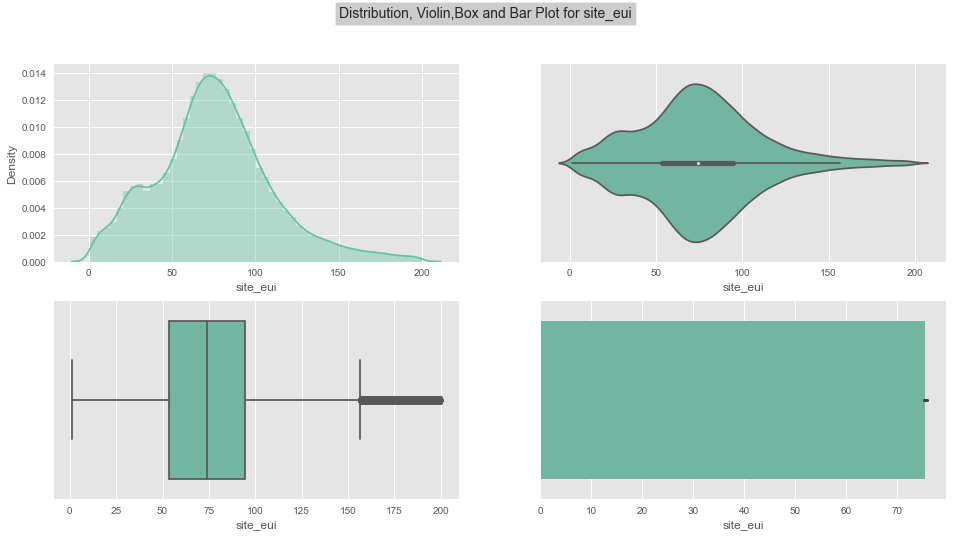

In [240]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
plt.suptitle("Distribution, Violin,Box and Bar Plot for site_eui", bbox={'facecolor':'0.8'},fontsize = 14)
sns.distplot(df["site_eui"], ax=axes[0,0])
sns.violinplot(x="site_eui", data=df, ax=axes[0,1])
sns.boxplot(x="site_eui", data=df, ax=axes[1,0])
sns.barplot(x="site_eui", data=df, ax=axes[1,1])

Text(0.5, 0.98, 'scatter  plots for the year factor vs site energy used')

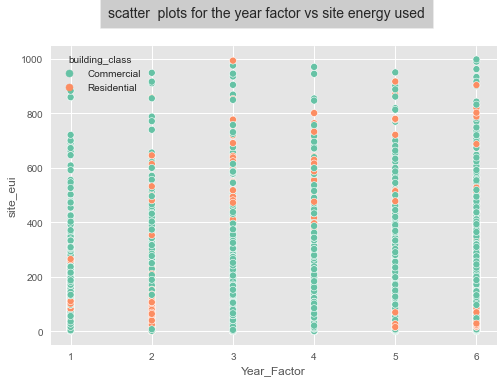

In [15]:
sns.scatterplot(data = df, x = 'Year_Factor', y = 'site_eui', hue = 'building_class')
plt.suptitle('scatter  plots for the year factor vs site energy used',bbox={'facecolor': '0.8', 'pad': 8}, fontsize=14)

**Observations:**


- Looks as if there is no pattern between these two variables

Text(0.5, 0.98, 'Scatter  plots for the year built vs site energy used')

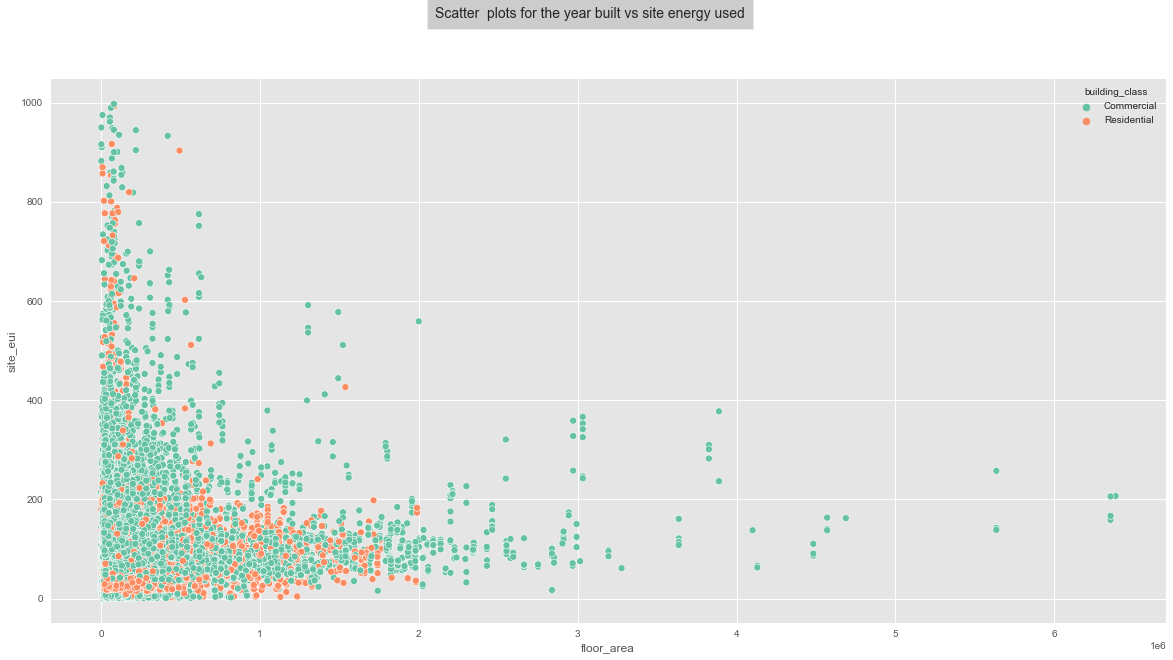

In [16]:
fig = plt.figure(figsize=(20,10))
sns.scatterplot(data = df, x = 'floor_area', y = 'site_eui', hue = 'building_class')
plt.suptitle('Scatter  plots for the year built vs site energy used',bbox={'facecolor': '0.8', 'pad': 8}, fontsize=14)

**Observations:**


- It seems that at the lower floor area you have the max energy utilization.

Text(0.5, 0.98, 'Hist plot for the site energy used - target variable')

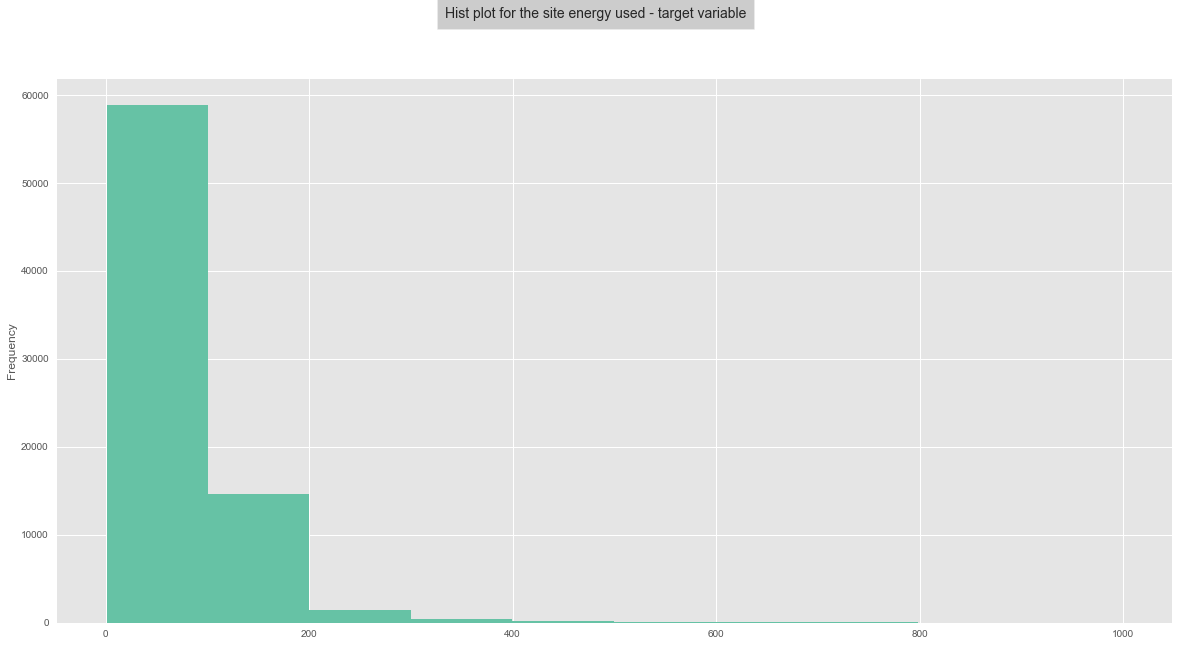

In [17]:
fig = plt.figure(figsize=(20,10))
df.site_eui.plot(kind='hist')
plt.suptitle('Hist plot for the site energy used - target variable',bbox={'facecolor': '0.8', 'pad': 8}, fontsize=14)

<AxesSubplot:xlabel='site_eui'>

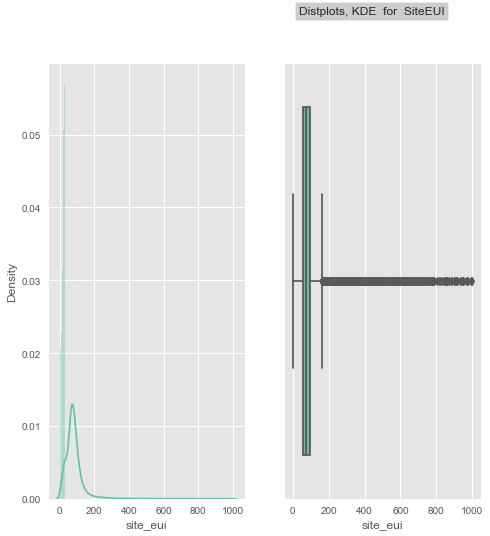

In [18]:
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.suptitle("Distplots, KDE  for  SiteEUI", bbox={'facecolor':'0.8'})
sns.distplot(df['site_eui'], kde=True, bins=range(0, 31, 2))
plt.subplot(1,3,2)
sns.boxplot(df['site_eui'])

**Observations:**

- To find out the distribution of the site eui vs elevation lets plot it and observe the pattern, there are a lot of outliers.


<AxesSubplot:xlabel='site_eui'>

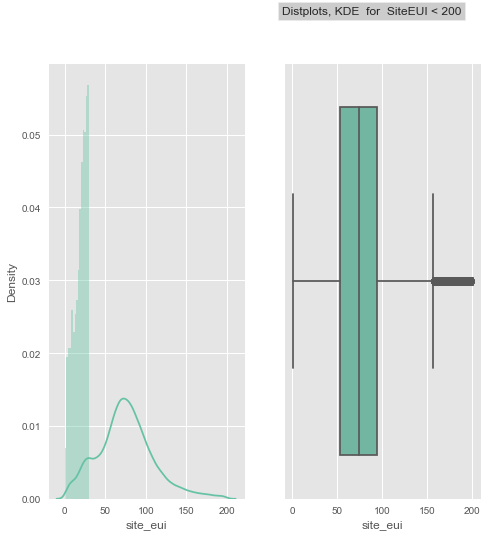

In [19]:
df=df[df['site_eui'] < 200]
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.suptitle("Distplots, KDE  for  SiteEUI < 200", bbox={'facecolor':'0.8'})
sns.distplot(df['site_eui'], kde=True, bins=range(0, 31, 2))
plt.subplot(1,3,2)
sns.boxplot(df['site_eui'])

**Observations:**

- When we plot for siteeui < 200 we can observe a much more better normal distribution of KDE as above.


**Question : What is the distribution of facility type data ?**

Text(0.5, 0.98, 'Bar plots for the facility type ')

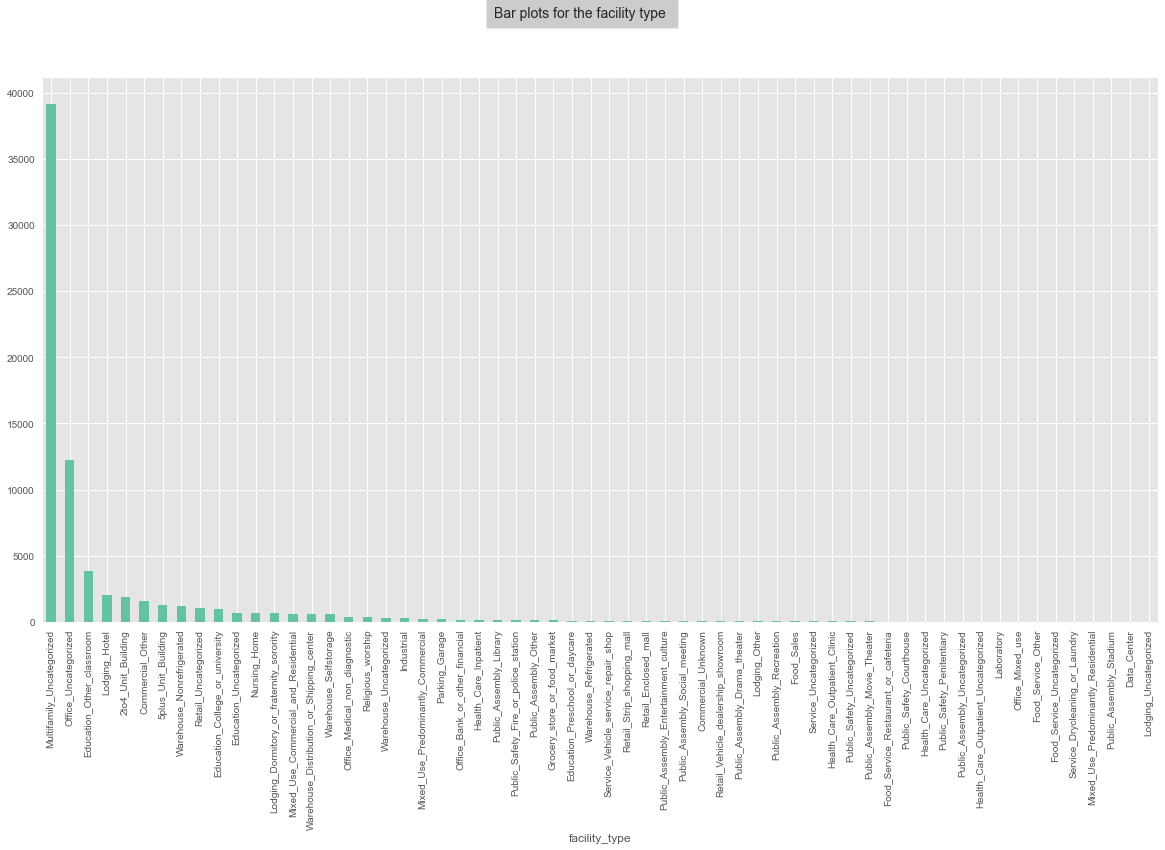

In [23]:
fig = plt.figure(figsize=(20,10))
df.groupby(['facility_type'])['facility_type'].count().sort_values(ascending=False).plot(kind='bar')
plt.suptitle('Bar plots for the facility type ',bbox={'facecolor': '0.8', 'pad': 8}, fontsize=14)

Text(0.5, 0.98, 'KDE plot for the site energy used index')

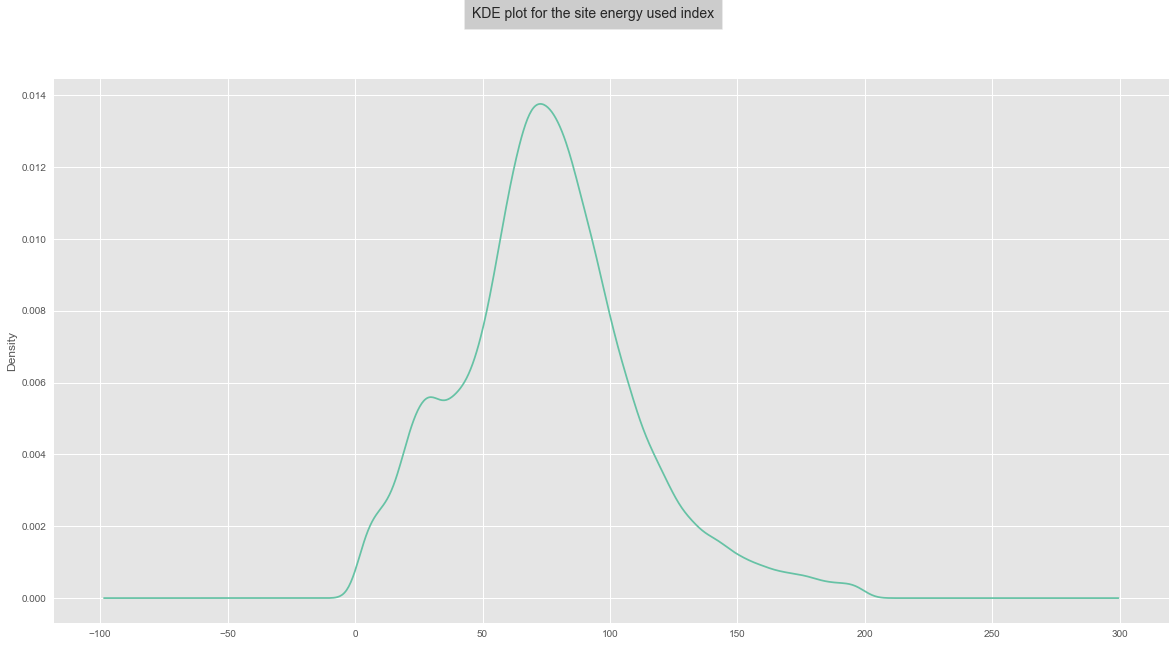

In [24]:
fig = plt.figure(figsize=(20,10))
df.site_eui.plot(kind='kde')
plt.suptitle('KDE plot for the site energy used index',bbox={'facecolor': '0.8', 'pad': 8}, fontsize=14)

Text(0.5, 0.98, 'Plot for the distribution of max temp in january')

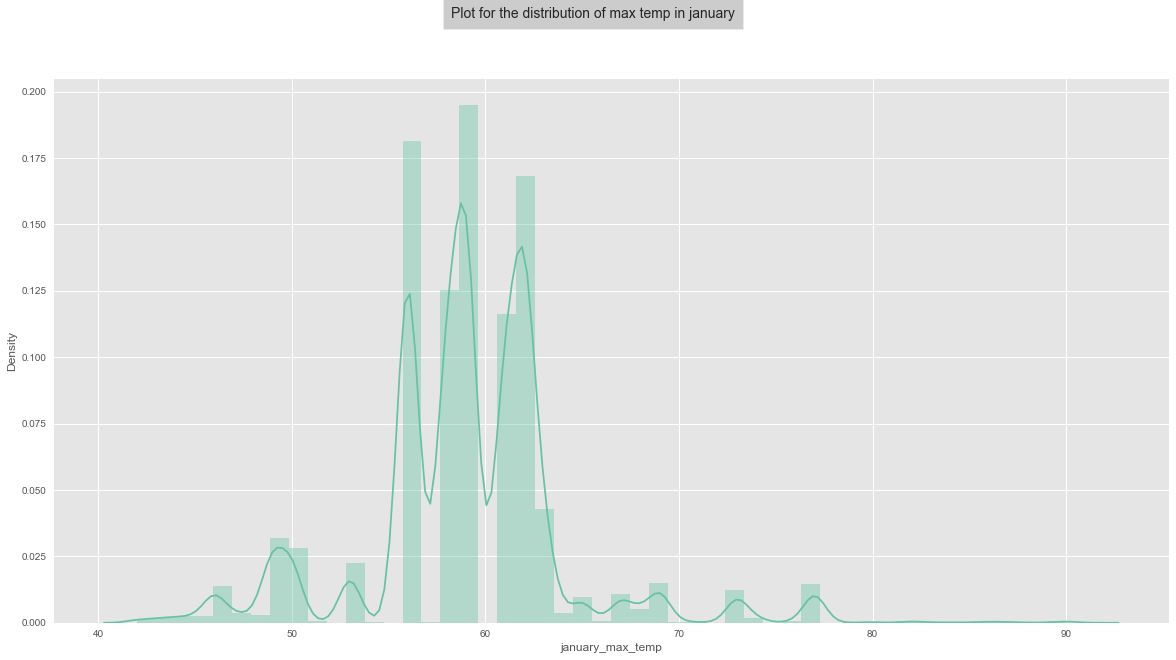

In [25]:
fig = plt.figure(figsize=(20,10))
sns.distplot(df['january_max_temp'])
plt.suptitle('Plot for the distribution of max temp in january',bbox={'facecolor': '0.8', 'pad': 8}, fontsize=14)

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [26]:
# Only for columns of train data set
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [27]:
# Only for columns of test data set
dftest.columns = dftest.columns.str.lower().str.replace(' ', '_')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

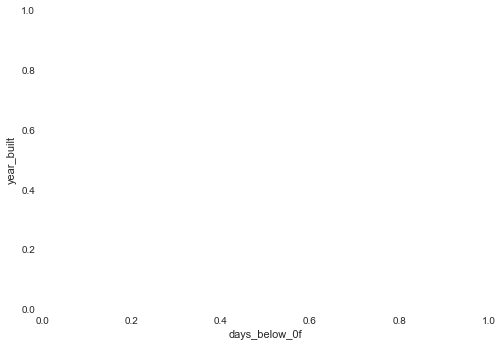

In [28]:
profile1 = ProfileReport(df=df)
profile1.to_file(output_file='siteco.html')
print('Accomplished!')

<a name = Section52></a>
### **5.2  Handling of Missing Data**

- In this section, we will identify missing data and check the proportion of it and take appropriate measures.

In [29]:
# Check for any missing values
print(any(df.isna().sum()))

True


**Observations:**
-  Looks like there are missing values in the  dataset.

In [30]:
# Check for any missing values
#print(df[df.isna().any(axis=1)])
print(len(df[df.isna().any(axis=1)]))

62522


**Observations:**

-  As we had observed there are missing values in the train dataset. 
- There are approx __*64448*__ missing values in the train dataset.

In [31]:
# Check for any missing values
print(any(dftest.isna().sum()))

True


In [32]:
# Check for any missing values
print(len(dftest[dftest.isna().any(axis=1)]))

9327


**Observations:**

-  As we had observed there are missing values in the test dataset. 
- There are approx __*9327*__ missing values in the test dataset.

In [33]:
null_frame = pd.DataFrame(index = df.columns.values)
null_frame['Null Frequency'] = df.isnull().sum().values
percent = df.isnull().sum().values/df.shape[0]
null_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
null_frame.T

year_factor  state_factor  building_class  facility_type  \
Null Frequency          0.0           0.0             0.0            0.0   
Missing %age            0.0           0.0             0.0            0.0   

                floor_area  year_built  energy_star_rating  elevation  \
Null Frequency         0.0     1742.00            25685.00        0.0   
Missing %age           0.0        2.37               34.95        0.0   

                january_min_temp  january_avg_temp  january_max_temp  \
Null Frequency               0.0               0.0               0.0   
Missing %age                 0.0               0.0               0.0   

                february_min_temp  february_avg_temp  february_max_temp  \
Null Frequency                0.0                0.0                0.0   
Missing %age                  0.0                0.0                0.0   

                march_min_temp  march_avg_temp  march_max_temp  \
Null Frequency             0.0             0.0             0.0   
Missing %age               0.0             0.0             0.0   

                april_min_temp  april_avg_temp  april_max_temp  may_min_temp  \
Null Frequency             0.0             0.0             0.0           0.0   
Missing %age               0.0             0.0             0.0           0.0   

                may_avg_temp  may_max_temp  june_min_temp  june_avg_temp  \
Null Frequency           0.0           0.0            0.0            0.0   
Missing %age             0.0           0.0            0.0            0.0   

                june_max_temp  july_min_temp  july_avg_temp  july_max_temp  \
Null Frequency            0.0            0.0            0.0            0.0   
Missing %age              0.0            0.0            0.0            0.0   

                august_min_temp  august_avg_temp  august_max_temp  \
Null Frequency              0.0              0.0              0.0   
Missing %age                0.0              0.0              0.0   

                september_min_temp  september_avg_temp  september_max_temp  \
Null Frequency                 0.0                 0.0                 0.0   
Missing %age                   0.0                 0.0                 0.0   

                october_min_temp  october_avg_temp  october_max_temp  \
Null Frequency               0.0               0.0               0.0   
Missing %age                 0.0               0.0               0.0   

                november_min_temp  november_avg_temp  november_max_temp  \
Null Frequency                0.0                0.0                0.0   
Missing %age                  0.0                0.0                0.0   

                december_min_temp  december_avg_temp  december_max_temp  \
Null Frequency                0.0                0.0                0.0   
Missing %age                  0.0                0.0                0.0   

                cooling_degree_days  heating_degree_days  \
Null Frequency                  0.0                  0.0   
Missing %age                    0.0                  0.0   

                precipitation_inches  snowfall_inches  snowdepth_inches  \
Null Frequency                   0.0              0.0               0.0   
Missing %age                     0.0              0.0               0.0   

                avg_temp  days_below_30f  days_below_20f  days_below_10f  \
Null Frequency       0.0             0.0             0.0             0.0   
Missing %age         0.0             0.0             0.0             0.0   

                days_below_0f  days_above_80f  days_above_90f  \
Null Frequency            0.0             0.0             0.0   
Missing %age              0.0             0.0             0.0   

                days_above_100f  days_above_110f  direction_max_wind_speed  \
Null Frequency              0.0              0.0                  39784.00   
Missing %age                0.0              0.0                     54.13   

                direction_peak_wind_speed

**Observations:**
- Total % for missing values for energy rating is 35%.

In [34]:
# For testing dataset
null_frametest = pd.DataFrame(index = dftest.columns.values)
null_frametest['Null Frequency'] = dftest.isnull().sum().values
percent = dftest.isnull().sum().values/dftest.shape[0]
null_frametest['Missing %age'] = np.round(percent, decimals = 4) * 100
null_frametest.T

year_factor  state_factor  building_class  facility_type  \
Null Frequency          0.0           0.0             0.0            0.0   
Missing %age            0.0           0.0             0.0            0.0   

                floor_area  year_built  energy_star_rating  elevation  \
Null Frequency         0.0       92.00             2254.00        0.0   
Missing %age           0.0        0.95               23.23        0.0   

                january_min_temp  january_avg_temp  january_max_temp  \
Null Frequency               0.0               0.0               0.0   
Missing %age                 0.0               0.0               0.0   

                february_min_temp  february_avg_temp  february_max_temp  \
Null Frequency                0.0                0.0                0.0   
Missing %age                  0.0                0.0                0.0   

                march_min_temp  march_avg_temp  march_max_temp  \
Null Frequency             0.0             0.0             0.0   
Missing %age               0.0             0.0             0.0   

                april_min_temp  april_avg_temp  april_max_temp  may_min_temp  \
Null Frequency             0.0             0.0             0.0           0.0   
Missing %age               0.0             0.0             0.0           0.0   

                may_avg_temp  may_max_temp  june_min_temp  june_avg_temp  \
Null Frequency           0.0           0.0            0.0            0.0   
Missing %age             0.0           0.0            0.0            0.0   

                june_max_temp  july_min_temp  july_avg_temp  july_max_temp  \
Null Frequency            0.0            0.0            0.0            0.0   
Missing %age              0.0            0.0            0.0            0.0   

                august_min_temp  august_avg_temp  august_max_temp  \
Null Frequency              0.0              0.0              0.0   
Missing %age                0.0              0.0              0.0   

                september_min_temp  september_avg_temp  september_max_temp  \
Null Frequency                 0.0                 0.0                 0.0   
Missing %age                   0.0                 0.0                 0.0   

                october_min_temp  october_avg_temp  october_max_temp  \
Null Frequency               0.0               0.0               0.0   
Missing %age                 0.0               0.0               0.0   

                november_min_temp  november_avg_temp  november_max_temp  \
Null Frequency                0.0                0.0                0.0   
Missing %age                  0.0                0.0                0.0   

                december_min_temp  december_avg_temp  december_max_temp  \
Null Frequency                0.0                0.0                0.0   
Missing %age                  0.0                0.0                0.0   

                cooling_degree_days  heating_degree_days  \
Null Frequency                  0.0                  0.0   
Missing %age                    0.0                  0.0   

                precipitation_inches  snowfall_inches  snowdepth_inches  \
Null Frequency                   0.0              0.0               0.0   
Missing %age                     0.0              0.0               0.0   

                avg_temp  days_below_30f  days_below_20f  days_below_10f  \
Null Frequency       0.0             0.0             0.0             0.0   
Missing %age         0.0             0.0             0.0             0.0   

                days_below_0f  days_above_80f  days_above_90f  \
Null Frequency            0.0             0.0             0.0   
Missing %age              0.0             0.0             0.0   

                days_above_100f  days_above_110f  direction_max_wind_speed  \
Null Frequency              0.0              0.0                   8575.00   
Missing %age                0.0              0.0                     88.36   

                direction_peak_wind_speed

**Observations:**
- Total % for missing values for energy rating is 23%.

In [35]:
df[df['direction_max_wind_speed'].isnull()]['days_with_fog'].unique()

array([ nan, 113., 184.,  82., 311.,  86.,  37., 289., 106.,  58., 267.,
        73., 114., 101., 104., 131.,  31.])

In [36]:
# Stats of dataframe
stats    = []
for col in df.columns:
    stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)

Feature  Unique_values  Percentage of missing values  \
61              days_with_fog             42                     60.393480   
59  direction_peak_wind_speed              8                     55.102180   
60             max_wind_speed             16                     54.129364   
58   direction_max_wind_speed             10                     54.129364   
6          energy_star_rating            100                     34.946529   
..                        ...            ...                           ...   
27              july_avg_temp            161                      0.000000   
28              july_max_temp             41                      0.000000   
29            august_min_temp             31                      0.000000   
30            august_avg_temp            167                      0.000000   
63                         id          73498                      0.000000   

    Percentage of values in the biggest category     type  
61                                     60.393480  float64  
59                                     55.102180  float64  
60                                     54.129364  float64  
58                                     54.129364  float64  
6                                      34.946529  float64  
..                                           ...      ...  
27                                     17.287545  float64  
28                                     39.927617    int64  
29                                     42.621568    int64  
30                                     17.287545  float64  
63                                      0.001361    int64  

[64 rows x 5 columns]

**Observations:**

-  There are some missing values in the six columns of the  dataset. Now lets remove the missing values

In [37]:
# Dimentions of data
dftest.shape

(9705, 63)

In [38]:
# For trainin dataset
for c in df.select_dtypes(exclude=['object', 'datetime64[ns]']):
    print("col is",c)
    if df[c].isna().sum() != 0:
        #print(c)
        med_c = df[c].median()
        print(med_c)
        df[c]=df[c].replace(to_replace=np.nan, value=med_c)
        decimals = 2    
        df[c] = df[c].apply(lambda x: round(x, decimals))
    else:
        decimals = 2    
        df[c] = df[c].apply(lambda x: round(x, decimals))

col is year_factor
col is floor_area
col is year_built
1951.0
col is energy_star_rating
68.0
col is elevation
col is january_min_temp
col is january_avg_temp
col is january_max_temp
col is february_min_temp
col is february_avg_temp
col is february_max_temp
col is march_min_temp
col is march_avg_temp
col is march_max_temp
col is april_min_temp
col is april_avg_temp
col is april_max_temp
col is may_min_temp
col is may_avg_temp
col is may_max_temp
col is june_min_temp
col is june_avg_temp
col is june_max_temp
col is july_min_temp
col is july_avg_temp
col is july_max_temp
col is august_min_temp
col is august_avg_temp
col is august_max_temp
col is september_min_temp
col is september_avg_temp
col is september_max_temp
col is october_min_temp
col is october_avg_temp
col is october_max_temp
col is november_min_temp
col is november_avg_temp
col is november_max_temp
col is december_min_temp
col is december_avg_temp
col is december_max_temp
col is cooling_degree_days
col is heating_degree_days
co

In [39]:
for co in df.select_dtypes(include=['object']):
    #print("col is",co)
    if df[co].isna().sum() != 0:
        #print("insideif loop", co)
        med_co = df[co].mode()[0]
        print(med_co)
        df[co]=df[co].replace(to_replace=np.nan, value=med_co) 

In [40]:
df.isna().sum()

year_factor                  0
state_factor                 0
building_class               0
facility_type                0
floor_area                   0
                            ..
direction_peak_wind_speed    0
max_wind_speed               0
days_with_fog                0
site_eui                     0
id                           0
Length: 64, dtype: int64

In [41]:
# For testing dataset
for c in dftest.select_dtypes(exclude=['object', 'datetime64[ns]']):
    print("col is",c)
    if dftest[c].isna().sum() != 0:
        #print(c)
        med_c = dftest[c].median()
        print(med_c)
        dftest[c]=dftest[c].replace(to_replace=np.nan, value=med_c)
        decimals = 2    
        dftest[c] = dftest[c].apply(lambda x: round(x, decimals))
    else:
        decimals = 2    
        dftest[c] = dftest[c].apply(lambda x: round(x, decimals))

col is year_factor
col is floor_area
col is year_built
1969.0
col is energy_star_rating
72.0
col is elevation
col is january_min_temp
col is january_avg_temp
col is january_max_temp
col is february_min_temp
col is february_avg_temp
col is february_max_temp
col is march_min_temp
col is march_avg_temp
col is march_max_temp
col is april_min_temp
col is april_avg_temp
col is april_max_temp
col is may_min_temp
col is may_avg_temp
col is may_max_temp
col is june_min_temp
col is june_avg_temp
col is june_max_temp
col is july_min_temp
col is july_avg_temp
col is july_max_temp
col is august_min_temp
col is august_avg_temp
col is august_max_temp
col is september_min_temp
col is september_avg_temp
col is september_max_temp
col is october_min_temp
col is october_avg_temp
col is october_max_temp
col is november_min_temp
col is november_avg_temp
col is november_max_temp
col is december_min_temp
col is december_avg_temp
col is december_max_temp
col is cooling_degree_days
col is heating_degree_days
co

In [42]:
for co in dftest.select_dtypes(include=['object']):
    #print("col is",co)
    if dftest[co].isna().sum() != 0:
        #print("insideif loop", co)
        med_co = dftest[co].mode()[0]
        print(med_co)
        dftest[co]=dftest[co].replace(to_replace=np.nan, value=med_co) 

In [43]:
dftest.isna().sum()

year_factor                  0
state_factor                 0
building_class               0
facility_type                0
floor_area                   0
                            ..
direction_max_wind_speed     0
direction_peak_wind_speed    0
max_wind_speed               0
days_with_fog                0
id                           0
Length: 63, dtype: int64

In [44]:
print(df.shape)
print(dftest.shape)

(73498, 64)
(9705, 63)


<a name = Section53></a>
### **5.3 Handling of Redundant Data**

- In this section, we will identify redundant data and check the proportion of it and take appropriate measures.

In [45]:
#check if any duplicate row
print('Data have  Duplicate Rows?', df.duplicated().any())

Data have  Duplicate Rows? False


In [46]:
#To get the total count of duplicate values.
df.duplicated().sum()

0

In [47]:
# We will start by first removing the duplicate rows if there are any
if df.duplicated().any() : 
    df.drop_duplicates(keep="first", inplace=True)

<a name = Section54></a>
### **5.4 Handling of Inconsistent Data**

- In this section, we will **identify inconsistency** in data and and then **take appropriate measures**.

- Previously, we observed that **Timestamp** feature was **incorrectly indentified** as Object, so, we will rectify it.

- Additionally, we can observe that some features are having language of different format such as brand and model.

In [48]:
df['building_class'].unique()

array(['Commercial', 'Residential'], dtype=object)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73498 entries, 1 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year_factor                73498 non-null  int64  
 1   state_factor               73498 non-null  object 
 2   building_class             73498 non-null  object 
 3   facility_type              73498 non-null  object 
 4   floor_area                 73498 non-null  float64
 5   year_built                 73498 non-null  float64
 6   energy_star_rating         73498 non-null  float64
 7   elevation                  73498 non-null  float64
 8   january_min_temp           73498 non-null  int64  
 9   january_avg_temp           73498 non-null  float64
 10  january_max_temp           73498 non-null  int64  
 11  february_min_temp          73498 non-null  int64  
 12  february_avg_temp          73498 non-null  float64
 13  february_max_temp          73498 non-null  int

In [50]:
first_column = df.pop('id')
  
# insert column using insert(position,column_name,
# first_column) function
df.insert(0, 'id', first_column)
  
print()
print("After Shifting column to first position :")
df.columns


After Shifting column to first position :


Index(['id', 'year_factor', 'state_factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'elevation',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfa

In [51]:
df[df['building_class']=="Residential"]['year_built'].value_counts()

1928.0    1456
1927.0    1455
1929.0    1395
1930.0    1181
1926.0    1111
          ... 
1845.0       1
1873.0       1
1854.0       1
1815.0       1
1870.0       1
Name: year_built, Length: 149, dtype: int64

In [52]:
# Learn more about the variable brand.
print("Distinct responses for building_class (Frequency):", len(set(df['building_class'])))
print("Distinct responses for building_class:", set(df['building_class']))  

Distinct responses for building_class (Frequency): 2
Distinct responses for building_class: {'Residential', 'Commercial'}


**Observations:**

-  There are no 2 type of building class 

In [53]:
first_column = dftest.pop('id')
  
# insert column using insert(position,column_name,
# first_column) function
dftest.insert(0, 'id', first_column)
  
print()
print("After Shifting column to first position in the testing dataset :")
dftest.columns


After Shifting column to first position in the testing dataset :


Index(['id', 'year_factor', 'state_factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'elevation',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfa

In [54]:
# by minimum
min = pd.Series([col for col in df.columns if '_min_temp' in col])
#print(min)
df['mintempjandec'] = df[min].sum(axis=1)
df['mintempjandec'] = df['mintempjandec']/12
# by maximum
max = pd.Series([col for col in df.columns if '_max_temp' in col])
df['maxtempjandec'] = df[max].sum(axis=1)
df['maxtempjandec'] = df['maxtempjandec']/12
# by average
avg = pd.Series([col for col in df.columns if '_avg_temp' in col])
df['avgtempjandec'] = df[avg].sum(axis=1)
df['avgtempjandec'] = df['avgtempjandec']/12

In [55]:
df['heating_degree_days'] = df['heating_degree_days']/12
df['cooling_degree_days'] = df['cooling_degree_days']/12

In [56]:
df.head()

id  year_factor state_factor building_class  \
1   1            1      State_1     Commercial   
2   2            1      State_1     Commercial   
3   3            1      State_1     Commercial   
4   4            1      State_1     Commercial   
5   5            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   
5                      Warehouse_Selfstorage    119900.0      1956.0   

   energy_star_rating  elevation  january_min_temp  january_avg_temp  \
1                45.0        1.8                36              50.5   
2                97.0        1.8                36              50.5   
3                46.0        1.8                36              50.5   
4               100.0        2.4                36              50.5   
5                68.0        2.4                36              50.5   

   january_max_temp  february_min_temp  february_avg_temp  february_max_temp  \
1                68                 35              50.59                 73   
2                68                 35              50.59                 73   
3                68                 35              50.59                 73   
4                68                 35              50.59                 73   
5                68                 35              50.59                 73   

   march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
1              40           53.69              80              41   
2              40           53.69              80              41   
3              40           53.69              80              41   
4              40           53.69              80              41   
5              40           53.69              80              41   

   april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  may_max_temp  \
1            55.5              78            46         56.85            84   
2            55.5              78            46         56.85            84   
3            55.5              78            46         56.85            84   
4            55.5              78            46         56.85            84   
5            55.5              78            46         56.85            84   

   june_min_temp  june_avg_temp  june_max_temp  july_min_temp  july_avg_temp  \
1             50           60.5             90             52          62.73   
2             50           60.5             90             52          62.73   
3             50           60.5             90             52          62.73   
4             50           60.5             90             52          62.73   
5             50           60.5             90             52          62.73   

   july_max_temp  august_min_temp  august_avg_temp  august_max_temp  \
1             84               52            62.16               85   
2             84               52            62.16               85   
3             84               52            62.16               85   
4             84               52            62.16               85   
5             84               52            62.16               85   

   september_min_temp  september_avg_temp  september_max_temp  \
1                  52               64.65                  90   
2                  52               64.65                  90   
3                  52               64.65                  90   
4                  52               64.65                  90   
5                  52               64.65                  90   

   october_min_temp  october_avg_temp  october_max_temp  november_min_temp  \
1                47             63.02                83                 43   
2         

In [57]:
df.drop(columns=['january_min_temp', 'january_avg_temp', 'january_max_temp',
                'february_min_temp', 'february_avg_temp', 'february_max_temp',
                'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
               'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
                'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
               'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
               'august_avg_temp', 'august_max_temp', 'september_min_temp',
               'september_avg_temp', 'september_max_temp', 'october_min_temp',
               'october_avg_temp', 'october_max_temp', 'november_min_temp',
               'november_avg_temp', 'november_max_temp', 'december_min_temp',
               'december_avg_temp', 'december_max_temp'], axis =1, inplace = True)

In [58]:
df.head()

id  year_factor state_factor building_class  \
1   1            1      State_1     Commercial   
2   2            1      State_1     Commercial   
3   3            1      State_1     Commercial   
4   4            1      State_1     Commercial   
5   5            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   
5                      Warehouse_Selfstorage    119900.0      1956.0   

   energy_star_rating  elevation  cooling_degree_days  heating_degree_days  \
1                45.0        1.8             9.583333           246.666667   
2                97.0        1.8             9.583333           246.666667   
3                46.0        1.8             9.583333           246.666667   
4               100.0        2.4             9.583333           246.666667   
5                68.0        2.4             9.583333           246.666667   

   precipitation_inches  snowfall_inches  snowdepth_inches  avg_temp  \
1                 16.59              0.0                 0     56.97   
2                 16.59              0.0                 0     56.97   
3                 16.59              0.0                 0     56.97   
4                 16.59              0.0                 0     56.97   
5                 16.59              0.0                 0     56.97   

   days_below_30f  days_below_20f  days_below_10f  days_below_0f  \
1               0               0               0              0   
2               0               0               0              0   
3               0               0               0              0   
4               0               0               0              0   
5               0               0               0              0   

   days_above_80f  days_above_90f  days_above_100f  days_above_110f  \
1              14               0                0                0   
2              14               0                0                0   
3              14               0                0                0   
4              14               0                0                0   
5              14               0                0                0   

   direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
1                       1.0                        1.0             1.0   
2                       1.0                        1.0             1.0   
3                       1.0                        1.0             1.0   
4                       1.0                        1.0             1.0   
5                       1.0                        1.0             1.0   

   days_with_fog  site_eui  mintempjandec  maxtempjandec  avgtempjandec  
1           12.0     26.50      44.166667      79.833333      56.938333  
2           12.0     24.69      44.166667      79.833333      56.938333  
3           12.0     48.41      44.166667      79.833333      56.938333  
4          104.0      3.90      44.166667      79.833333      56.938333  
5          104.0      6.60      44.166667      79.833333      56.938333

In [59]:
# by minimum
min = pd.Series([col for col in dftest.columns if '_min_temp' in col])
#print(min)
dftest['mintempjandec'] = dftest[min].sum(axis=1)
dftest['mintempjandec'] = dftest['mintempjandec']/12
# by maximum
max = pd.Series([col for col in dftest.columns if '_max_temp' in col])
dftest['maxtempjandec'] = dftest[max].sum(axis=1)
dftest['maxtempjandec'] = dftest['maxtempjandec']/12
# by average
avg = pd.Series([col for col in dftest.columns if '_avg_temp' in col])
dftest['avgtempjandec'] = dftest[avg].sum(axis=1)
dftest['avgtempjandec'] = dftest['avgtempjandec']/12

In [60]:
dftest['heating_degree_days'] = dftest['heating_degree_days']/12
dftest['cooling_degree_days'] = dftest['cooling_degree_days']/12

In [61]:
dftest.drop(columns=['january_min_temp', 'january_avg_temp', 'january_max_temp',
                'february_min_temp', 'february_avg_temp', 'february_max_temp',
                'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
               'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
                'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
               'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
               'august_avg_temp', 'august_max_temp', 'september_min_temp',
               'september_avg_temp', 'september_max_temp', 'october_min_temp',
               'october_avg_temp', 'october_max_temp', 'november_min_temp',
               'november_avg_temp', 'november_max_temp', 'december_min_temp',
               'december_avg_temp', 'december_max_temp'], axis =1, inplace = True)

In [62]:
dftest.head()

id  year_factor state_factor building_class  \
0  75757            7      State_1     Commercial   
1  75758            7      State_1     Commercial   
2  75759            7      State_1     Commercial   
3  75760            7      State_1     Commercial   
4  75761            7      State_1     Commercial   

                  facility_type  floor_area  year_built  energy_star_rating  \
0  Grocery_store_or_food_market     28484.0      1994.0                37.0   
1  Grocery_store_or_food_market     21906.0      1961.0                55.0   
2  Grocery_store_or_food_market     16138.0      1950.0                 1.0   
3  Grocery_store_or_food_market     97422.0      1971.0                34.0   
4  Grocery_store_or_food_market     61242.0      1942.0                35.0   

   elevation  cooling_degree_days  heating_degree_days  precipitation_inches  \
0        2.4                 28.5                176.0                 25.24   
1       45.7                 28.5                176.0                 25.24   
2       59.1                 28.5                176.0                 25.24   
3       35.4                 28.5                176.0                 25.24   
4        1.8                 28.5                176.0                 25.24   

   snowfall_inches  snowdepth_inches  avg_temp  days_below_30f  \
0              0.0                 0     59.89               0   
1              0.0                 0     59.89               0   
2              0.0                 0     59.89               0   
3              0.0                 0     59.89               0   
4              0.0                 0     59.89               0   

   days_below_20f  days_below_10f  days_below_0f  days_above_80f  \
0               0               0              0              29   
1               0               0              0              29   
2               0               0              0              29   
3               0               0              0              29   
4               0               0              0              29   

   days_above_90f  days_above_100f  days_above_110f  direction_max_wind_speed  \
0               5                2                0                     330.0   
1               5                2                0                     330.0   
2               5                2                0                     330.0   
3               5                2                0                     330.0   
4               5                2                0                     340.0   

   direction_peak_wind_speed  max_wind_speed  days_with_fog  mintempjandec  \
0                      320.0            18.3          129.0      46.166667   
1                      320.0            18.3          129.0      46.166667   
2                      320.0            18.3          129.0      46.166667   
3                      320.0            18.3          129.0      46.166667   
4                      330.0            22.8          126.0      46.166667   

   maxtempjandec  avgtempjandec  
0           81.0        59.8775  
1           81.0        59.8775  
2           81.0        59.8775  
3           81.0        59.8775  
4           81.0        59.8775

In [63]:
gc.collect()

619917

In [64]:
# Get list of categorical variables,date  and numerical variables for the data set
catcol=[col for col in df.columns if df[col].dtype == "object"]
print("Categorical cols of dataset are = ", catcol, ". No of categorical columns = ", len(catcol))
print()
datecol=[col for col in df.columns if df[col].dtype == "datetime64[ns]"]
print("DateTime cols of dataset are = ", datecol, ". ,No of datetime columns = ", len(datecol))
print()
numcols = [col for col in df.columns if (df[col].dtype != "object") & (df[col].dtype != "datetime64[ns]")]
print("Numerical cols of dataset  are = ", numcols, ". No of numerical columns = ", len(numcols))

Categorical cols of dataset are =  ['state_factor', 'building_class', 'facility_type'] . No of categorical columns =  3

DateTime cols of dataset are =  [] . ,No of datetime columns =  0

Numerical cols of dataset  are =  ['id', 'year_factor', 'floor_area', 'year_built', 'energy_star_rating', 'elevation', 'cooling_degree_days', 'heating_degree_days', 'precipitation_inches', 'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30f', 'days_below_20f', 'days_below_10f', 'days_below_0f', 'days_above_80f', 'days_above_90f', 'days_above_100f', 'days_above_110f', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog', 'site_eui', 'mintempjandec', 'maxtempjandec', 'avgtempjandec'] . No of numerical columns =  28


In [65]:
df[numcols].skew().sort_values(key=abs, ascending=False)[:10]

days_above_110f              83.344210
days_above_100f              23.529175
year_built                  -12.333414
elevation                     7.323664
floor_area                    6.094300
days_below_0f                 4.831536
days_above_90f                3.171602
direction_peak_wind_speed     3.046173
max_wind_speed                2.931622
direction_max_wind_speed      2.836925
dtype: float64

In [66]:
skewed = ['days_above_110f', 'days_above_100f']

for var in skewed:
    
    # map the variable values into 0 and 1
    df[var] = np.where(df[var]== 0, 0, 1)

In [67]:
df[numcols].skew().sort_values(key=abs, ascending=False)[:10]

days_above_110f              34.668936
year_built                  -12.333414
elevation                     7.323664
floor_area                    6.094300
days_below_0f                 4.831536
days_above_100f               4.005991
days_above_90f                3.171602
direction_peak_wind_speed     3.046173
max_wind_speed                2.931622
direction_max_wind_speed      2.836925
dtype: float64

In [68]:
# Get list of categorical variables,date  and numerical variables for the testing  set
catcoltest = [col for col in dftest.columns if dftest[col].dtype == "object"]
print("Categorical cols of test dataset are = ", catcoltest, ". No of categorical columns = ", len(catcoltest))
print()
datecoltest =[col for col in dftest.columns if dftest[col].dtype == "datetime64[ns]"]
print("DateTime cols of test dataset are = ", datecoltest, ". ,No of datetime columns = ", len(datecoltest))
print()
numcolstest = [col for col in dftest.columns if (dftest[col].dtype != "object") & (dftest[col].dtype != "datetime64[ns]")]
print("Numerical cols of  test dataset  are = ", numcolstest, ". No of numerical columns = ", len(numcolstest))

Categorical cols of test dataset are =  ['state_factor', 'building_class', 'facility_type'] . No of categorical columns =  3

DateTime cols of test dataset are =  [] . ,No of datetime columns =  0

Numerical cols of  test dataset  are =  ['id', 'year_factor', 'floor_area', 'year_built', 'energy_star_rating', 'elevation', 'cooling_degree_days', 'heating_degree_days', 'precipitation_inches', 'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30f', 'days_below_20f', 'days_below_10f', 'days_below_0f', 'days_above_80f', 'days_above_90f', 'days_above_100f', 'days_above_110f', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog', 'mintempjandec', 'maxtempjandec', 'avgtempjandec'] . No of numerical columns =  27


In [69]:
dftest[numcolstest].skew().sort_values(key=abs, ascending=False)[:10]

snowdepth_inches             12.601759
year_built                  -11.892399
floor_area                    7.290691
days_with_fog                 5.348793
direction_max_wind_speed     -4.931270
direction_peak_wind_speed    -4.107702
snowfall_inches               2.794960
days_above_100f               2.563246
precipitation_inches          2.145557
elevation                     1.622391
dtype: float64

**Observations:**

-  The skewness is negligible.

In [70]:
# Check and clean dirtiness in categorical data of the gender_age_train  dataset
for d in catcol:
    print('{} has {} unique values.'.format(d, df[d].unique()))
    print('{} has {} unique values.'.format(d, df[d].nunique()))
    print("\n")

state_factor has ['State_1' 'State_2' 'State_4' 'State_6' 'State_8' 'State_10' 'State_11'] unique values.
state_factor has 7 unique values.


building_class has ['Commercial' 'Residential'] unique values.
building_class has 2 unique values.


facility_type has ['Warehouse_Distribution_or_Shipping_center' 'Retail_Enclosed_mall'
 'Education_Other_classroom' 'Warehouse_Nonrefrigerated'
 'Warehouse_Selfstorage' 'Office_Uncategorized' 'Commercial_Other'
 'Mixed_Use_Predominantly_Commercial' 'Office_Medical_non_diagnostic'
 'Education_College_or_university' 'Industrial'
 'Public_Assembly_Entertainment_culture'
 'Retail_Vehicle_dealership_showroom' 'Retail_Uncategorized'
 'Lodging_Hotel' 'Retail_Strip_shopping_mall' 'Education_Uncategorized'
 'Health_Care_Inpatient' 'Public_Assembly_Drama_theater'
 'Public_Assembly_Social_meeting' 'Religious_worship'
 'Mixed_Use_Commercial_and_Residential' 'Office_Bank_or_other_financial'
 'Commercial_Unknown' 'Grocery_store_or_food_market'
 'Service_Vehicle_

In [72]:
df.describe()

id   year_factor    floor_area    year_built  \
count  73498.000000  73498.000000  7.349800e+04  73498.000000   
mean   37898.128276      4.368663  1.641147e+05   1951.994517   
std    21810.449673      1.469903  2.372610e+05     36.622041   
min        1.000000      1.000000  9.600000e+02      0.000000   
25%    19112.250000      3.000000  6.250000e+04   1927.000000   
50%    37947.500000      5.000000  9.134100e+04   1951.000000   
75%    56700.750000      6.000000  1.647580e+05   1975.000000   
max    75756.000000      6.000000  6.353396e+06   2015.000000   

       energy_star_rating     elevation  cooling_degree_days  \
count        73498.000000  73498.000000         73498.000000   
mean            64.050954     39.162966           100.354125   
std             22.871368     60.369548            32.624444   
min              1.000000     -6.400000             0.000000   
25%             57.000000     11.900000            94.000000   
50%             68.000000     25.000000           106.416667   
75%             77.000000     42.700000           124.083333   
max            100.000000   1924.500000           412.333333   

       heating_degree_days  precipitation_inches  snowfall_inches  \
count         73498.000000          73498.000000     73498.000000   
mean            360.049788             42.406768        29.145030   
std              68.229840             10.543801        17.811614   
min              33.166667              0.000000         0.000000   
25%             331.500000             39.350000         9.600000   
50%             361.416667             42.170000        32.700000   
75%             389.166667             46.320000        49.100000   
max             660.750000            107.690000       127.300000   

       snowdepth_inches      avg_temp  days_below_30f  days_below_20f  \
count      73498.000000  73498.000000    73498.000000    73498.000000   
mean         164.921590     56.195846       48.577417       17.371167   
std          175.485033      2.224663       27.404361       14.365232   
min            0.000000     44.510000        0.000000        0.000000   
25%           10.000000     55.150000       22.000000        5.000000   
50%          101.000000     56.840000       50.000000       11.000000   
75%          377.000000     57.220000       66.000000       26.000000   
max         1292.000000     77.250000      170.000000       93.000000   

       days_below_10f  days_below_0f  days_above_80f  days_above_90f  \
count    73498.000000   73498.000000    73498.000000    73498.000000   
mean         4.835043       0.849452       82.745993       14.057158   
std          6.972350       2.829224       25.284205       10.943690   
min          0.000000       0.000000        0.000000        0.000000   
25%          0.000000       0.000000       72.000000        6.000000   
50%          2.000000       0.000000       84.000000       12.000000   
75%          7.000000       0.000000       97.000000       17.000000   
max         59.000000      31.000000      260.000000      185.000000   

       days_above_100f  days_above_110f  direction_max_wind_speed  \
count     73498.000000     73498.000000              73498.000000   
mean          0.052654         0.000830                 31.120670   
std           0.223344         0.028797                 94.702348   
min           0.000000         0.000000                  1.000000   
25%           0.000000         0.000000                  1.000000   
50%           0.000000         0.000000                  1.000000   
75%           0.000000         0.000000                  1.000000   
max           1.000000         1.000000                360.000000   

       direction_peak_wind_speed  max_wind_speed  days_with_fog      site_eui  \
count               73498.000000    73498.000000   73498.000000  73498.000000   
mean                   28.753435        2.465324     106.063539     75.496447   
std                    92.570952        4.654939      31.705

Text(0.5, 1.0, 'direction max wind_speed VS snow')

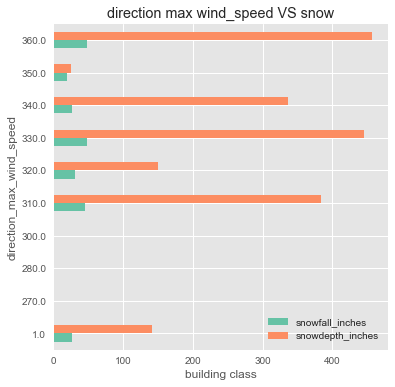

In [73]:
df.groupby('direction_max_wind_speed')[['snowfall_inches', 'snowdepth_inches']].mean().plot.barh(figsize=(6,6))
plt.xlabel('building class')
plt.title('direction max wind_speed VS snow')

<Figure size 576x396 with 0 Axes>

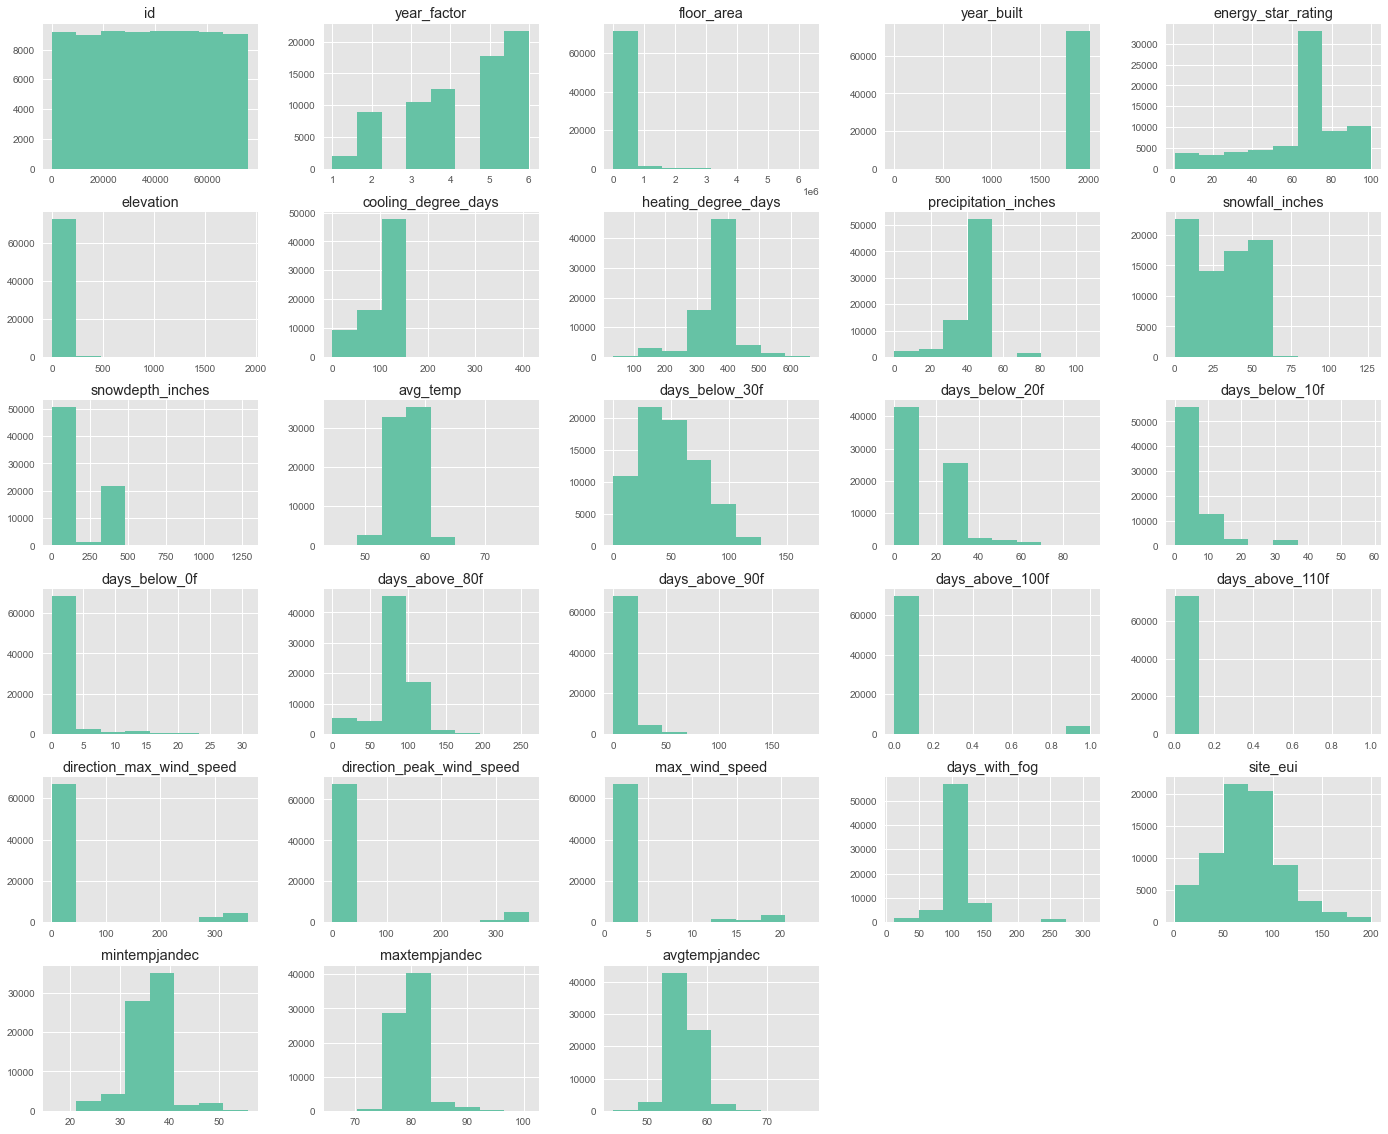

In [74]:
# checking the distribution 
plt.suptitle('Hist plots for the data set',bbox={'facecolor': '0.8', 'pad': 8}, fontsize=20)
df.hist(figsize=(24, 20), bins=8)
plt.show()

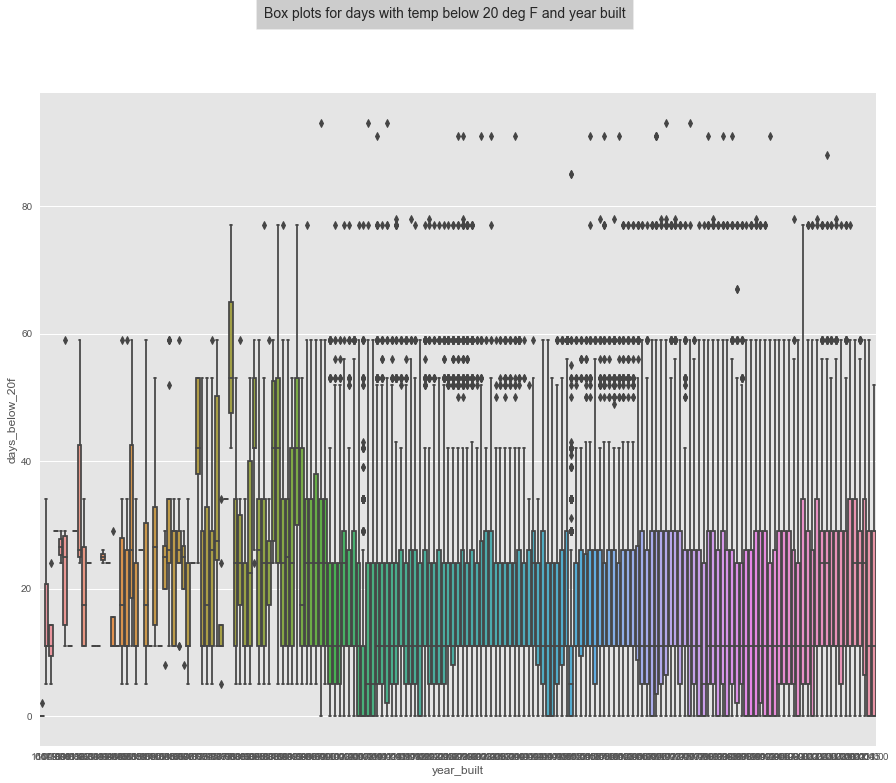

In [78]:
fig = plt.figure(figsize=(15,12))
sns.boxplot(data=df, y='days_below_20f', x='year_built')
fig.suptitle('Box plots for days with temp below 20 deg F and year built', bbox={'facecolor': '0.8', 'pad': 8}, fontsize=14)
plt.show()

In [79]:
pd.crosstab(index=df['year_built'], columns=df['facility_type'])

facility_type  2to4_Unit_Building  5plus_Unit_Building  Commercial_Other  \
year_built                                                                 
0.0                             0                    0                 0   
1600.0                          0                    0                 0   
1649.0                          0                    0                 0   
1732.0                          0                    0                 0   
1789.0                          0                    0                 0   
...                           ...                  ...               ...   
2011.0                          6                   14                 1   
2012.0                         12                   38                 5   
2013.0                         22                   47                 2   
2014.0                         14                   79                 7   
2015.0                          6                   19                 3   

facility_type  Commercial_Unknown  Data_Center  \
year_built                                       
0.0                             0            0   
1600.0                          0            0   
1649.0                          0            0   
1732.0                          0            0   
1789.0                          0            0   
...                           ...          ...   
2011.0                          0            0   
2012.0                          0            0   
2013.0                          2            0   
2014.0                          0            0   
2015.0                          0            0   

facility_type  Education_College_or_university  Education_Other_classroom  \
year_built                                                                  
0.0                                          0                          0   
1600.0                                       0                          0   
1649.0                                       0                          0   
1732.0                                       0                          0   
1789.0                                       2                          0   
...                                        ...                        ...   
2011.0                                      20                         25   
2012.0                                       9                         23   
2013.0                                       8                         33   
2014.0                                       5                         22   
2015.0                                       1                         13   

facility_type  Education_Preschool_or_daycare  Education_Uncategorized  \
year_built                                                               
0.0                                         0                        0   
1600.0                                      0                        0   
1649.0                                      0                        0   
1732.0                                      0                        0   
1789.0                                      0                        0   
...                                       ...                      ...   
2011.0                                      0                        0   
2012.0                                      0                        0   
2013.0                                      0                        0   
2014.0                                      1                        0   
2015.0                                      0                        0   

facility_type  Food_Sales  Food_Service_Other  \
year_built                                      
0.0                     0                   0   
1600.0                  0                   0   
1649.0                  0                   0   
1732.0                  0                   0   
1789.0                  0                   0   
...                   ...                 ...   
201

<a name = Section55></a>
### **5.5 Handling of Outliers**


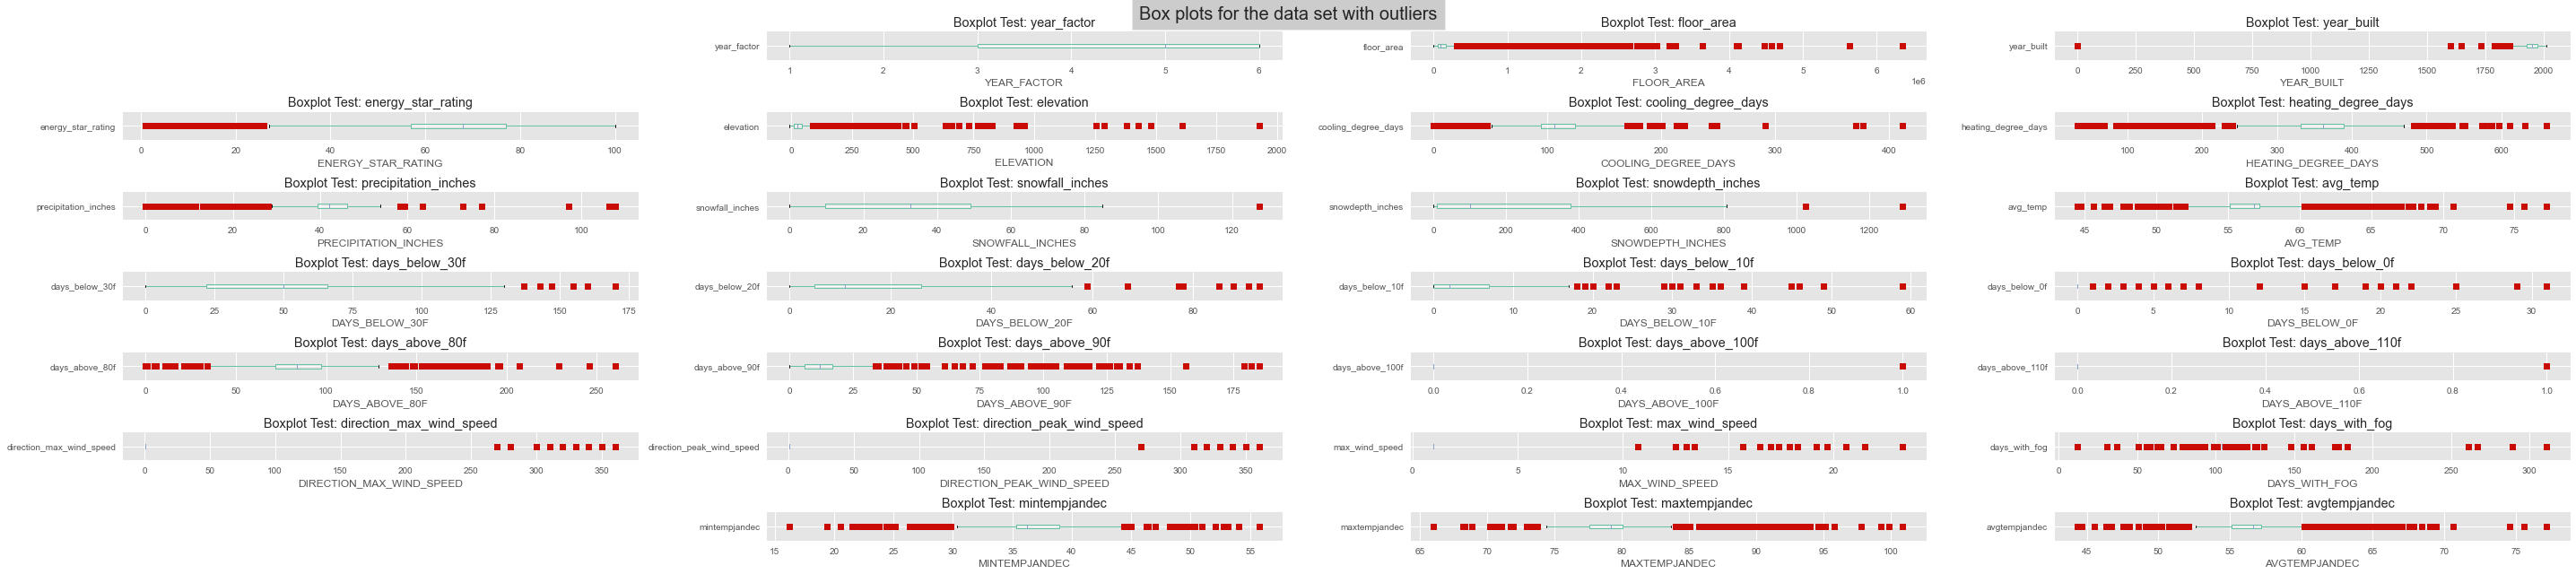

In [80]:
# for data
#for col in df.drop(['id','state_factor', 'building_class', 'facility_type','year_factor'], axis=1):
fig = plt.figure(figsize=(40, 20))
fig.suptitle('Box plots for the data set with outliers',bbox={'facecolor': '0.8', 'pad': 8}, fontsize=20)
for predictor in numcols:
    if predictor not in ['id','site_eui'] :
        ctrain_o = numcols.index(predictor)
        # Adjust the subplot layout parameters
        #fig.subplots_adjust(left=0.1,bottom=0.1,right=1.0,top=1.0,wspace=0.4,hspace=0.4)
        fig.subplots_adjust(left=0.1,bottom=0.1,right=0.9)    
        fig.tight_layout()
        # print(cntss)
        subsc = fig.add_subplot(16,4, ctrain_o+1)
        subsc.set_xlabel(predictor.upper())    
        df[predictor].plot.box(grid=True, layout=(16,4), vert=False, sym='rs')
        subsc.title.set_text('Boxplot Test: ' + str(predictor))

In [81]:
# For removal of outliers from the data 
for c in numcols:
    print(c) 
    if c not in ['id','site_eui'] :
        Q1 = df[c].quantile(0.25)
        Q3 = df[c].quantile(0.75)   
        IQR = Q3-Q1
        upper = Q3+1.5*IQR    
        lower = Q1-1.5*IQR
        print('Percentiles: 25th(Q1)=%.3f, 75th(Q3)=%.3f, IQR=%.3f' % (Q1, Q1, IQR))
        # Identify outliers
        outliers = [x for x in df[c] if x < lower or x > upper]
        print('Identified outliers: %d' % len(outliers))
        #print(trainstay[c])         
        df[c][df[c]>=upper]=upper
        df[c][df[c]<=lower]=lower

id
year_factor
Percentiles: 25th(Q1)=3.000, 75th(Q3)=3.000, IQR=3.000
Identified outliers: 0
floor_area
Percentiles: 25th(Q1)=62500.000, 75th(Q3)=62500.000, IQR=102258.000
Identified outliers: 7976
year_built
Percentiles: 25th(Q1)=1927.000, 75th(Q3)=1927.000, IQR=48.000
Identified outliers: 92
energy_star_rating
Percentiles: 25th(Q1)=57.000, 75th(Q3)=57.000, IQR=20.000
Identified outliers: 7180
elevation
Percentiles: 25th(Q1)=11.900, 75th(Q3)=11.900, IQR=30.800
Identified outliers: 6492
cooling_degree_days
Percentiles: 25th(Q1)=94.000, 75th(Q3)=94.000, IQR=30.083
Identified outliers: 9360
heating_degree_days
Percentiles: 25th(Q1)=331.500, 75th(Q3)=331.500, IQR=57.667
Identified outliers: 6978
precipitation_inches
Percentiles: 25th(Q1)=39.350, 75th(Q3)=39.350, IQR=6.970
Identified outliers: 7063
snowfall_inches
Percentiles: 25th(Q1)=9.600, 75th(Q3)=9.600, IQR=39.500
Identified outliers: 1
snowdepth_inches
Percentiles: 25th(Q1)=10.000, 75th(Q3)=10.000, IQR=367.000
Identified outliers: 2


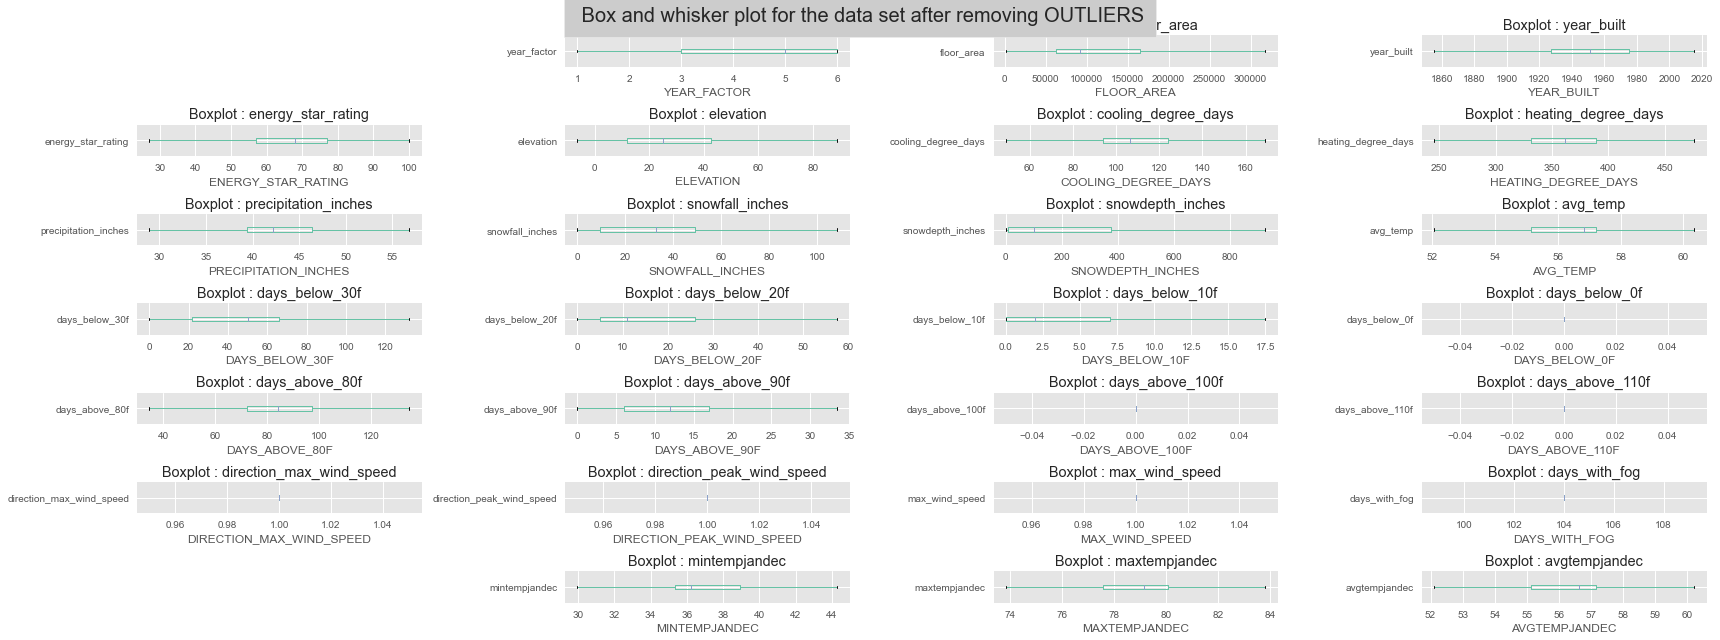

In [82]:
# for train data
fig = plt.figure(figsize=(24, 20))
fig.suptitle(' Box and whisker plot for the data set after removing OUTLIERS', bbox={'facecolor':'0.8', 'pad':12}, fontsize = 20)
for predictor in numcols:
    if predictor not in ['id','site_eui'] :
        ctrain = numcols.index(predictor)    
        #print(cntss)    
        subsc = fig.add_subplot(16,4, ctrain+1) 
        fig.subplots_adjust(left=0.1,bottom=0.1,right=1.2,top=1.2)    
        fig.tight_layout()
        #fig.subplots_adjust(hspace=3.5, wspace=0.5)
        subsc.set_xlabel(predictor.upper())     
        df[predictor].plot.box(grid=True, layout=(16,4), vert = False, sym='rs')
        #plt.show(block=True)
        subsc.title.set_text('Boxplot : '+ str(predictor))  

In [83]:
pd.crosstab(index=df['year_built'], columns=df['facility_type'])

facility_type  2to4_Unit_Building  5plus_Unit_Building  Commercial_Other  \
year_built                                                                 
1855.0                          0                    0                 2   
1857.0                          0                    0                 0   
1859.0                          0                    0                 0   
1860.0                          0                    0                 0   
1862.0                          0                    0                 0   
...                           ...                  ...               ...   
2011.0                          6                   14                 1   
2012.0                         12                   38                 5   
2013.0                         22                   47                 2   
2014.0                         14                   79                 7   
2015.0                          6                   19                 3   

facility_type  Commercial_Unknown  Data_Center  \
year_built                                       
1855.0                          0            0   
1857.0                          0            0   
1859.0                          0            0   
1860.0                          0            0   
1862.0                          0            0   
...                           ...          ...   
2011.0                          0            0   
2012.0                          0            0   
2013.0                          2            0   
2014.0                          0            0   
2015.0                          0            0   

facility_type  Education_College_or_university  Education_Other_classroom  \
year_built                                                                  
1855.0                                       7                          6   
1857.0                                       6                          0   
1859.0                                       0                          0   
1860.0                                       0                          1   
1862.0                                       0                          0   
...                                        ...                        ...   
2011.0                                      20                         25   
2012.0                                       9                         23   
2013.0                                       8                         33   
2014.0                                       5                         22   
2015.0                                       1                         13   

facility_type  Education_Preschool_or_daycare  Education_Uncategorized  \
year_built                                                               
1855.0                                      0                        0   
1857.0                                      0                        0   
1859.0                                      0                        0   
1860.0                                      0                        0   
1862.0                                      0                        0   
...                                       ...                      ...   
2011.0                                      0                        0   
2012.0                                      0                        0   
2013.0                                      0                        0   
2014.0                                      1                        0   
2015.0                                      0                        0   

facility_type  Food_Sales  Food_Service_Other  \
year_built                                      
1855.0                  0                   0   
1857.0                  0                   0   
1859.0                  0                   0   
1860.0                  0                   0   
1862.0                  0                   0   
...                   ...                 ...   
201

In [84]:
df.shape

(73498, 31)

In [85]:
dftest.shape

(9705, 30)

<AxesSubplot:>

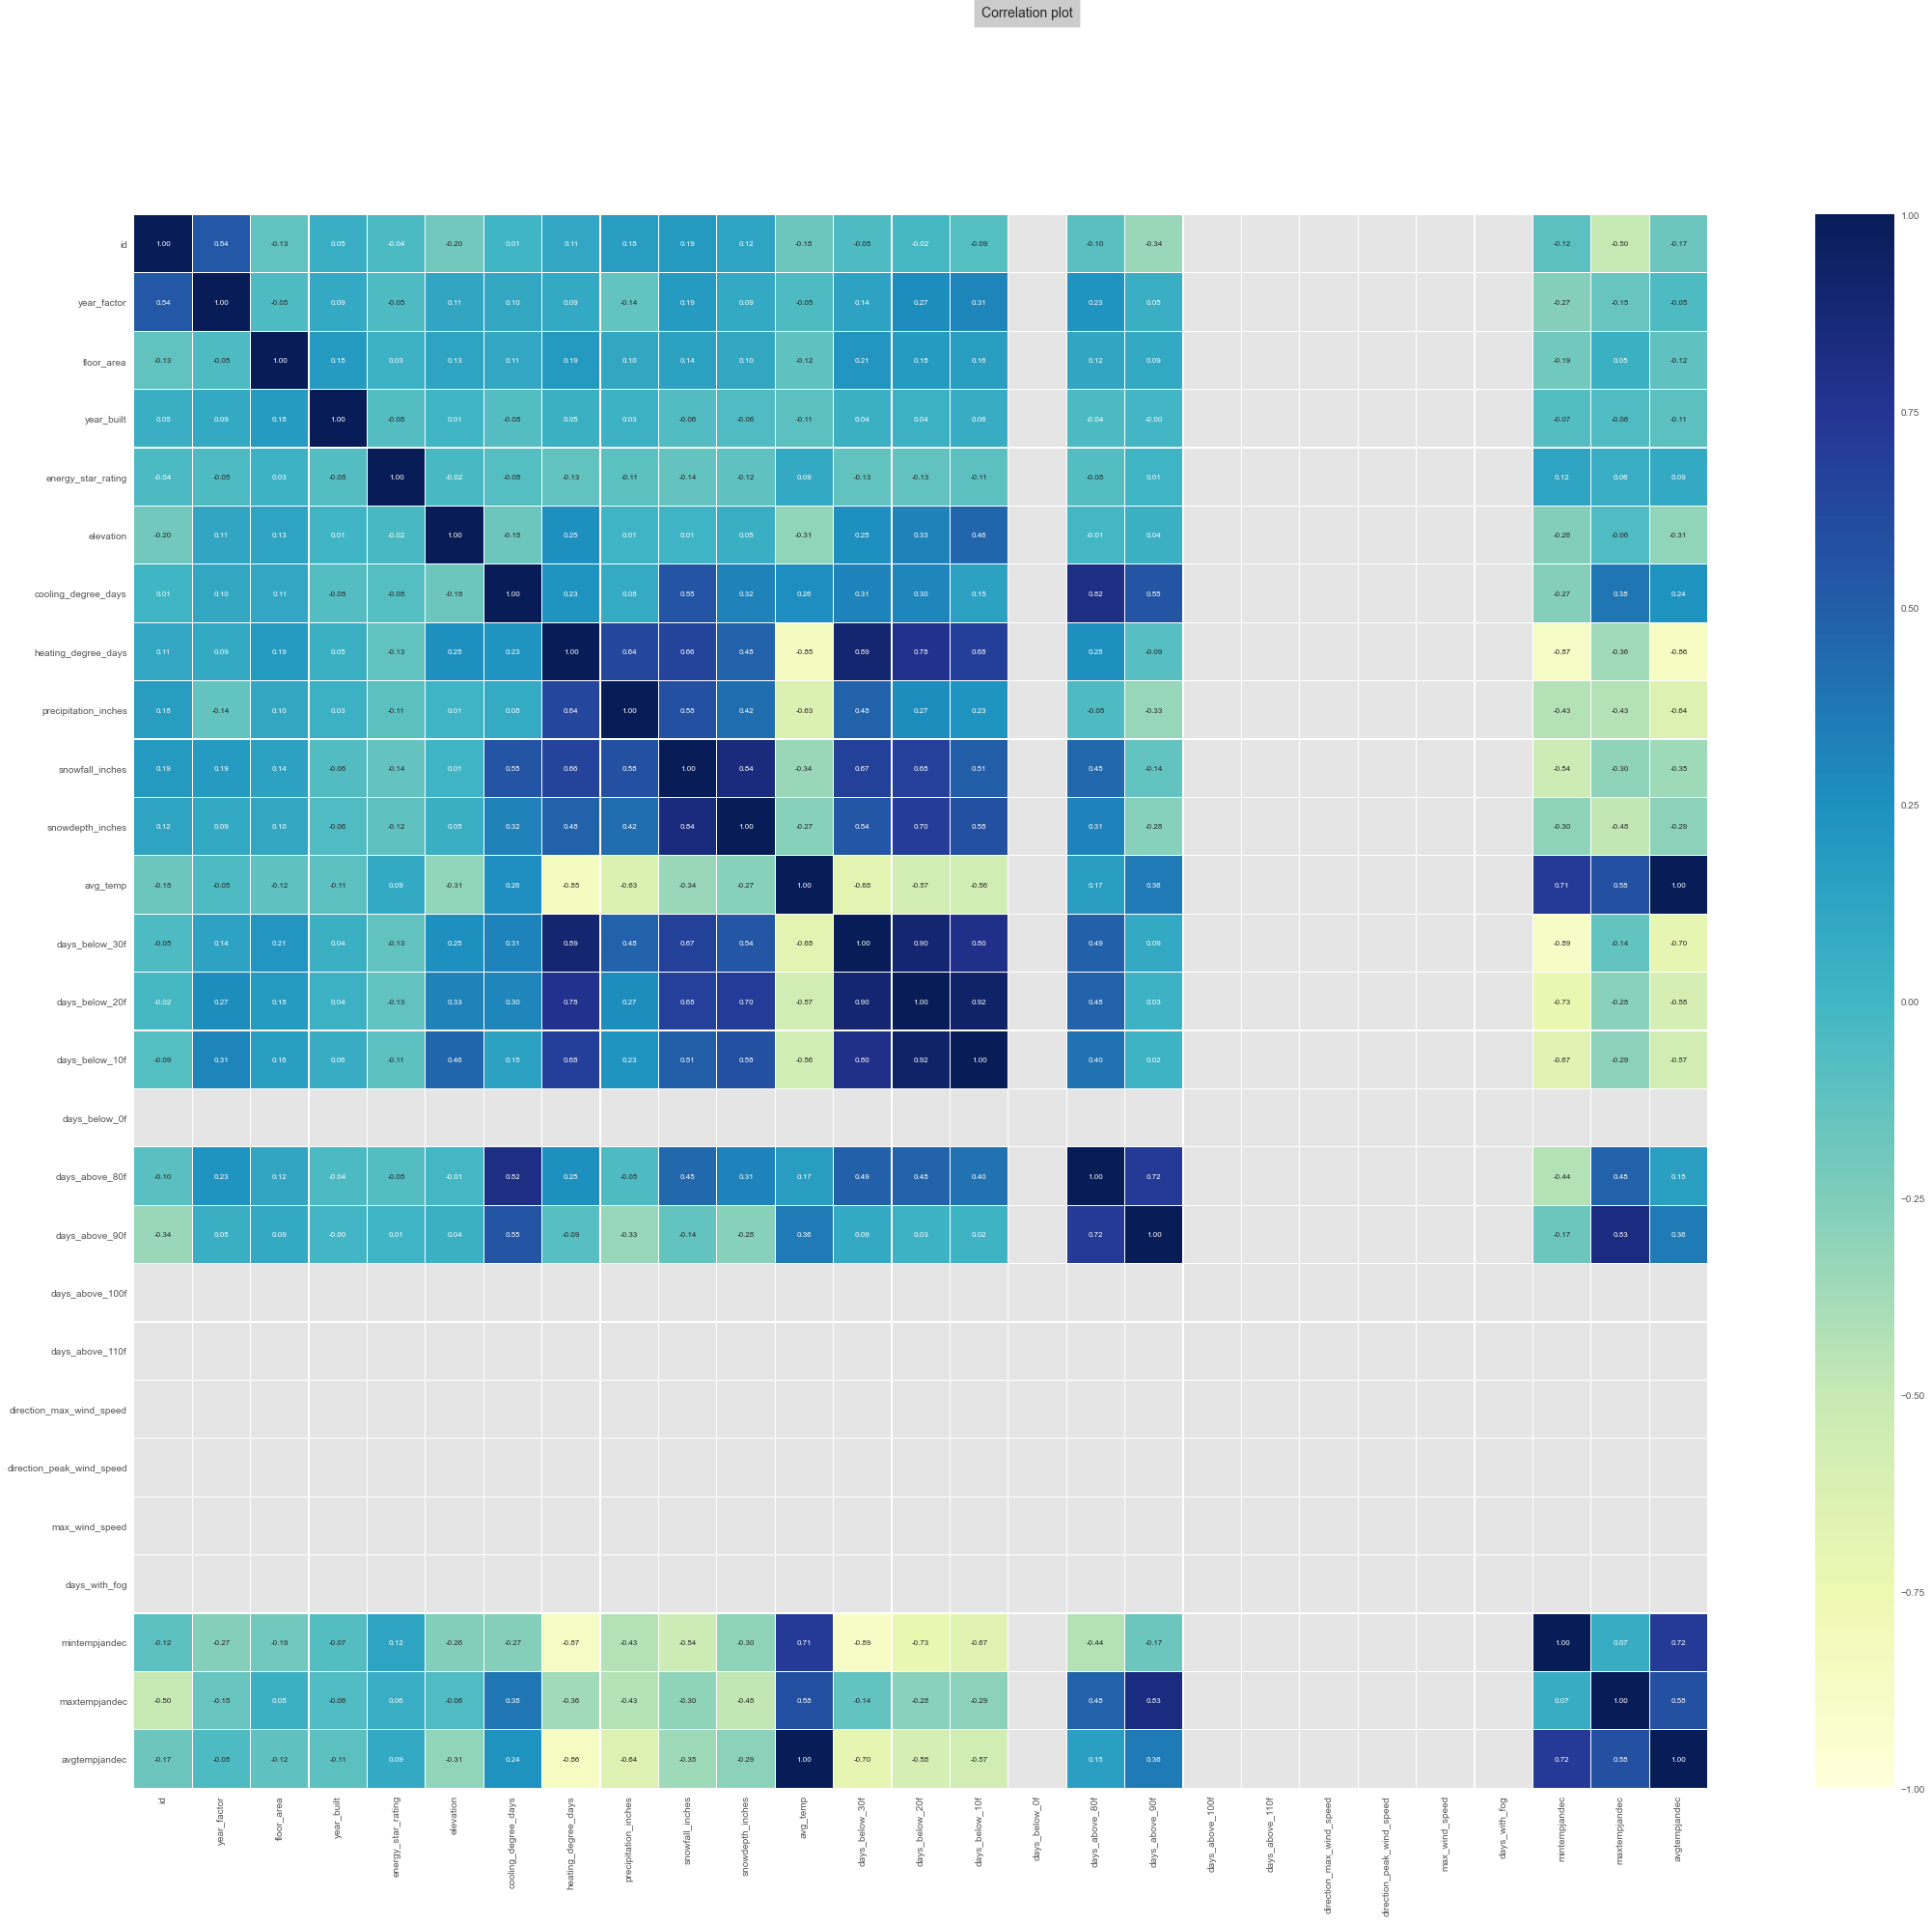

In [86]:
fig = plt.figure(figsize=(40,30))
plt.suptitle('Correlation plot',bbox={'facecolor': '0.8', 'pad': 8}, fontsize=14)
corr = df.drop('site_eui', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu',
#sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], annot=True, cmap='RdYlGn',
            vmax=1.0, vmin=-1.0, center=0, linewidth=0.1, annot_kws={'size': 8}, square=True, fmt='.2f',)

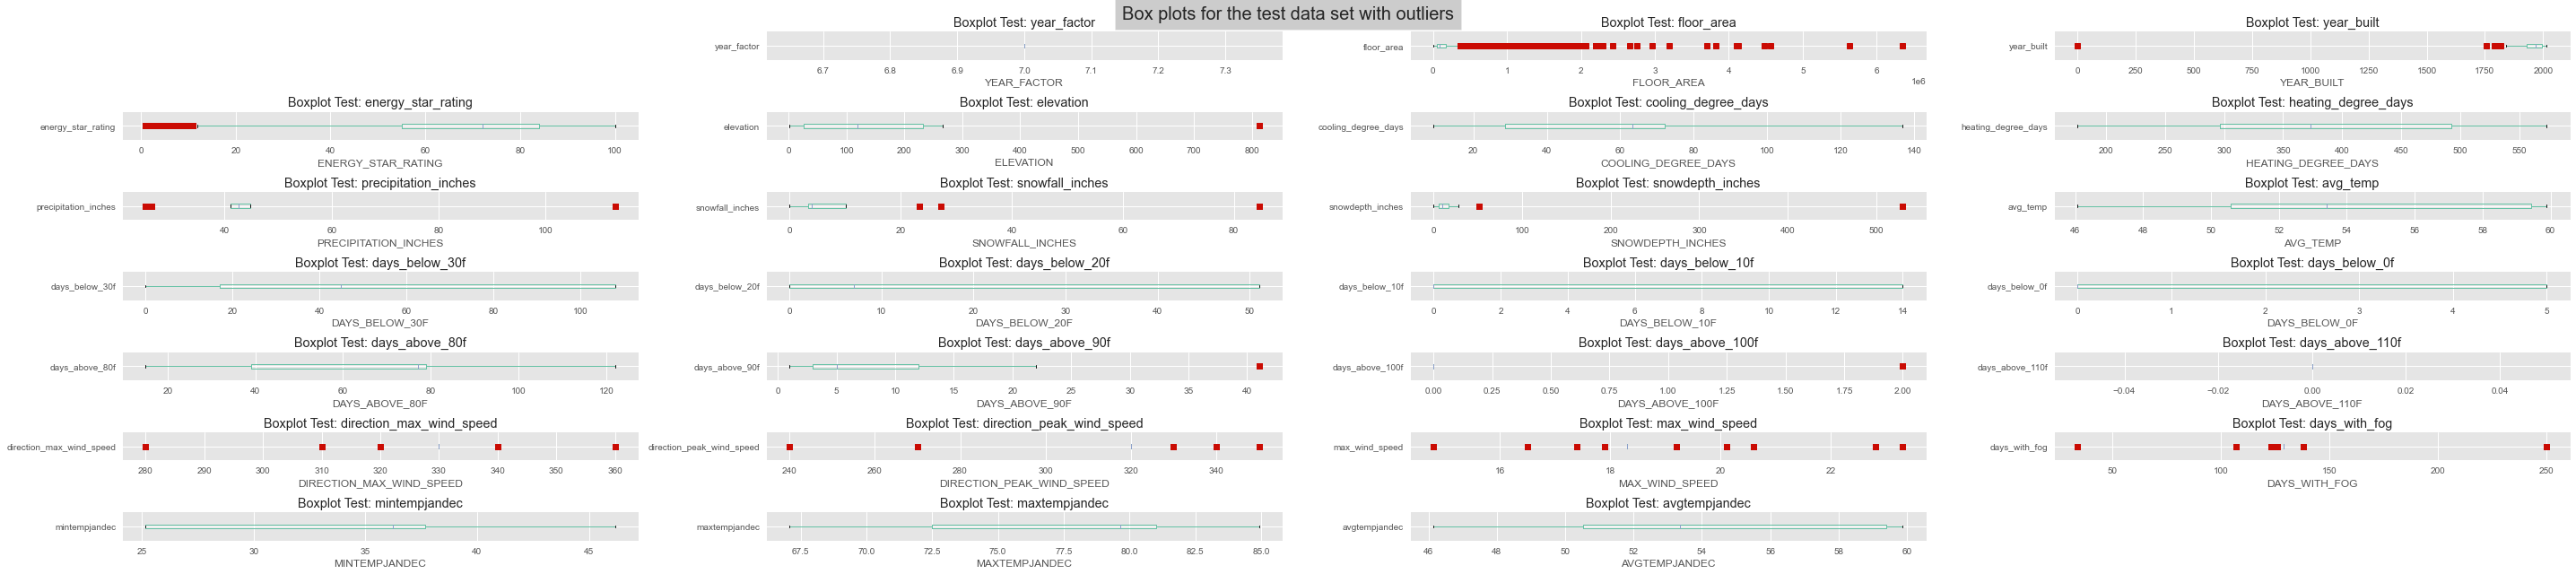

In [87]:
# for testing data
fig = plt.figure(figsize=(40, 20))
fig.suptitle('Box plots for the test data set with outliers',bbox={'facecolor': '0.8', 'pad': 8}, fontsize=20)
for testor in numcolstest : 
    if testor not in ['id'] :
        ctrain_o = numcolstest.index(testor)
        fig.subplots_adjust(left=0.1,bottom=0.1,right=0.9)    
        fig.tight_layout()
        # print(cntss)
        subsc = fig.add_subplot(16,4, ctrain_o+1)
        subsc.set_xlabel(testor.upper())    
        dftest[testor].plot.box(grid=True, layout=(16,4), vert=False, sym='rs')
        subsc.title.set_text('Boxplot Test: ' + str(testor))

In [88]:
# For removal of outliers from the test data 
for ctest in numcolstest:
    print(ctest)    
    if ctest not in ['id'] :
        Q1 = dftest[ctest].quantile(0.25)
        Q3 = dftest[ctest].quantile(0.75)   
        IQR = Q3-Q1
        upper = Q3+1.5*IQR    
        lower = Q1-1.5*IQR
        print('Percentiles: 25th(Q1)=%.3f, 75th(Q3)=%.3f, IQR=%.3f' % (Q1, Q1, IQR))
        # Identify outliers
        outliers = [x for x in dftest[ctest] if x < lower or x > upper]
        print('Identified outliers: %d' % len(outliers))        
        dftest[ctest][dftest[ctest]>=upper]=upper
        dftest[ctest][dftest[ctest]<=lower]=lower

id
year_factor
Percentiles: 25th(Q1)=7.000, 75th(Q3)=7.000, IQR=0.000
Identified outliers: 0
floor_area
Percentiles: 25th(Q1)=48020.000, 75th(Q3)=48020.000, IQR=129500.000
Identified outliers: 913
year_built
Percentiles: 25th(Q1)=1929.000, 75th(Q3)=1929.000, IQR=65.000
Identified outliers: 7
energy_star_rating
Percentiles: 25th(Q1)=55.000, 75th(Q3)=55.000, IQR=29.000
Identified outliers: 450
elevation
Percentiles: 25th(Q1)=26.500, 75th(Q3)=26.500, IQR=204.800
Identified outliers: 1428
cooling_degree_days
Percentiles: 25th(Q1)=28.750, 75th(Q3)=28.750, IQR=43.417
Identified outliers: 0
heating_degree_days
Percentiles: 25th(Q1)=296.250, 75th(Q3)=296.250, IQR=196.000
Identified outliers: 0
precipitation_inches
Percentiles: 25th(Q1)=41.060, 75th(Q3)=41.060, IQR=3.770
Identified outliers: 1063
snowfall_inches
Percentiles: 25th(Q1)=3.400, 75th(Q3)=3.400, IQR=6.800
Identified outliers: 1355
snowdepth_inches
Percentiles: 25th(Q1)=6.000, 75th(Q3)=6.000, IQR=11.000
Identified outliers: 1270
avg_t

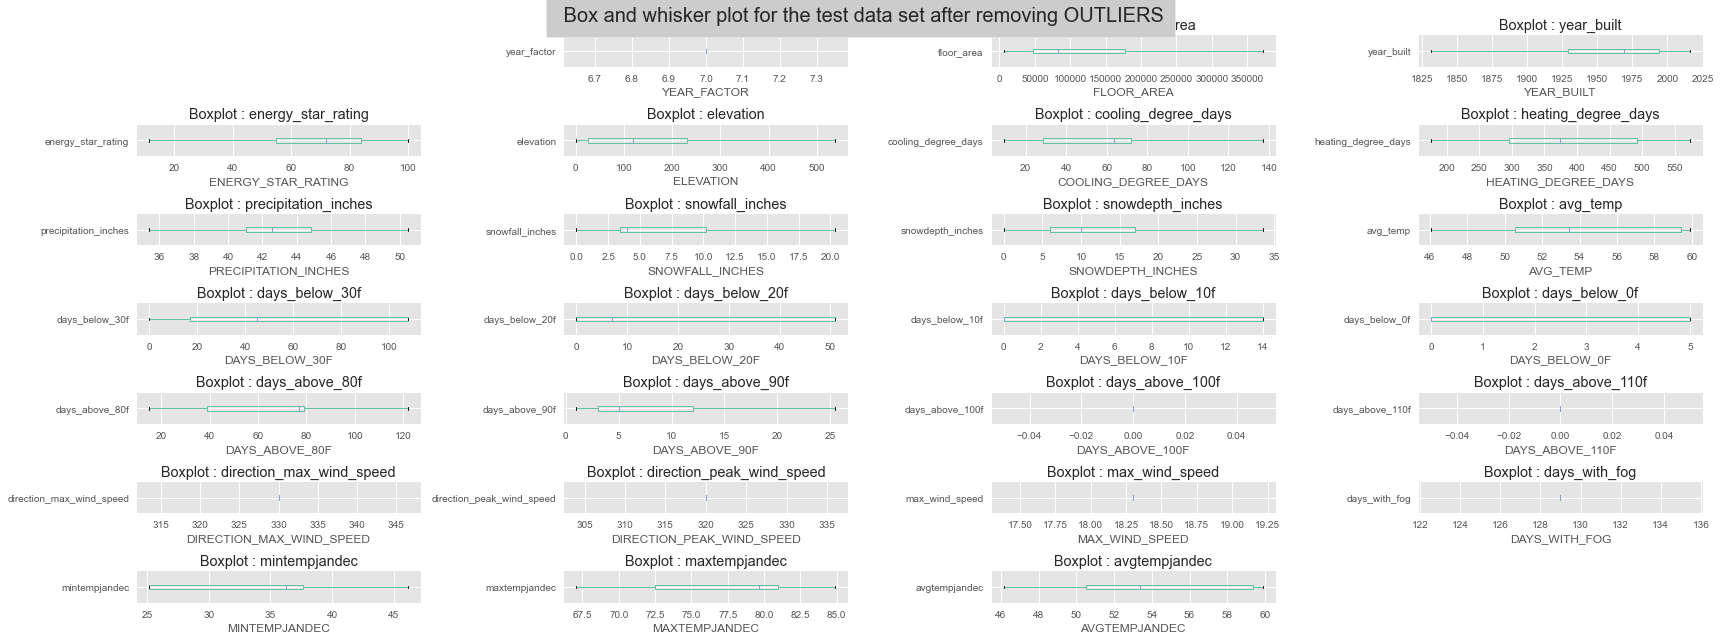

In [89]:
# for test data
fig = plt.figure(figsize=(24, 20))
fig.suptitle(' Box and whisker plot for the test data set after removing OUTLIERS', bbox={'facecolor':'0.8', 'pad':12}, fontsize = 20)
for testor in numcolstest:
    if testor not in ['id']:
        ctrain = numcolstest.index(testor)    
        #print(cntss)    
        subsc = fig.add_subplot(16,4, ctrain+1) 
        fig.subplots_adjust(left=0.1,bottom=0.1,right=1.2,top=1.2)    
        fig.tight_layout()
        #fig.subplots_adjust(hspace=3.5, wspace=0.5)
        subsc.set_xlabel(testor.upper())     
        dftest[testor].plot.box(grid=True, layout=(16,4), vert = False, sym='rs')
        #plt.show(block=True)
        subsc.title.set_text('Boxplot : '+ str(testor))  

In [90]:
dftest.shape

(9705, 30)

In [92]:
numeric_df = df[numcols]

In [93]:
# fOR TRAINING DATAA
numdfcorr = pd.DataFrame(numeric_df.corr()['site_eui'])
abs(numdfcorr).sort_values(by='site_eui', ascending=False).T.style.background_gradient(cmap='viridis')

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

**NOTE**:  

- Exploratory Data Analysis will explore all the features and their relationship with other features
- Both non-graphical and graphical method will be used as applicable to respective features
- Both univariate and bivariate method be used as applicable to respective features

### **Univariate analysis**
#### **Understanding feature wise statistics**

**Q: What is the breakdown of Facility type ?**

In [59]:
# value_counts as dataframe
df['facility_type'].value_counts()[:10].index.tolist()

['Multifamily_Uncategorized',
 'Office_Uncategorized',
 'Education_Other_classroom',
 'Lodging_Hotel',
 '2to4_Unit_Building',
 'Commercial_Other',
 '5plus_Unit_Building',
 'Warehouse_Nonrefrigerated',
 'Retail_Uncategorized',
 'Education_College_or_university']

facility_type
Multifamily_Uncategorized          39111
Office_Uncategorized               12248
Education_Other_classroom           3843
Lodging_Hotel                       2020
2to4_Unit_Building                  1893
Commercial_Other                    1587
5plus_Unit_Building                 1273
Warehouse_Nonrefrigerated           1242
Retail_Uncategorized                1080
Education_College_or_university      965
dtype: int64


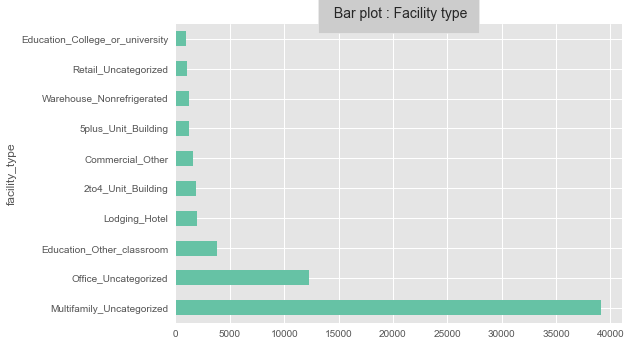

In [99]:
facility_types = df.groupby('facility_type').size().sort_values(ascending=False)
#plot barchart
plt.title(' Bar plot : Facility type', bbox={'facecolor':'0.8', 'pad':12}, fontsize = 14)
facility_types.head(10).plot.barh()
#print raw numbers
print(facility_types.head(10))

Text(0.5, 0.98, 'Dist plot : SiteEUI')

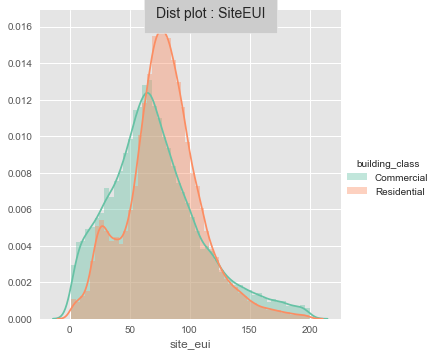

In [101]:
sns.FacetGrid(df, hue = 'building_class', size = 5).map(sns.distplot,'site_eui').add_legend()
plt.suptitle('Dist plot : SiteEUI', bbox={'facecolor':'0.8', 'pad':12}, fontsize = 14)

Text(0.5, 0.98, "Histogram for ['id', 'year_factor', 'floor_area', 'year_built', 'energy_star_rating', 'elevation', 'cooling_degree_days', 'heating_degree_days', 'precipitation_inches', 'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30f', 'days_below_20f', 'days_below_10f', 'days_below_0f', 'days_above_80f', 'days_above_90f', 'days_above_100f', 'days_above_110f', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog', 'site_eui', 'mintempjandec', 'maxtempjandec', 'avgtempjandec']")

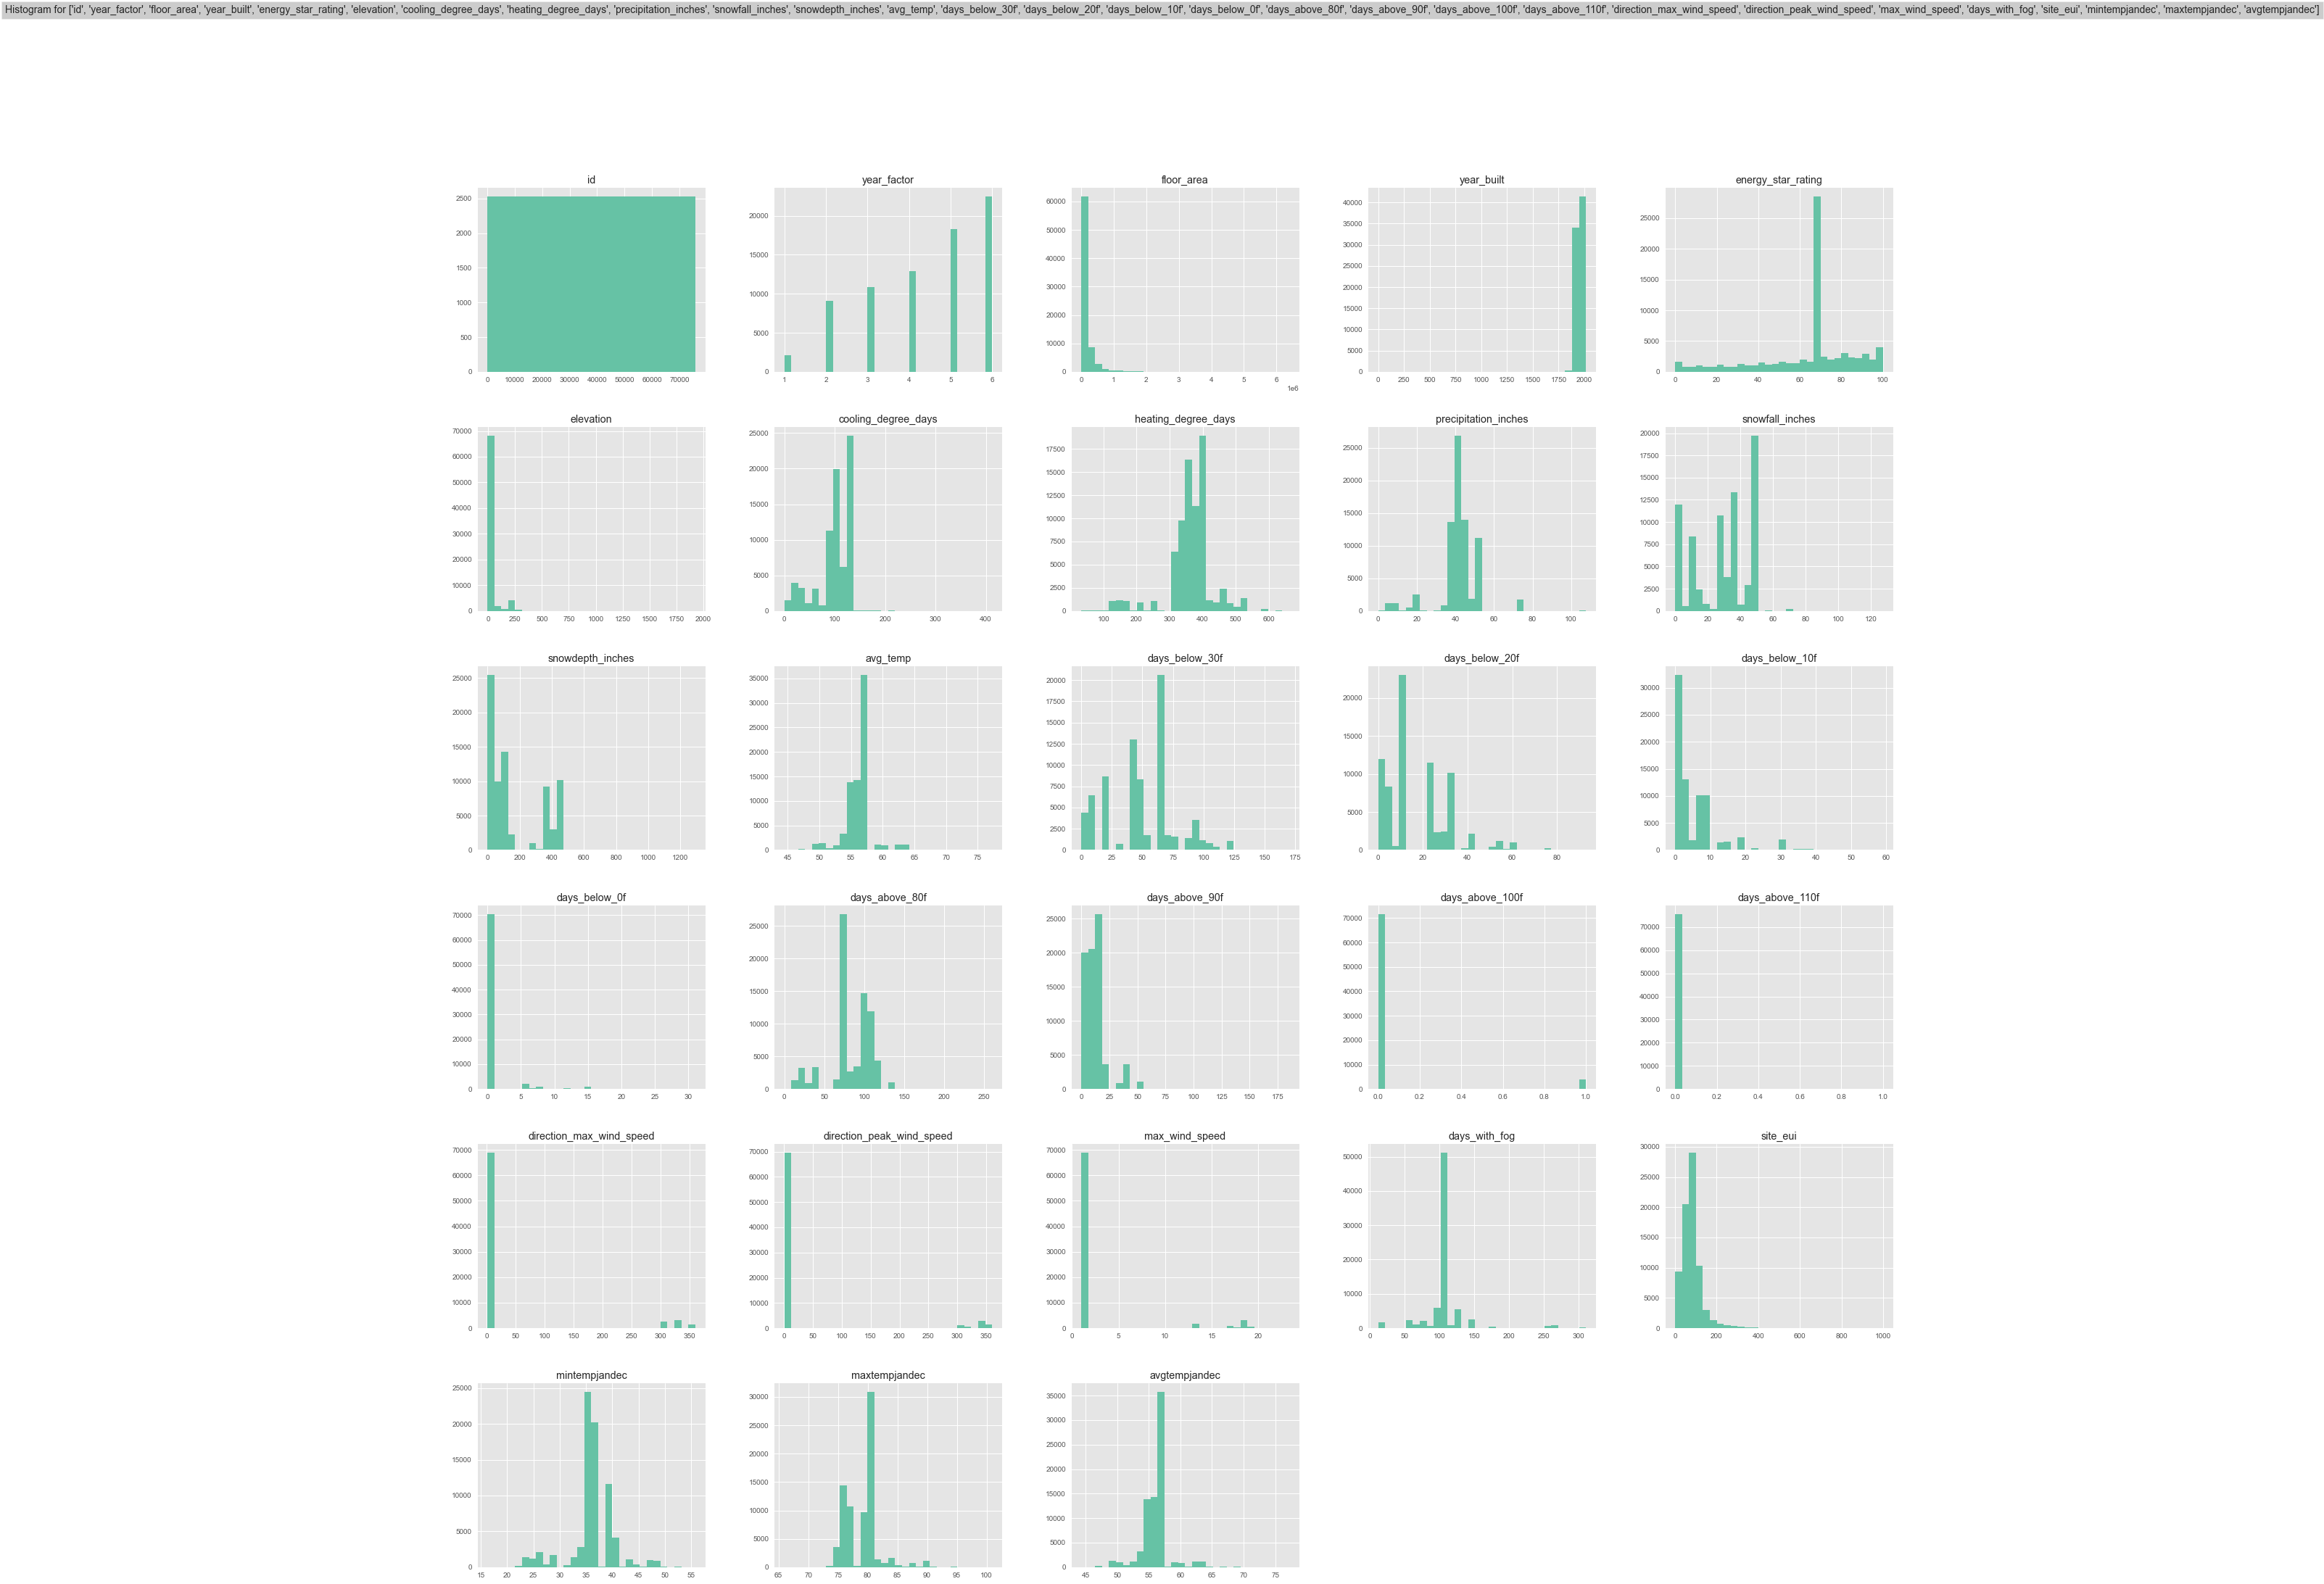

In [103]:
# plotting the histogram
df.hist(figsize=(35,35), grid=True, layout=(6,5), bins = 30)
plt.suptitle("Histogram for "+ str(numcols), bbox={'facecolor':'0.8', 'pad':5}, fontsize = 14)

Q: What is the distribution of numerical columns ?

**Question : What is the distribution of snowdepth ?**

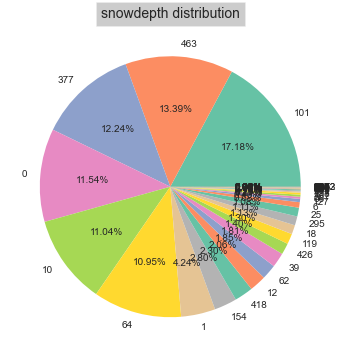

In [94]:
plt.figure(figsize=(6,6))
plt.title('snowdepth distribution', bbox={'facecolor':'0.8', 'pad':5},fontsize = 14)
plt.pie(x=df['snowdepth_inches'].value_counts().values,
        labels=df['snowdepth_inches'].value_counts().index, autopct='%2.2f%%')
plt.show()

### **Bivariate Analysis**

In [142]:
year_decade = df.groupby((df.year_built//10)*10).sum()[['year_built','energy_star_rating','site_eui', 'mintempjandec',
       'maxtempjandec']]
year_decade

year_built  energy_star_rating    site_eui  mintempjandec  \
year_built                                                              
1850.0        187375.0              6562.0     8017.77    3566.291667   
1860.0         95134.0              3474.0     4525.11    1705.833333   
1870.0        155534.0              5299.0     6985.86    2795.708333   
1880.0        348667.0             11916.0    14004.18    6263.125000   
1890.0       1043911.0             36686.0    40427.10   18918.875000   
1900.0       8132688.0            290405.0   300228.69  159411.708333   
1910.0       8948607.0            319533.0   328007.31  171610.458333   
1920.0      26670703.0            920877.0  1080753.22  503485.458333   
1930.0      13933986.0            479570.0   564817.58  260699.958333   
1940.0       6980490.0            240476.0   276105.05  130734.458333   
1950.0      16242905.0            552180.0   618389.62  305181.833333   
1960.0      17322244.0            559994.0   711933.52  318195.708333   
1970.0       9318547.0            293200.0   375915.84  169633.250000   
1980.0      10547056.0            346146.0   378982.82  193490.500000   
1990.0       6250637.0            198577.0   231782.42  112865.791667   
2000.0      13668250.0            420541.0   495206.48  243411.250000   
2010.0       3635714.0            123586.0   112755.26   64101.500000   

            maxtempjandec  
year_built                 
1850.0       8.020917e+03  
1860.0       4.054083e+03  
1870.0       6.562167e+03  
1880.0       1.460592e+04  
1890.0       4.353158e+04  
1900.0       3.387944e+05  
1910.0       3.695477e+05  
1920.0       1.092523e+06  
1930.0       5.680907e+05  
1940.0       2.839064e+05  
1950.0       6.591177e+05  
1960.0       6.948751e+05  
1970.0       3.724836e+05  
1980.0       4.189640e+05  
1990.0       2.456438e+05  
2000.0       5.363031e+05  
2010.0       1.420904e+05

Text(0.5, 1.0, 'Bar plot decade wise')

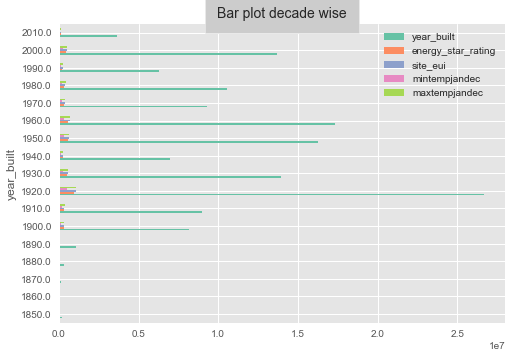

In [143]:
year_decade.plot(kind='barh')
plt.title('Bar plot decade wise', bbox={'facecolor':'0.8', 'pad':12}, fontsize = 14)

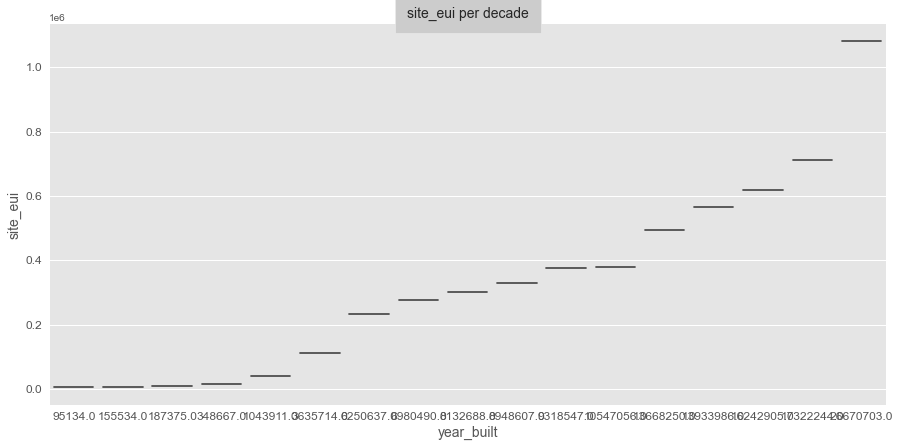

In [154]:
figure = plt.figure(figsize=[15, 7])
sns.violinplot(x='year_built', y= 'site_eui', palette='rainbow', data=year_decade)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='year_built', size=14)
plt.ylabel(ylabel='site_eui', size=14)
#plt.title(label='site_eui per year', size=16)
plt.title('site_eui per decade', bbox={'facecolor':'0.8', 'pad':12}, fontsize = 14)
plt.show()

In [122]:
out_year = pd.pivot_table(df, values=['site_eui','year_factor', 'state_factor','elevation','energy_star_rating'], index = ['year_built'], aggfunc=np.mean)
out_year

elevation  energy_star_rating    site_eui  year_factor
year_built                                                        
1855.0      24.044565           64.673913   77.508478     4.358696
1857.0      41.375000           68.000000   90.480000     4.000000
1859.0       3.400000           68.000000  163.150000     6.000000
1860.0      36.350000           68.500000   65.973333     4.833333
1862.0       3.400000           68.000000  134.330000     6.000000
...               ...                 ...         ...          ...
2011.0      31.971004           68.312268   61.772528     4.899628
2012.0      31.465089           68.680473   63.119320     5.189349
2013.0      32.684298           68.776860   62.103085     5.484848
2014.0      31.829811           73.298113   51.323094     5.649057
2015.0      38.552727           73.345455   53.566455     6.000000

[156 rows x 4 columns]

<AxesSubplot:xlabel='year_built'>

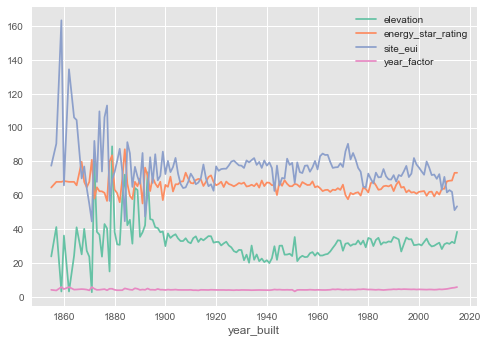

In [123]:
out_year.plot()

In [69]:
df.columns

Index(['id', 'year_factor', 'state_factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'elevation',
       'cooling_degree_days', 'heating_degree_days', 'precipitation_inches',
       'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30f',
       'days_below_20f', 'days_below_10f', 'days_below_0f', 'days_above_80f',
       'days_above_90f', 'days_above_100f', 'days_above_110f',
       'direction_max_wind_speed', 'direction_peak_wind_speed',
       'max_wind_speed', 'days_with_fog', 'site_eui', 'mintempjandec',
       'maxtempjandec', 'avgtempjandec'],
      dtype='object')

Text(0.5, 1.0, 'site_eui per days_above_80f')

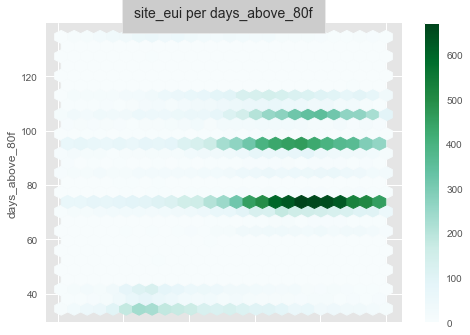

In [135]:
df[df['site_eui'] < 100].sample(30000).plot.hexbin(x='site_eui', y='days_above_80f', gridsize = 25)
plt.title('site_eui per days_above_80f', bbox={'facecolor':'0.8', 'pad':12}, fontsize = 14)

Text(0.5, 1.0, 'site_eui per days_above_80f')

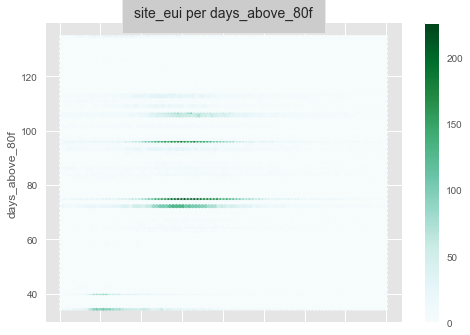

In [136]:
df[df['site_eui'] < 300].sample(30000).plot.hexbin(x='site_eui', y='days_above_80f',)
plt.title('site_eui per days_above_80f', bbox={'facecolor':'0.8', 'pad':12}, fontsize = 14)

Q: What is the distribution of energy_star_rating wrt year built ?

Text(0.5, 1.0, 'Relationship between energy_star_rating and year_built')

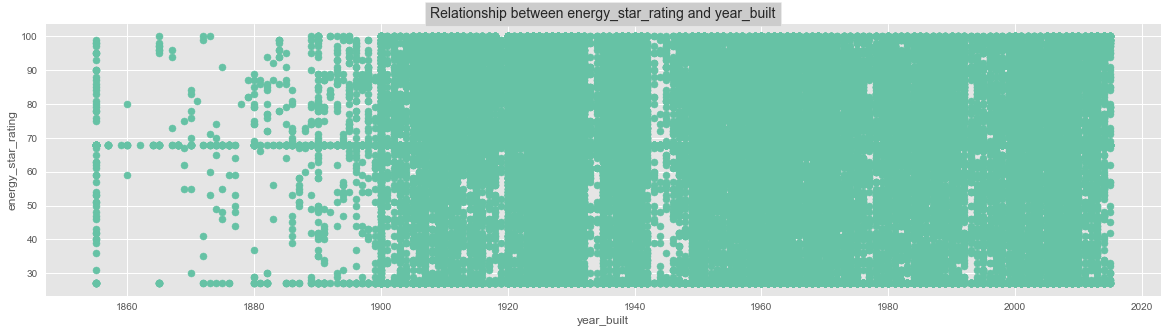

In [137]:
plt.figure(figsize=(20,5))
plt.scatter(y=df.energy_star_rating, x=df['year_built'])
plt.ylabel('energy_star_rating')
plt.xlabel('year_built')
plt.title('Relationship between energy_star_rating and year_built', bbox={'facecolor':'0.8', 'pad':5},fontsize = 14)

Q: What is the distribution of energy_star_rating wrt building class ?

Text(0.5, 1.0, 'Relationship between energy_star_rating and building_class')

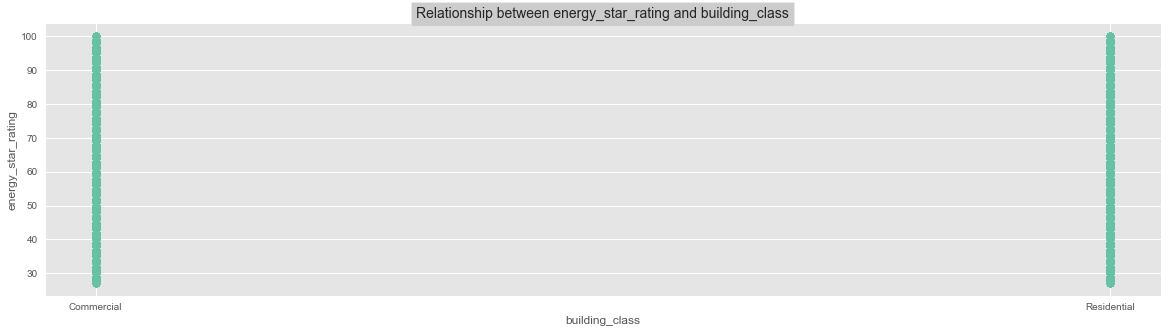

In [138]:
plt.figure(figsize=(20,5))
plt.scatter(y=df.energy_star_rating, x=df['building_class'])
plt.ylabel('energy_star_rating')
plt.xlabel('building_class')
plt.title('Relationship between energy_star_rating and building_class', bbox={'facecolor':'0.8', 'pad':5},fontsize = 14)

**Q: What is the distribution of facility type and year built wrt building class ?**

In [139]:
agg_func_custom_count = {    
    'building_class': ['count', set]
}
df.groupby(['building_class','year_built','facility_type']).agg(agg_func_custom_count)

building_class  \
                                                                        count   
building_class year_built facility_type                                         
Commercial     1855.0     Commercial_Other                                  2   
                          Education_College_or_university                   7   
                          Education_Other_classroom                         6   
                          Health_Care_Outpatient_Uncategorized              3   
                          Lodging_Hotel                                    13   
...                                                                       ...   
Residential    2014.0     Multifamily_Uncategorized                        70   
               2015.0     2to4_Unit_Building                                6   
                          5plus_Unit_Building                              19   
                          Mixed_Use_Commercial_and_Residential              1   
                          Multifamily_Uncategorized                        42   

                                                                               
                                                                          set  
building_class year_built facility_type                                        
Commercial     1855.0     Commercial_Other                       {Commercial}  
                          Education_College_or_university        {Commercial}  
                          Education_Other_classroom              {Commercial}  
                          Health_Care_Outpatient_Uncategorized   {Commercial}  
                          Lodging_Hotel                          {Commercial}  
...                                                                       ...  
Residential    2014.0     Multifamily_Uncategorized             {Residential}  
               2015.0     2to4_Unit_Building                    {Residential}  
                          5plus_Unit_Building                   {Residential}  
                          Mixed_Use_Commercial_and_Residential  {Residential}  
                          Multifamily_Uncategorized             {Residential}  

[2836 rows x 2 columns]

**Question: What is the distribution of building year and energy rating ?**

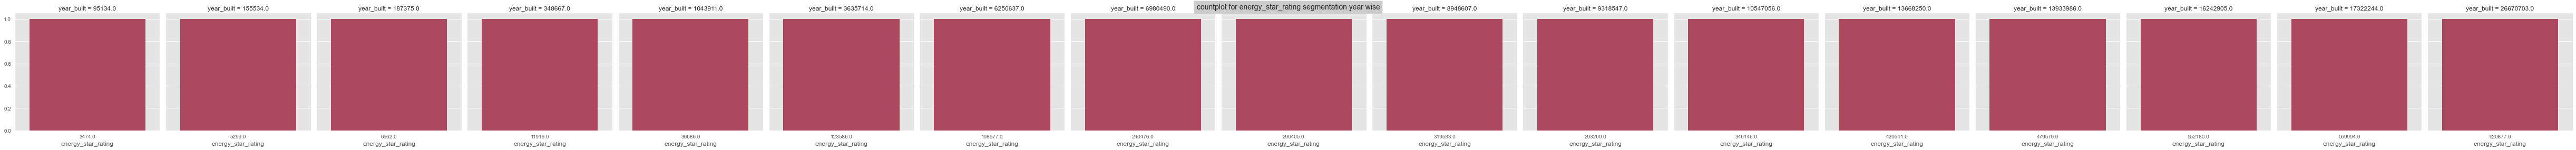

In [145]:
# creating a facet grid
grid = sns.FacetGrid(data=year_decade, col='year_built', height=4, aspect=1,sharex=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'energy_star_rating', palette='inferno')
plt.suptitle("countplot for energy_star_rating segmentation year wise", bbox={'facecolor':'0.8', 'pad':5}, fontsize = 14)
plt.show()

**Q: What is the relationship between elevation and building class ?**

<AxesSubplot:xlabel='elevation', ylabel='building_class'>

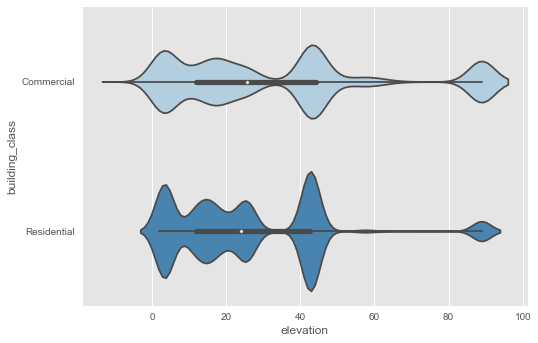

In [146]:
#pd.crosstab(index=df['elevation'], columns=df['building_class']).sort_values(by='elevation', ascending=False).plot(kind='barh')
sns.violinplot(x=df["elevation"], y=df["building_class"], palette="Blues")

**Q: What is the breakdown of site eui by buiding class?**

In [147]:
df['site_eui'].groupby(df['building_class']).value_counts().sort_values(ascending=False)

building_class  site_eui
Residential     79.78       37
                75.09       36
                76.79       34
                76.89       34
                69.91       33
                            ..
Commercial      190.58       1
                190.60       1
                190.63       1
                190.65       1
Residential     199.84       1
Name: site_eui, Length: 24275, dtype: int64

In [148]:
df.shape

(73498, 31)

In [149]:
dftest.shape

(9705, 30)

In [155]:
# Get list of categorical variables,date  and numerical variables for the data set
fcatcol=[col for col in df.columns if df[col].dtype == "object"]
print("Categorical cols of dataset = ", fcatcol, ". No of categorical features = ", len(fcatcol))
print()
fdatecol=[col for col in df.columns if df[col].dtype == "datetime64[ns]"]
print("DateTime cols of dataset = ", fdatecol, ". No of datetime features = ", len(fdatecol))
print()
fnumcol = [col for col in df.columns if (df[col].dtype != "object") & (df[col].dtype != "datetime64[ns]")]
print("Numerical cols of dataset = ", fnumcol, ". No of numerical features = ", len(fnumcol))

Categorical cols of dataset =  ['state_factor', 'building_class', 'facility_type'] . No of categorical features =  3

DateTime cols of dataset =  [] . No of datetime features =  0

Numerical cols of dataset =  ['id', 'year_factor', 'floor_area', 'year_built', 'energy_star_rating', 'elevation', 'cooling_degree_days', 'heating_degree_days', 'precipitation_inches', 'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30f', 'days_below_20f', 'days_below_10f', 'days_below_0f', 'days_above_80f', 'days_above_90f', 'days_above_100f', 'days_above_110f', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog', 'site_eui', 'mintempjandec', 'maxtempjandec', 'avgtempjandec'] . No of numerical features =  28


Text(0.5, 0.98, "Histogram Plot['id', 'year_factor', 'floor_area', 'year_built', 'energy_star_rating', 'elevation', 'cooling_degree_days', 'heating_degree_days', 'precipitation_inches', 'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30f', 'days_below_20f', 'days_below_10f', 'days_below_0f', 'days_above_80f', 'days_above_90f', 'days_above_100f', 'days_above_110f', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog', 'site_eui', 'mintempjandec', 'maxtempjandec', 'avgtempjandec']")

<Figure size 3600x3600 with 0 Axes>

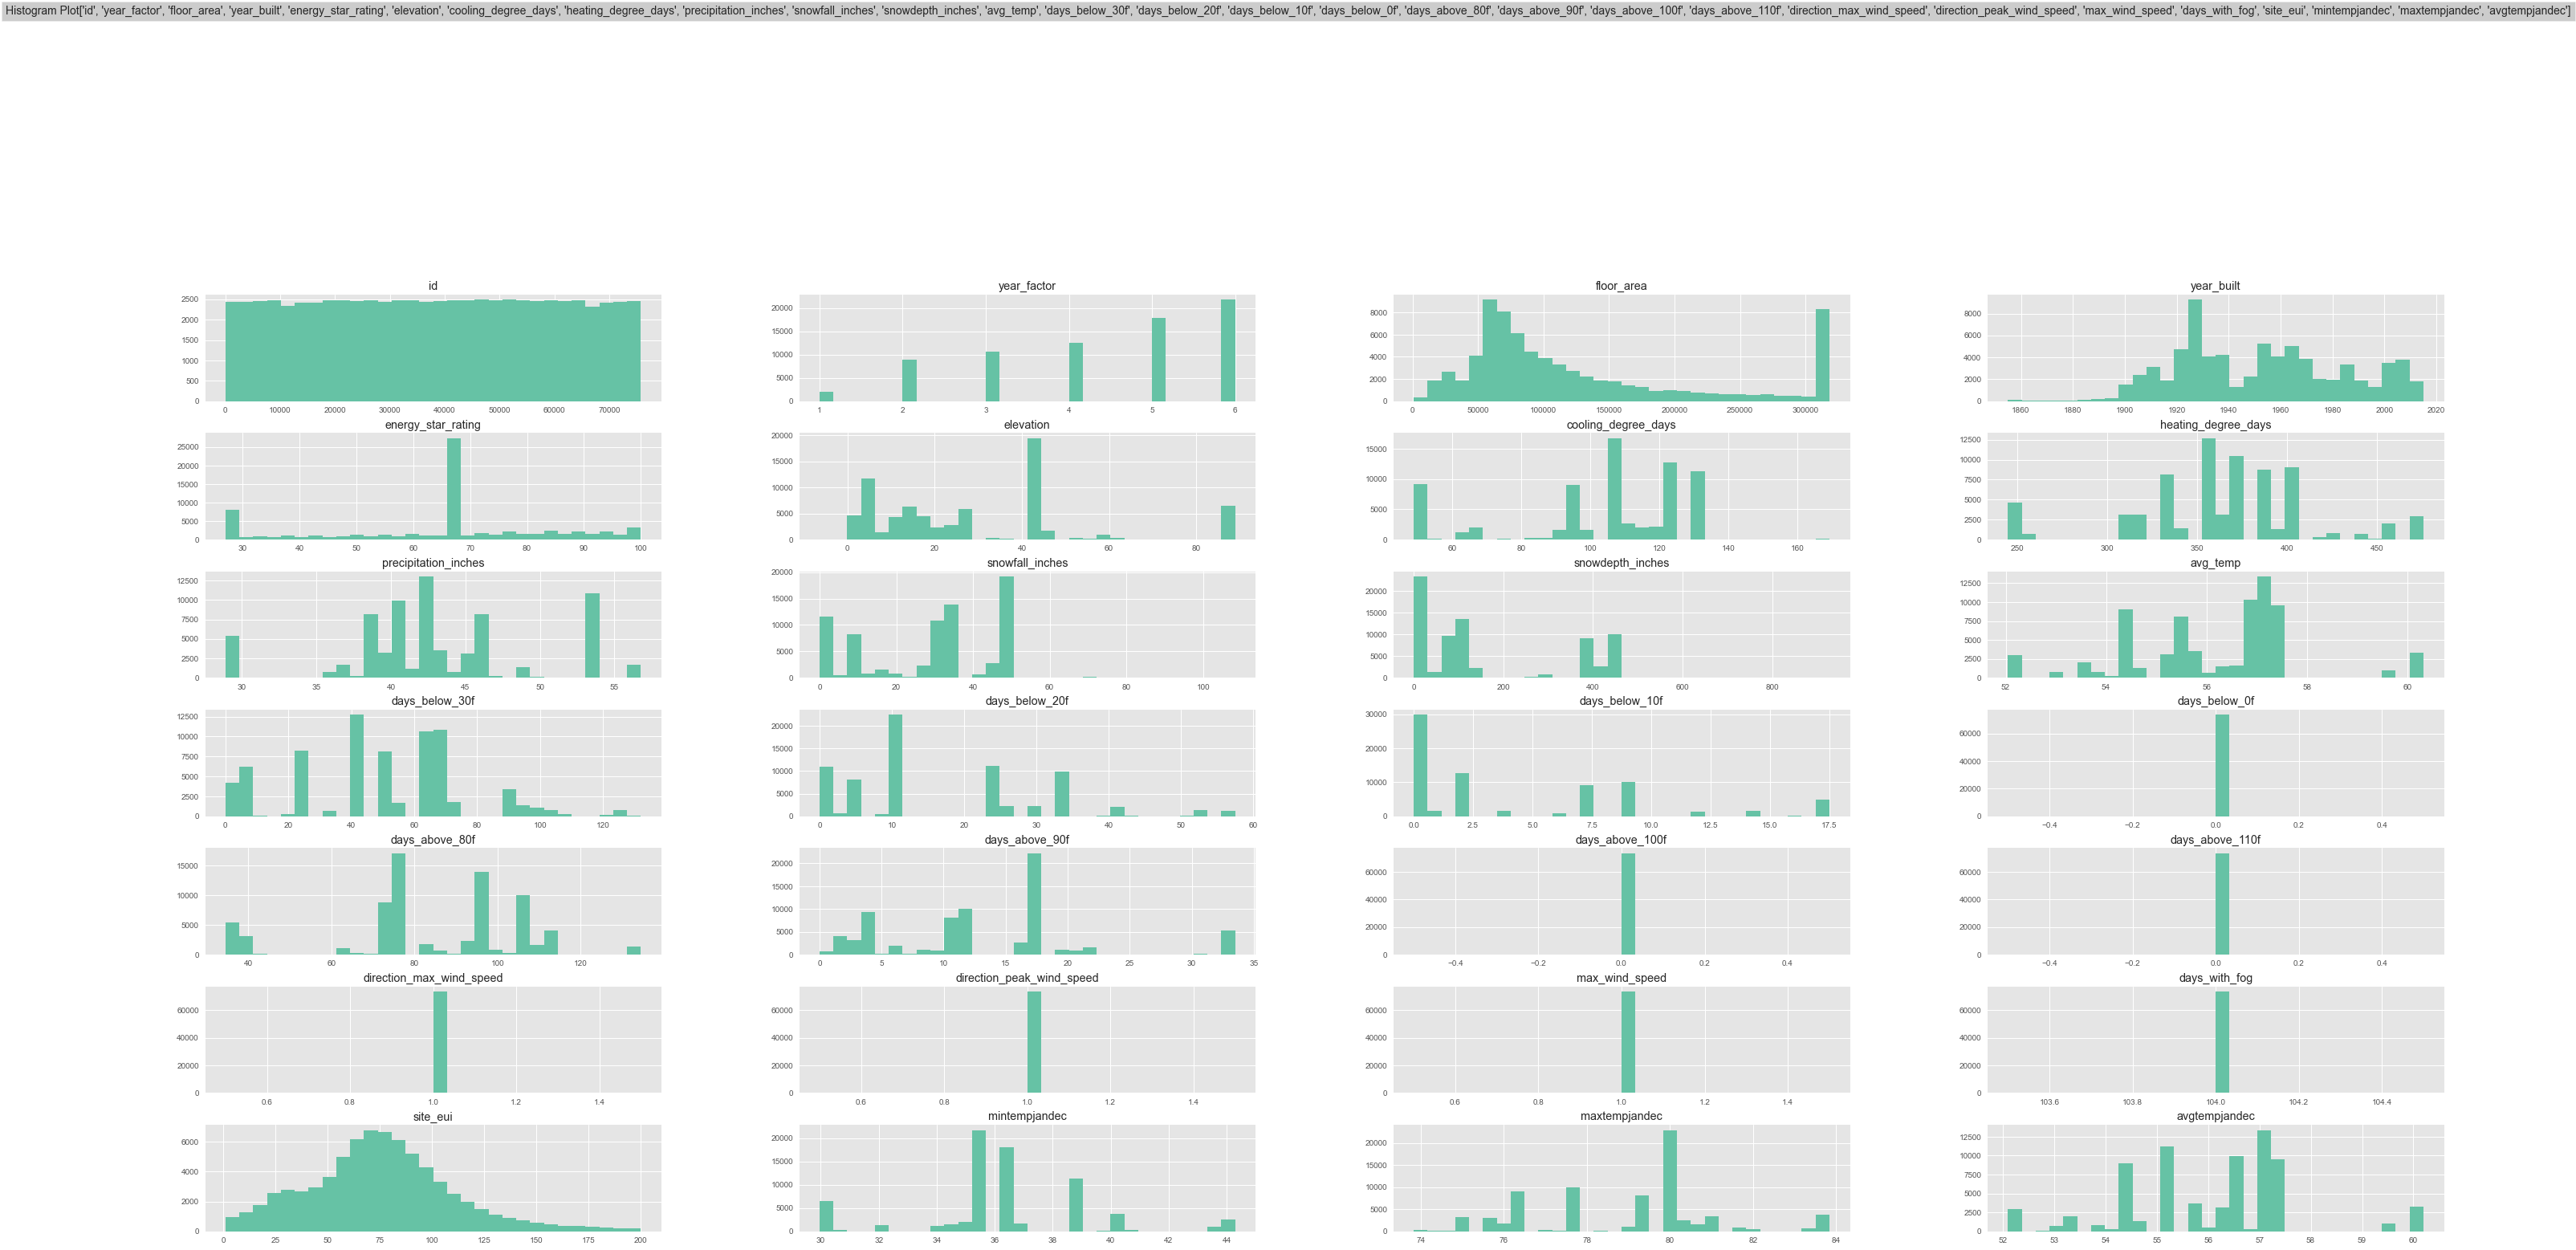

In [156]:
plt.figure(figsize=(50, 50))
df.hist(figsize=(50, 50), grid=True, layout=(16,4), bins = 30)
plt.suptitle("Histogram Plot" + str(fnumcol), bbox={'facecolor':'0.8','pad':5},fontsize = 14)

In [157]:
# Get list of test categorical variables,date  and numerical variables for the data set
fcatcoltest = [col for col in dftest.columns if dftest[col].dtype == "object"]
print("Categorical cols of test dataset = ", fcatcoltest, ". No of categorical features = ", len(fcatcoltest))
print()
fdatecoltest =[col for col in dftest.columns if dftest[col].dtype == "datetime64[ns]"]
print("DateTime cols of test dataset = ", fdatecoltest, ". No of datetime features = ", len(fdatecoltest))
print()
fnumcoltest = [col for col in dftest.columns if (dftest[col].dtype != "object") & (dftest[col].dtype != "datetime64[ns]")]
print("Numerical cols of test dataset = ", fnumcoltest, ". No of numerical features = ", len(fnumcoltest))

Categorical cols of test dataset =  ['state_factor', 'building_class', 'facility_type'] . No of categorical features =  3

DateTime cols of test dataset =  [] . No of datetime features =  0

Numerical cols of test dataset =  ['id', 'year_factor', 'floor_area', 'year_built', 'energy_star_rating', 'elevation', 'cooling_degree_days', 'heating_degree_days', 'precipitation_inches', 'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30f', 'days_below_20f', 'days_below_10f', 'days_below_0f', 'days_above_80f', 'days_above_90f', 'days_above_100f', 'days_above_110f', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog', 'mintempjandec', 'maxtempjandec', 'avgtempjandec'] . No of numerical features =  27


In [158]:
import sys
print(sys.executable)

G:\anaconda3\python.exe


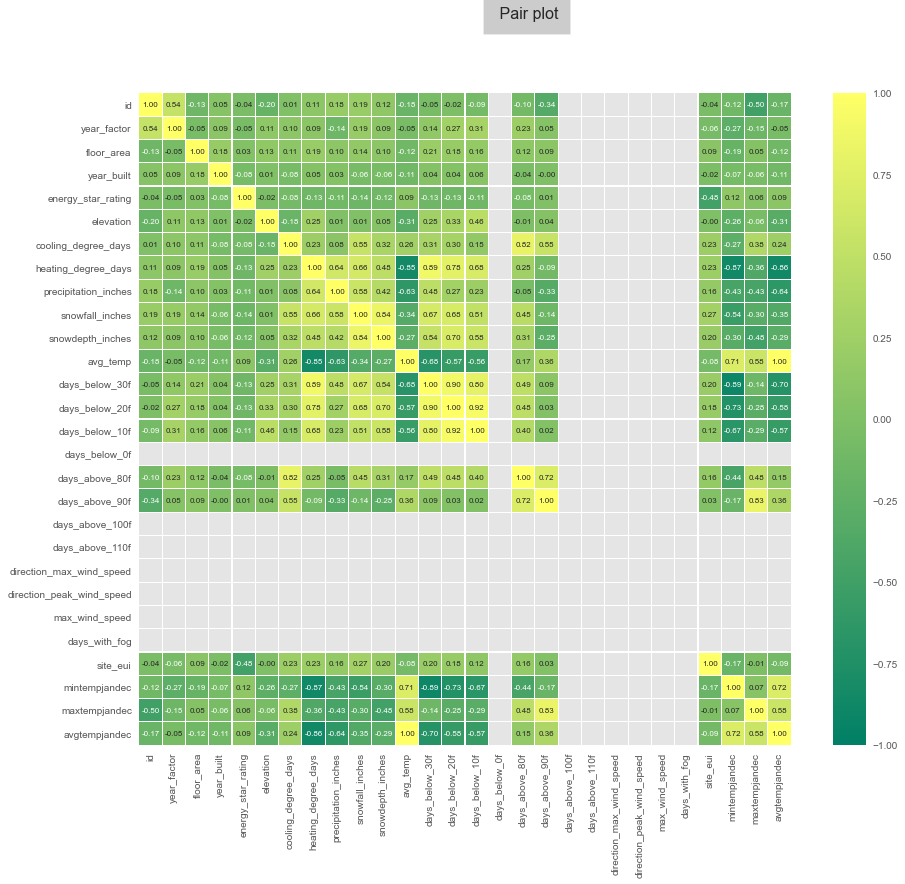

In [161]:
plt.figure(figsize=(15,12))
plt.suptitle(' Pair plot', bbox={'facecolor':'0.8', 'pad':12}, fontsize = 16)
sns.heatmap(df.corr(), annot=True, cmap='summer',vmax=1.0, vmin=-1.0, center=0, linewidth=0.1, annot_kws={'size': 8}, square=True, fmt='.2f',);

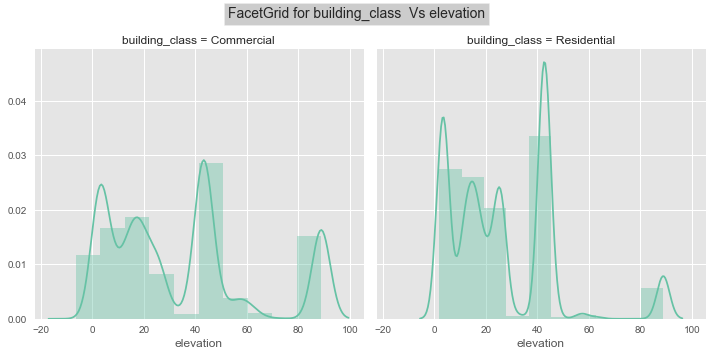

In [164]:
g = sns.FacetGrid(df, col='building_class', margin_titles=True, size=5)
plt.suptitle("Distplot for building_class  Vs elevation", bbox={'facecolor':'0.8'},fontsize = 14)
g.map(sns.distplot, 'elevation', kde=True, bins= 10);

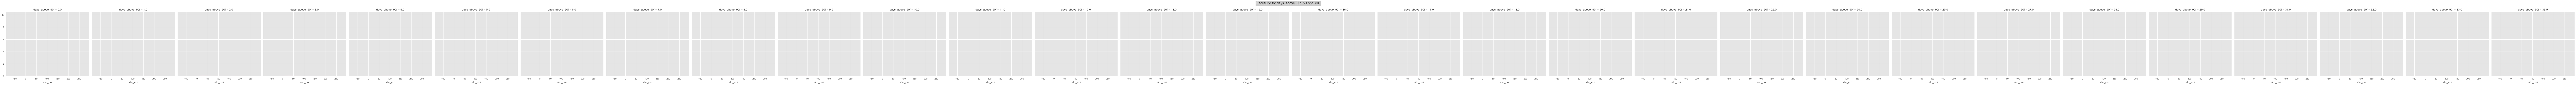

In [166]:
g = sns.FacetGrid(df, col='days_above_90f', margin_titles=True, size=5)
plt.suptitle("Distplot for days_above_90f  Vs site_eui", bbox={'facecolor':'0.8'},fontsize = 14)
g.map(sns.distplot, 'site_eui', kde=True, bins= 10);

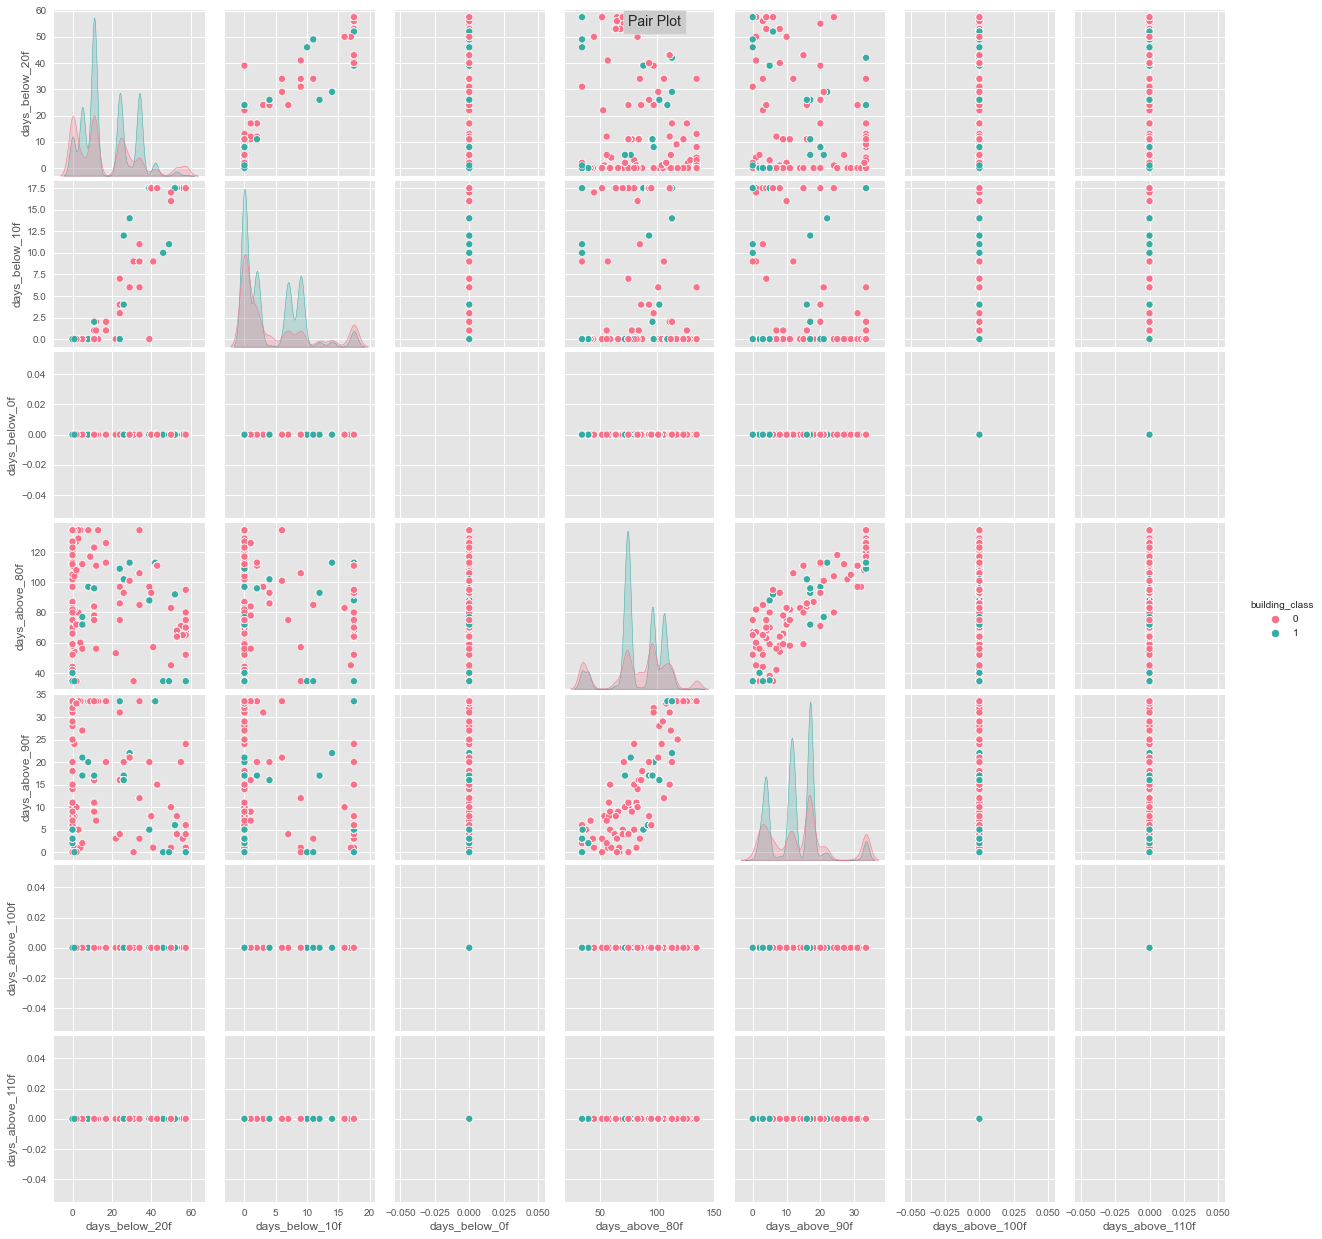

In [242]:
subset = df[['days_below_20f', 'days_below_10f', 'days_below_0f', 'days_above_80f', 'days_above_90f', 'days_above_100f', 'days_above_110f','building_class']]
sns.pairplot(data=subset, size=2.5, diag_kind='kde',palette = "husl", hue="building_class")
plt.suptitle("Pair Plot", bbox={'facecolor':'0.8','pad':5},fontsize = 14)
plt.show()

In [167]:
df.shape

(73498, 31)

In [168]:
dftest.shape

(9705, 30)

<a name = Section7></a>

---
# **7. Data Post-Processing**

<a name = Section71></a>
### **7.1 Data Encoding**

- In this section, we will encode our categorical features as necessary and manipulate any column as necessary

In [169]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for a in fcatcol:   
    print(a)
    df[a]= le.fit_transform(df[a])

state_factor
building_class
facility_type


In [170]:
df.head()

id  year_factor  state_factor  building_class  facility_type  floor_area  \
1   1            1             0               0             55    274000.0   
2   2            1             0               0             48    280025.0   
3   3            1             0               0              6     55325.0   
4   4            1             0               0             56     66000.0   
5   5            1             0               0             58    119900.0   

   year_built  energy_star_rating  elevation  cooling_degree_days  \
1      1955.0                45.0        1.8               48.875   
2      1951.0                97.0        1.8               48.875   
3      1980.0                46.0        1.8               48.875   
4      1985.0               100.0        2.4               48.875   
5      1956.0                68.0        2.4               48.875   

   heating_degree_days  precipitation_inches  snowfall_inches  \
1           246.666667                28.895              0.0   
2           246.666667                28.895              0.0   
3           246.666667                28.895              0.0   
4           246.666667                28.895              0.0   
5           246.666667                28.895              0.0   

   snowdepth_inches  avg_temp  days_below_30f  days_below_20f  days_below_10f  \
1               0.0     56.97               0             0.0             0.0   
2               0.0     56.97               0             0.0             0.0   
3               0.0     56.97               0             0.0             0.0   
4               0.0     56.97               0             0.0             0.0   
5               0.0     56.97               0             0.0             0.0   

   days_below_0f  days_above_80f  days_above_90f  days_above_100f  \
1              0            34.5             0.0                0   
2              0            34.5             0.0                0   
3              0            34.5             0.0                0   
4              0            34.5             0.0                0   
5              0            34.5             0.0                0   

   days_above_110f  direction_max_wind_speed  direction_peak_wind_speed  \
1                0                       1.0                        1.0   
2                0                       1.0                        1.0   
3                0                       1.0                        1.0   
4                0                       1.0                        1.0   
5                0                       1.0                        1.0   

   max_wind_speed  days_with_fog  site_eui  mintempjandec  maxtempjandec  \
1             1.0          104.0     26.50      44.166667      79.833333   
2             1.0          104.0     24.69      44.166667      79.833333   
3             1.0          104.0     48.41      44.166667      79.833333   
4             1.0          104.0      3.90      44.166667      79.833333   
5             1.0          104.0      6.60      44.166667      79.833333   

   avgtempjandec  
1      56.938333  
2      56.938333  
3      56.938333  
4      56.938333  
5      56.938333

In [171]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for b in fcatcoltest:   
    print(b)
    dftest[b]= le.fit_transform(dftest[b])

state_factor
building_class
facility_type


In [172]:
df.columns

Index(['id', 'year_factor', 'state_factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'elevation',
       'cooling_degree_days', 'heating_degree_days', 'precipitation_inches',
       'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30f',
       'days_below_20f', 'days_below_10f', 'days_below_0f', 'days_above_80f',
       'days_above_90f', 'days_above_100f', 'days_above_110f',
       'direction_max_wind_speed', 'direction_peak_wind_speed',
       'max_wind_speed', 'days_with_fog', 'site_eui', 'mintempjandec',
       'maxtempjandec', 'avgtempjandec'],
      dtype='object')

In [173]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vartrain = df[['year_factor', 'state_factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'elevation',
       'cooling_degree_days', 'heating_degree_days', 'precipitation_inches',
       'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30f',
       'days_below_20f', 'days_below_10f', 'days_below_0f', 'days_above_80f',
       'days_above_90f', 'days_above_100f', 'days_above_110f','mintempjandec',
       'maxtempjandec', 'avgtempjandec']]
vif = pd.DataFrame()
vif['features'] = vartrain.columns
vif['VIF'] = [variance_inflation_factor(
    vartrain.values, i) for i in range(vartrain.shape[1])]
vif

features           VIF
0            year_factor  2.855222e+01
1           state_factor  8.089616e+01
2         building_class  3.134479e+00
3          facility_type  6.850675e+00
4             floor_area  3.405407e+00
5             year_built  3.764268e+03
6     energy_star_rating  1.236740e+01
7              elevation  4.388206e+00
8    cooling_degree_days  2.039523e+02
9    heating_degree_days  1.171099e+03
10  precipitation_inches  3.978270e+02
11       snowfall_inches  6.023571e+01
12      snowdepth_inches  2.864035e+01
13              avg_temp  1.414308e+06
14        days_below_30f  2.537307e+02
15        days_below_20f  2.116303e+02
16        days_below_10f  3.073869e+01
17         days_below_0f           NaN
18        days_above_80f  1.995271e+02
19        days_above_90f  4.344248e+01
20       days_above_100f           NaN
21       days_above_110f           NaN
22         mintempjandec  2.897772e+03
23         maxtempjandec  2.362906e+04
24         avgtempjandec  1.329858e+06

In [174]:
X = df.drop(columns = ['id','site_eui'], axis = 1)
X.head()

year_factor  state_factor  building_class  facility_type  floor_area  \
1            1             0               0             55    274000.0   
2            1             0               0             48    280025.0   
3            1             0               0              6     55325.0   
4            1             0               0             56     66000.0   
5            1             0               0             58    119900.0   

   year_built  energy_star_rating  elevation  cooling_degree_days  \
1      1955.0                45.0        1.8               48.875   
2      1951.0                97.0        1.8               48.875   
3      1980.0                46.0        1.8               48.875   
4      1985.0               100.0        2.4               48.875   
5      1956.0                68.0        2.4               48.875   

   heating_degree_days  precipitation_inches  snowfall_inches  \
1           246.666667                28.895              0.0   
2           246.666667                28.895              0.0   
3           246.666667                28.895              0.0   
4           246.666667                28.895              0.0   
5           246.666667                28.895              0.0   

   snowdepth_inches  avg_temp  days_below_30f  days_below_20f  days_below_10f  \
1               0.0     56.97               0             0.0             0.0   
2               0.0     56.97               0             0.0             0.0   
3               0.0     56.97               0             0.0             0.0   
4               0.0     56.97               0             0.0             0.0   
5               0.0     56.97               0             0.0             0.0   

   days_below_0f  days_above_80f  days_above_90f  days_above_100f  \
1              0            34.5             0.0                0   
2              0            34.5             0.0                0   
3              0            34.5             0.0                0   
4              0            34.5             0.0                0   
5              0            34.5             0.0                0   

   days_above_110f  direction_max_wind_speed  direction_peak_wind_speed  \
1                0                       1.0                        1.0   
2                0                       1.0                        1.0   
3                0                       1.0                        1.0   
4                0                       1.0                        1.0   
5                0                       1.0                        1.0   

   max_wind_speed  days_with_fog  mintempjandec  maxtempjandec  avgtempjandec  
1             1.0          104.0      44.166667      79.833333      56.938333  
2             1.0          104.0      44.166667      79.833333      56.938333  
3             1.0          104.0      44.166667      79.833333      56.938333  
4             1.0          104.0      44.166667      79.833333      56.938333  
5             1.0          104.0      44.166667      79.833333      56.938333

In [175]:
y = df['site_eui']
print(y.isna().sum())
y.head()

0


1    26.50
2    24.69
3    48.41
4     3.90
5     6.60
Name: site_eui, dtype: float64

In [176]:
print(X.shape,y.shape)

(73498, 29) (73498,)


In [177]:
Xnewtest = dftest.drop(columns = ['id'], axis = 1)
Xnewtest.head()

year_factor  state_factor  building_class  facility_type  floor_area  \
0            7             0               0             13     28484.0   
1            7             0               0             13     21906.0   
2            7             0               0             13     16138.0   
3            7             0               0             13     97422.0   
4            7             0               0             13     61242.0   

   year_built  energy_star_rating  elevation  cooling_degree_days  \
0      1994.0                37.0        2.4                 28.5   
1      1961.0                55.0       45.7                 28.5   
2      1950.0                11.5       59.1                 28.5   
3      1971.0                34.0       35.4                 28.5   
4      1942.0                35.0        1.8                 28.5   

   heating_degree_days  precipitation_inches  snowfall_inches  \
0                176.0                35.405              0.0   
1                176.0                35.405              0.0   
2                176.0                35.405              0.0   
3                176.0                35.405              0.0   
4                176.0                35.405              0.0   

   snowdepth_inches  avg_temp  days_below_30f  days_below_20f  days_below_10f  \
0               0.0     59.89               0               0               0   
1               0.0     59.89               0               0               0   
2               0.0     59.89               0               0               0   
3               0.0     59.89               0               0               0   
4               0.0     59.89               0               0               0   

   days_below_0f  days_above_80f  days_above_90f  days_above_100f  \
0              0              29             5.0                0   
1              0              29             5.0                0   
2              0              29             5.0                0   
3              0              29             5.0                0   
4              0              29             5.0                0   

   days_above_110f  direction_max_wind_speed  direction_peak_wind_speed  \
0                0                     330.0                      320.0   
1                0                     330.0                      320.0   
2                0                     330.0                      320.0   
3                0                     330.0                      320.0   
4                0                     330.0                      320.0   

   max_wind_speed  days_with_fog  mintempjandec  maxtempjandec  avgtempjandec  
0            18.3          129.0      46.166667           81.0        59.8775  
1            18.3          129.0      46.166667           81.0        59.8775  
2            18.3          129.0      46.166667           81.0        59.8775  
3            18.3          129.0      46.166667           81.0        59.8775  
4            18.3          129.0      46.166667           81.0        59.8775

In [178]:
Xnewtest.shape

(9705, 29)

In [179]:
print(ynewtest.isna().sum())
print(ynewtest.shape)
ynewtest.head()

id          0
site_eui    0
dtype: int64
(9705, 2)


id    site_eui
0  75757  166.588554
1  75758  259.381565
2  75759  158.537090
3  75760  261.441520
4  75761  242.967711

In [180]:
ynewtest = ynewtest['site_eui']

In [181]:
print(Xnewtest.shape,ynewtest.shape)

(9705, 29) (9705,)


In [182]:
len(X.columns)

29

In [183]:
Xnewtest.columns

Index(['year_factor', 'state_factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'elevation',
       'cooling_degree_days', 'heating_degree_days', 'precipitation_inches',
       'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30f',
       'days_below_20f', 'days_below_10f', 'days_below_0f', 'days_above_80f',
       'days_above_90f', 'days_above_100f', 'days_above_110f',
       'direction_max_wind_speed', 'direction_peak_wind_speed',
       'max_wind_speed', 'days_with_fog', 'mintempjandec', 'maxtempjandec',
       'avgtempjandec'],
      dtype='object')

In [184]:
finalnumcols = ['facility_type','floor_area', 'year_built', 'energy_star_rating', 'elevation',
               'cooling_degree_days', 'heating_degree_days', 'precipitation_inches',
               'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30f',
               'days_below_20f', 'days_below_10f', 'days_below_0f', 'days_above_80f',
               'days_above_90f', 'days_above_100f', 'days_above_110f',
               'direction_max_wind_speed', 'direction_peak_wind_speed',
               'max_wind_speed', 'days_with_fog', 'mintempjandec', 'maxtempjandec',
               'avgtempjandec']

<a name = Section72></a>
### **7.2 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development using holdout validation technique.

In [185]:
# Splitting data into training and testing sets with Test Data as 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (55123, 29)
y_train shape:  (55123,)
X_test shape:  (18375, 29)
y_test shape:  (18375,)


In [186]:
X_train.head()

year_factor  state_factor  building_class  facility_type  floor_area  \
26901            3             5               0             20     66687.0   
303              1             0               0             32    215396.0   
60112            6             5               0             32    318145.0   
68313            6             6               0              6     68235.0   
71190            5             2               1              1     41502.0   

       year_built  energy_star_rating  elevation  cooling_degree_days  \
26901      1952.0                41.0       25.6           106.000000   
303        1981.0                89.0       45.7            48.875000   
60112      1967.0                61.0       42.7           124.083333   
68313      1963.0                66.0        3.0            97.333333   
71190      2013.0                82.0       18.3            48.875000   

       heating_degree_days  precipitation_inches  snowfall_inches  \
26901           389.166667                46.320             29.6   
303             246.666667                28.895              0.0   
60112           354.333333                42.170             36.0   
68313           417.750000                41.910             34.6   
71190           311.833333                39.350              0.0   

       snowdepth_inches  avg_temp  days_below_30f  days_below_20f  \
26901              64.0     55.45              50            11.0   
303                 0.0     56.97               0             0.0   
60112             101.0     57.22              40            11.0   
68313             127.0     54.23              73            26.0   
71190               0.0     55.69               8             0.0   

       days_below_10f  days_below_0f  days_above_80f  days_above_90f  \
26901             0.0              0            75.0            11.0   
303               0.0              0            34.5             0.0   
60112             2.0              0            96.0            17.0   
68313             4.0              0           102.0            16.0   
71190             0.0              0            40.0             2.0   

       days_above_100f  days_above_110f  direction_max_wind_speed  \
26901                0                0                       1.0   
303                  0                0                       1.0   
60112                0                0                       1.0   
68313                0                0                       1.0   
71190                0                0                       1.0   

       direction_peak_wind_speed  max_wind_speed  days_with_fog  \
26901                        1.0             1.0          104.0   
303                          1.0             1.0          104.0   
60112                        1.0             1.0          104.0   
68313                        1.0             1.0          104.0   
71190                        1.0             1.0          104.0   

       mintempjandec  maxtempjandec  avgtempjandec  
26901      36.250000      79.166667      55.321667  
303        44.166667      79.833333      56.938333  
60112      35.333333      80.083333      57.160833  
68313      30.833333      80.000000      54.172500  
71190      38.916667      75.083333      55.636667

In [187]:
y.head()

1    26.50
2    24.69
3    48.41
4     3.90
5     6.60
Name: site_eui, dtype: float64

<a name = Section73></a>
### **7.3 Data Scaling**

- Now, evaluating model with help of scaling the data.

In [188]:
sc = StandardScaler()
X_train[finalnumcols] = sc.fit_transform(X_train[finalnumcols])
X_test[finalnumcols] = sc.transform(X_test[finalnumcols])
Xnewtest[finalnumcols] = sc.transform(Xnewtest[finalnumcols])

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop a Logistic Regression model**

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **Accuracy Score** score as required by this project.

<a name = Section81></a>
### **8.1 Baseline Model Development & Evaluation**

- Here we will develop Random Forest algorithm and linear regression

|Algorithm   | Random Forest Algorithm & Linear Regression |
| ------------ | ------------ |
|  Type |  Supervised Machine Learning |
|   |   |
|  Use | To predict a continuous number  |
|   |   |

In [189]:
regressor = RandomForestRegressor(n_estimators=70, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=70, random_state=0)

In [190]:
y_pred = regressor.predict(X_test)
ynewtest = regressor.predict(Xnewtest)

In [191]:
print(" Random Forest scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 data scores
 --------------------
 RMSE: 23.747366115763818
 MAE: 16.244976624114507
 MSE: 563.9373974361275
 R2: 0.5352837248258704


In [192]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(Xnewtest.shape,ynewtest.shape)

(55123, 29) (55123,)
(18375, 29) (18375,)
(9705, 29) (9705,)


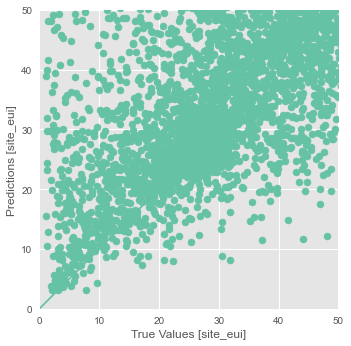

In [225]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True Values [site_eui]')
plt.ylabel('Predictions [site_eui]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [194]:
# Calculate variance score
print('Variance score: %2f' % regressor.score(X_test, y_test))

Variance score: 0.535284


In [217]:
from sklearn.feature_selection import f_regression

In [227]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [228]:
reg.intercept_

-82.39330922331433

In [229]:
reg.coef_

array([-2.75352346e+00,  1.12239650e+00, -2.38459600e+00, -1.93958204e-01,
        2.17737540e-05, -3.67011420e-02, -8.13174298e-01, -3.83385911e-02,
        1.17713416e-01,  2.30922804e-01, -6.06053388e-01,  4.61228751e-01,
       -2.94338686e-03, -3.59288339e+00, -1.61656305e-01, -4.20974048e-01,
        1.09086102e+00,  7.68274333e-14, -8.96649282e-02, -1.82612245e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.34590565e-01,  1.79667741e+00,
        4.86661789e+00])

In [230]:
reg.score(X,y)

0.32193463229733266

In [218]:
f_regression(X,y)

(array([3.01851159e+02, 6.57040043e+03, 5.83386740e+02, 4.63238372e+00,
        5.39594089e+02, 4.09461461e+01, 2.21732425e+04, 6.19348791e-01,
        4.23725259e+03, 3.94036091e+03, 1.99619246e+03, 5.97616781e+03,
        2.96895167e+03, 5.26917604e+02, 3.11501146e+03, 2.45056249e+03,
        1.12762731e+03,            nan, 1.87462515e+03, 5.53832592e+01,
                   nan,            nan,            nan,            nan,
                   nan,            nan, 2.24422043e+03, 6.34001696e+00,
        6.00451934e+02]),
 array([1.77660887e-067, 0.00000000e+000, 2.18396257e-128, 3.13771910e-002,
        6.21378402e-119, 1.57420306e-010, 0.00000000e+000, 4.31291920e-001,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 3.39857974e-116, 0.00000000e+000, 0.00000000e+000,
        2.38253911e-245,             nan, 0.00000000e+000, 1.00254635e-013,
                    nan,             nan,             nan,             nan,
              

In [222]:
p_values = f_regression(X,y)[1]
p_values.round(3)

array([0.   , 0.   , 0.   , 0.031, 0.   , 0.   , 0.   , 0.431, 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,   nan,
       0.   , 0.   ,   nan,   nan,   nan,   nan,   nan,   nan, 0.   ,
       0.012, 0.   ])

In [231]:
psummary = pd.DataFrame(data = X.columns.values, columns=['Features'])
psummary ['Coefficients'] = reg.coef_
psummary ['p-values'] = p_values.round(3)
psummary

Features  Coefficients  p-values
0                 year_factor -2.753523e+00     0.000
1                state_factor  1.122397e+00     0.000
2              building_class -2.384596e+00     0.000
3               facility_type -1.939582e-01     0.031
4                  floor_area  2.177375e-05     0.000
5                  year_built -3.670114e-02     0.000
6          energy_star_rating -8.131743e-01     0.000
7                   elevation -3.833859e-02     0.431
8         cooling_degree_days  1.177134e-01     0.000
9         heating_degree_days  2.309228e-01     0.000
10       precipitation_inches -6.060534e-01     0.000
11            snowfall_inches  4.612288e-01     0.000
12           snowdepth_inches -2.943387e-03     0.000
13                   avg_temp -3.592883e+00     0.000
14             days_below_30f -1.616563e-01     0.000
15             days_below_20f -4.209740e-01     0.000
16             days_below_10f  1.090861e+00     0.000
17              days_below_0f  7.682743e-14       NaN
18             days_above_80f -8.966493e-02     0.000
19             days_above_90f -1.826122e-01     0.000
20            days_above_100f  0.000000e+00       NaN
21            days_above_110f  0.000000e+00       NaN
22   direction_max_wind_speed  0.000000e+00       NaN
23  direction_peak_wind_speed  0.000000e+00       NaN
24             max_wind_speed  0.000000e+00       NaN
25              days_with_fog  0.000000e+00       NaN
26              mintempjandec  5.345906e-01     0.000
27              maxtempjandec  1.796677e+00     0.012
28              avgtempjandec  4.866618e+00     0.000

In [234]:
y_predlr = reg.predict(X_test)
ynewtestlr = reg.predict(Xnewtest)

In [236]:
print(" Linear Regression  scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_predlr)))
print(" MAE:", mean_absolute_error(y_test,y_predlr))
print(" MSE:", mean_squared_error(y_test,y_predlr))
print(" R2:", r2_score(y_test,y_predlr))

 Linear Regression  scores
 --------------------
 RMSE: 170.17574745065377
 MAE: 166.67826988453902
 MSE: 28959.785020388692
 R2: -22.864498942088463


In [195]:
import joblib
joblib.dump(regressor,'../model/randomforestmodel.pkl')

['../model/randomforestmodel.pkl']

In [196]:
random_clf = joblib.load('../model/randomforestmodel.pkl')
random_clf.predict(X_test)

array([36.35042857, 74.08914286, 83.382     , ..., 57.20742857,
       87.47614286, 54.13614286])

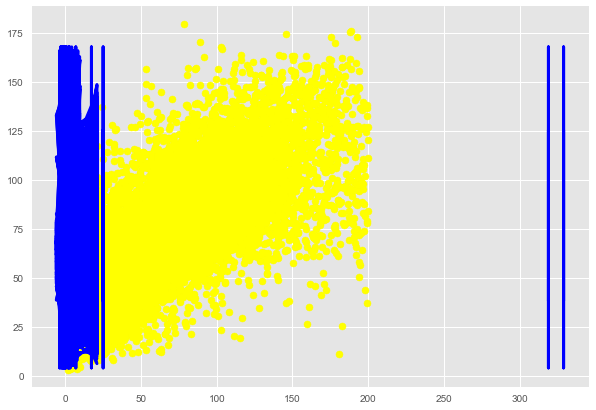

In [197]:
# Plot outputs
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, color='yellow')
plt.plot(Xnewtest,ynewtest, color='blue', linewidth=3)
#plt.title('Linear Regression Model', fontsize=14)
#plt.xlabel('Independent Variable', fontsize=12)
#plt.ylabel('Dependent Variable', fontsize=12)
plt.show()

In [201]:
clfs = [GradientBoostingRegressor(), RandomForestRegressor(random_state=42),CatBoostRegressor(random_seed = 23)]

for clf in clfs:

      # Extracting model name
        model_name = type(clf).__name__

        #Calculate start time
        start_time = time.time()

        #Train the model
        clf.fit(X_train, y_train)

        #Make predictions on the test model
        predictions = clf.predict(X_test)

        # Estimating the model performance
        RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
        R_squared = metrics.r2_score(y_test, predictions)
        MAE = mean_absolute_error(y_test,predictions)
        MSE = mean_squared_error(y_test,predictions)
        # Calculate evaluated time
        elapsed_time = (time.time() - start_time)

        #Display the metrics and time took to develop the model
        print('Performance Metrics of', model_name, ':')
        print('[RMSE]:', RMSE, ',[R-Squared]:', R_squared,',[MAE]:', MAE, ',[MSE]:', MSE, ',[Processing Time]:', elapsed_time, 'seconds')
        print('----------------------------------------------------------------------------\n')

Performance Metrics of GradientBoostingRegressor :
[RMSE]: 25.4503678015314 ,[R-Squared]: 0.466241120643474 ,[MAE]: 17.800947547049777 ,[MSE]: 647.7212212332263 ,[Processing Time]: 14.73620057106018 seconds
----------------------------------------------------------------------------

Performance Metrics of RandomForestRegressor :
[RMSE]: 23.59536095073956 ,[R-Squared]: 0.5412139147529238 ,[MAE]: 16.19019928475727 ,[MSE]: 556.7410583956854 ,[Processing Time]: 80.02794766426086 seconds
----------------------------------------------------------------------------

Learning rate set to 0.077145
0:	learn: 34.0965505	total: 423ms	remaining: 7m 2s
1:	learn: 33.2379413	total: 467ms	remaining: 3m 52s
2:	learn: 32.4847809	total: 564ms	remaining: 3m 7s
3:	learn: 31.8265137	total: 676ms	remaining: 2m 48s
4:	learn: 31.2409485	total: 704ms	remaining: 2m 20s
5:	learn: 30.6930918	total: 1.04s	remaining: 2m 51s
6:	learn: 30.2142894	total: 1.09s	remaining: 2m 35s
7:	learn: 29.8060741	total: 1.11s	remaini

153:	learn: 24.5080836	total: 4.36s	remaining: 23.9s
154:	learn: 24.4971045	total: 4.38s	remaining: 23.9s
155:	learn: 24.4877915	total: 4.39s	remaining: 23.8s
156:	learn: 24.4827457	total: 4.41s	remaining: 23.7s
157:	learn: 24.4773190	total: 4.43s	remaining: 23.6s
158:	learn: 24.4704014	total: 4.44s	remaining: 23.5s
159:	learn: 24.4633355	total: 4.46s	remaining: 23.4s
160:	learn: 24.4529317	total: 4.48s	remaining: 23.3s
161:	learn: 24.4489988	total: 4.49s	remaining: 23.3s
162:	learn: 24.4392749	total: 4.51s	remaining: 23.2s
163:	learn: 24.4325247	total: 4.53s	remaining: 23.1s
164:	learn: 24.4260147	total: 4.54s	remaining: 23s
165:	learn: 24.4189613	total: 4.56s	remaining: 22.9s
166:	learn: 24.4123290	total: 4.58s	remaining: 22.9s
167:	learn: 24.4077111	total: 4.6s	remaining: 22.8s
168:	learn: 24.4010257	total: 4.61s	remaining: 22.7s
169:	learn: 24.3956737	total: 4.66s	remaining: 22.7s
170:	learn: 24.3885748	total: 4.67s	remaining: 22.7s
171:	learn: 24.3793895	total: 4.69s	remaining: 22

309:	learn: 23.7822653	total: 7.2s	remaining: 16s
310:	learn: 23.7799187	total: 7.21s	remaining: 16s
311:	learn: 23.7761908	total: 7.23s	remaining: 16s
312:	learn: 23.7721857	total: 7.25s	remaining: 15.9s
313:	learn: 23.7688423	total: 7.27s	remaining: 15.9s
314:	learn: 23.7649926	total: 7.29s	remaining: 15.8s
315:	learn: 23.7622909	total: 7.3s	remaining: 15.8s
316:	learn: 23.7584934	total: 7.32s	remaining: 15.8s
317:	learn: 23.7561451	total: 7.34s	remaining: 15.7s
318:	learn: 23.7540835	total: 7.38s	remaining: 15.7s
319:	learn: 23.7505632	total: 7.4s	remaining: 15.7s
320:	learn: 23.7483317	total: 7.42s	remaining: 15.7s
321:	learn: 23.7449411	total: 7.43s	remaining: 15.7s
322:	learn: 23.7413825	total: 7.45s	remaining: 15.6s
323:	learn: 23.7391617	total: 7.47s	remaining: 15.6s
324:	learn: 23.7342899	total: 7.48s	remaining: 15.5s
325:	learn: 23.7318803	total: 7.5s	remaining: 15.5s
326:	learn: 23.7283502	total: 7.51s	remaining: 15.5s
327:	learn: 23.7254785	total: 7.53s	remaining: 15.4s
328

472:	learn: 23.3448916	total: 10.8s	remaining: 12s
473:	learn: 23.3419895	total: 10.8s	remaining: 12s
474:	learn: 23.3396427	total: 10.8s	remaining: 12s
475:	learn: 23.3377549	total: 10.9s	remaining: 12s
476:	learn: 23.3350871	total: 10.9s	remaining: 11.9s
477:	learn: 23.3339033	total: 10.9s	remaining: 11.9s
478:	learn: 23.3321562	total: 10.9s	remaining: 11.9s
479:	learn: 23.3292643	total: 11s	remaining: 11.9s
480:	learn: 23.3261149	total: 11s	remaining: 11.9s
481:	learn: 23.3237516	total: 11s	remaining: 11.8s
482:	learn: 23.3211486	total: 11s	remaining: 11.8s
483:	learn: 23.3199221	total: 11.1s	remaining: 11.8s
484:	learn: 23.3192068	total: 11.1s	remaining: 11.8s
485:	learn: 23.3178933	total: 11.1s	remaining: 11.8s
486:	learn: 23.3128337	total: 11.2s	remaining: 11.7s
487:	learn: 23.3114087	total: 11.2s	remaining: 11.7s
488:	learn: 23.3092367	total: 11.2s	remaining: 11.7s
489:	learn: 23.3062908	total: 11.2s	remaining: 11.7s
490:	learn: 23.3046077	total: 11.2s	remaining: 11.6s
491:	lear

634:	learn: 22.9985494	total: 14.4s	remaining: 8.25s
635:	learn: 22.9962221	total: 14.4s	remaining: 8.23s
636:	learn: 22.9932073	total: 14.4s	remaining: 8.21s
637:	learn: 22.9900371	total: 14.4s	remaining: 8.19s
638:	learn: 22.9890020	total: 14.5s	remaining: 8.17s
639:	learn: 22.9854909	total: 14.5s	remaining: 8.15s
640:	learn: 22.9821138	total: 14.5s	remaining: 8.13s
641:	learn: 22.9788034	total: 14.5s	remaining: 8.1s
642:	learn: 22.9770940	total: 14.5s	remaining: 8.07s
643:	learn: 22.9754717	total: 14.6s	remaining: 8.05s
644:	learn: 22.9739979	total: 14.6s	remaining: 8.03s
645:	learn: 22.9713031	total: 14.6s	remaining: 8.01s
646:	learn: 22.9681029	total: 14.6s	remaining: 7.99s
647:	learn: 22.9636110	total: 14.7s	remaining: 7.96s
648:	learn: 22.9625355	total: 14.7s	remaining: 7.94s
649:	learn: 22.9608129	total: 14.7s	remaining: 7.92s
650:	learn: 22.9574087	total: 14.7s	remaining: 7.9s
651:	learn: 22.9555815	total: 14.8s	remaining: 7.88s
652:	learn: 22.9538925	total: 14.8s	remaining: 7

796:	learn: 22.6986431	total: 17.9s	remaining: 4.55s
797:	learn: 22.6962677	total: 17.9s	remaining: 4.53s
798:	learn: 22.6928710	total: 17.9s	remaining: 4.51s
799:	learn: 22.6909240	total: 17.9s	remaining: 4.49s
800:	learn: 22.6888835	total: 18s	remaining: 4.46s
801:	learn: 22.6878583	total: 18s	remaining: 4.45s
802:	learn: 22.6855859	total: 18s	remaining: 4.42s
803:	learn: 22.6836096	total: 18.1s	remaining: 4.4s
804:	learn: 22.6826405	total: 18.1s	remaining: 4.38s
805:	learn: 22.6809909	total: 18.1s	remaining: 4.36s
806:	learn: 22.6784564	total: 18.1s	remaining: 4.34s
807:	learn: 22.6776463	total: 18.2s	remaining: 4.32s
808:	learn: 22.6755179	total: 18.2s	remaining: 4.29s
809:	learn: 22.6739559	total: 18.2s	remaining: 4.27s
810:	learn: 22.6713654	total: 18.2s	remaining: 4.25s
811:	learn: 22.6698687	total: 18.2s	remaining: 4.22s
812:	learn: 22.6674231	total: 18.3s	remaining: 4.2s
813:	learn: 22.6646316	total: 18.3s	remaining: 4.18s
814:	learn: 22.6628925	total: 18.3s	remaining: 4.15s
8

962:	learn: 22.4176666	total: 21.4s	remaining: 821ms
963:	learn: 22.4161079	total: 21.4s	remaining: 799ms
964:	learn: 22.4135232	total: 21.4s	remaining: 777ms
965:	learn: 22.4111384	total: 21.4s	remaining: 755ms
966:	learn: 22.4093933	total: 21.5s	remaining: 732ms
967:	learn: 22.4086887	total: 21.5s	remaining: 710ms
968:	learn: 22.4061536	total: 21.5s	remaining: 688ms
969:	learn: 22.4033926	total: 21.5s	remaining: 665ms
970:	learn: 22.4007275	total: 21.5s	remaining: 643ms
971:	learn: 22.3984040	total: 21.5s	remaining: 621ms
972:	learn: 22.3970996	total: 21.6s	remaining: 598ms
973:	learn: 22.3962080	total: 21.6s	remaining: 576ms
974:	learn: 22.3945215	total: 21.6s	remaining: 554ms
975:	learn: 22.3939354	total: 21.6s	remaining: 532ms
976:	learn: 22.3920990	total: 21.6s	remaining: 510ms
977:	learn: 22.3903445	total: 21.7s	remaining: 488ms
978:	learn: 22.3892219	total: 21.7s	remaining: 466ms
979:	learn: 22.3879182	total: 21.7s	remaining: 443ms
980:	learn: 22.3862049	total: 21.7s	remaining:

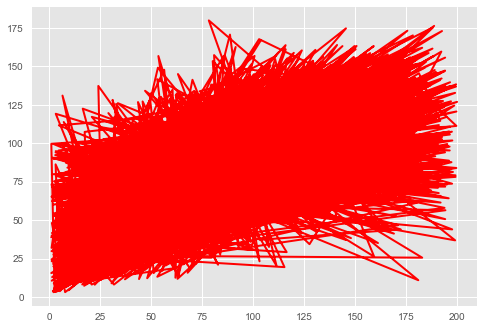

In [202]:
# then, plot 
#plt.scatter(X_test, y_test)
plt.plot(y_test, y_pred, c='red', linewidth=2)

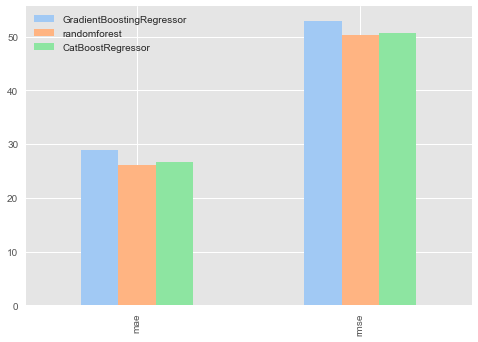

In [232]:
error_rec = {
    "GradientBoostingRegressor": {
        "mae" : 28.854185360223273,
        "rmse": 52.98532705582362,
    },
    "randomforest": {
        "mae" : 26.177109218268825,
        "rmse": 50.23244223527969,
    },
    "CatBoostRegressor": {
        "mae" : 26.68852537865287,
        "rmse": 50.73575784240797 ,
    },
}
pd.DataFrame(error_rec).plot(kind="bar",  color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3]]);

In [203]:
pipe = Pipeline((
    ("dtr", DecisionTreeRegressor(max_depth=10)),
))
pipe.fit(X_train, y_train)
print("Training R2")
print(pipe.score(X_train, y_train))
print("Testing R2")
print(pipe.score(X_test, y_test))
scoresdt = cross_val_score(pipe, X_train, y_train, cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.5128890693966579
Testing R2
0.4457944558768021
[0.4411454  0.46187373 0.44214697 0.43908025 0.45196168 0.45425503
 0.44509337 0.48014737 0.46190468 0.46439123]
Average R2
0.4541999716770747


<a name = Section9></a>

---
# **9. Hyperparameter Tuning**
---

- In this section we will **tune the models**

- Then we will **analyze the results to obtain max accuracy** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **Accuracy Score** score as required by this project.

In [239]:
pipe = Pipeline((
    ("sc", StandardScaler()),
    ("poly", PolynomialFeatures()),
    ("pt", PowerTransformer()),
    ("pca", PCA()),
    ("xb", GradientBoostingRegressor())
))
param_grid = {
    'poly__degree': [2, 3],
    'pca__n_components': [5, 12],
    'xb__n_estimators': [10,30,50]
}
# Calculate start time
start_time = time.time()
search = GridSearchCV(pipe, param_grid, cv=5)
search.fit(X_train, y_train)

# Make predictions using test data
yhyper_pred = clf.predict(X_test)

# Make predictions using test data
yhyper_newpred = clf.predict(Xnewtest)

# Calculate evaluated time
elapsed_time = (time.time() - start_time)

KeyboardInterrupt: 

<a name = Section10></a>

---
# **10. Explainable AI**
---


<a name = Section101></a>
### **10.1 Importing Libraries for  Explainable AI**

In [205]:
shap.initjs()

In [206]:
X_train.shape

(55123, 29)

In [207]:
X_test_sample  = X_test.sample(100)

In [208]:
#x = np.append(x, 25)
X_sample = X_train.sample(100)
X_sample

year_factor  state_factor  building_class  facility_type  floor_area  \
13275            6             4               0       0.510886    0.593572   
46313            5             5               1       0.078801   -0.299685   
35177            4             5               1       0.078801   -0.237663   
12759            6             4               1       0.078801    2.049181   
47822            5             5               0       0.510886   -0.296921   
...            ...           ...             ...            ...         ...   
1136             3             0               0      -1.563122   -1.039855   
15358            1             5               0       0.510886    1.759348   
41185            4             5               1       0.078801   -0.793194   
30008            3             5               0       0.770137    1.011494   
742              2             0               0       0.510886   -0.686077   

       year_built  energy_star_rating  elevation  cooling_degree_days  \
13275   -0.729998            0.731334   2.443584             0.487545   
46313    0.181587            0.128087  -0.159815             1.094874   
35177   -0.761432           -1.933010   0.543473            -0.345545   
12759    0.653096            0.329169   2.443584             0.487545   
47822    0.401624           -0.977868  -0.336665             1.094874   
...           ...                 ...        ...                  ...   
1136    -0.038451            0.128087   2.443584            -2.067371   
15358   -2.364563           -0.877326   0.543473             0.299941   
41185   -0.698564            0.128087   0.543473            -0.345545   
30008   -0.541394            0.128087  -0.587546             0.112336   
742     -1.358677           -0.827056  -1.113983            -1.417115   

       heating_degree_days  precipitation_inches  snowfall_inches  \
13275             1.777178             -0.032713        -0.103024   
46313             0.157677             -0.326202         1.121662   
35177             0.846296              1.633448         1.172223   
12759             1.777178             -0.032713        -0.103024   
47822             0.157677             -0.326202         1.121662   
...                    ...                   ...              ...   
1136             -2.364497             -2.171973        -1.636690   
15358            -0.049739              2.089732         0.874478   
41185             0.846296              1.633448         1.172223   
30008             0.506135              0.491593         0.026186   
742              -2.364497             -2.171973        -1.636690   

       snowdepth_inches  avg_temp  days_below_30f  days_below_20f  \
13275         -0.060949 -1.527286        1.585209        1.751263   
46313          1.700585  0.384419        0.527184        1.184316   
35177          1.210320 -0.979419        0.636635        0.475633   
12759         -0.060949 -1.527286        1.585209        1.751263   
47822          1.700585  0.384419        0.527184        1.184316   
...                 ...       ...             ...             ...   
1136          -0.938865  2.232012       -1.698319       -1.225207   
15358          1.444051  0.197911        0.198831       -0.445656   
41185          1.210320 -0.979419        0.636635        0.475633   
30008         -0.574017 -0.425724        0.052896       -0.445656   
742           -0.938865  2.371893       -1.661835       -1.225207   

       days_below_10f  days_below_0f  days_above_80f  days_above_90f  \
13275        2.519622            0.0        1.298802        2.507441   
46313        0.896975            0.0        0.991246       -0.160754   
35177        0.515176            0.0       -0.370788       -1.153571   
12759        2.519622            0.0        1.298802        2.507441   
47822        0.896975            0.0        0.991246       -0.160754   
...               ...            ...             ...             ...   
1136        -0.8211

In [209]:
X_sample.shape

(100, 29)

In [210]:
#shap_values = shap.TreeExplainer(regressor).shap_values(X_sample)
# Create object that can calculate shap values
explainer = shap.TreeExplainer(regressor)
# Calculate Shap values
shap_values = explainer.shap_values(X_sample)

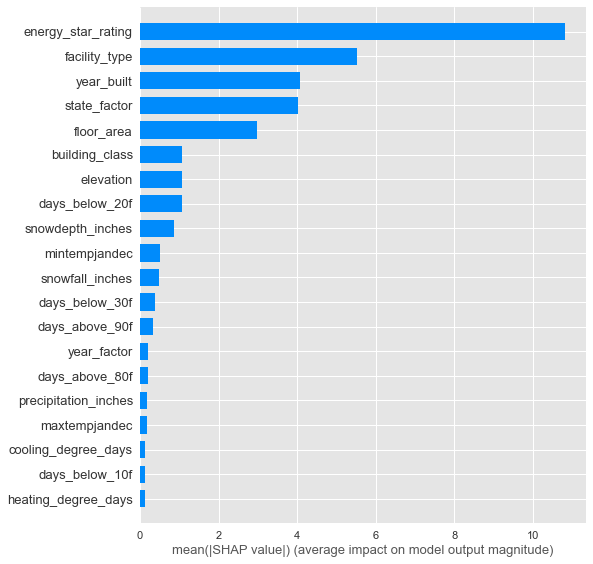

In [211]:
shap.summary_plot(shap_values, X_test_sample, feature_names=X_test_sample.columns, plot_type="bar")

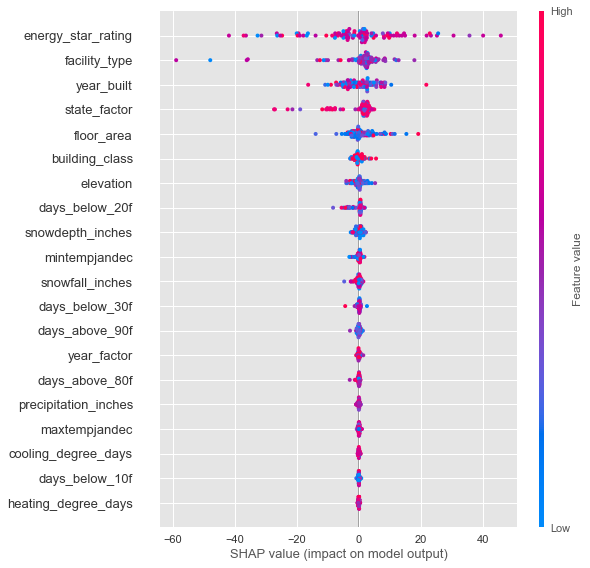

In [212]:
shap.summary_plot(shap_values, X_test_sample)

In [213]:
y_hat = regressor.predict(X_test_sample._get_numeric_data())
print(y_hat[50])

104.90996326530615


In [214]:
shap.initjs()
shap.force_plot(shap.TreeExplainer(regressor).expected_value, shap_values[50], X_test_sample.iloc[50])

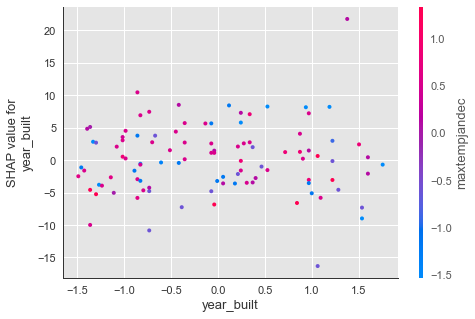

In [215]:
shap.dependence_plot(5, shap_values, X_test_sample, feature_names=X_test_sample.columns)